In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore') #test comment

In [4]:
# Read excel file
demographic_df = pd.read_excel('2023-WardProfiles-2011-2021-CensusData_notmodified.xlsx', header = None)
# Set Column Names
demographic_df.columns = ['Grouping',
                         'Toronto',
                         'Ward 1',
                         'Ward 2',
                         'Ward 3',
                         'Ward 4',
                         'Ward 5',
                         'Ward 6',
                         'Ward 7',
                         'Ward 8',
                         'Ward 9',
                         'Ward 10',
                         'Ward 11',
                         'Ward 12',
                         'Ward 13',
                         'Ward 14',
                         'Ward 15',
                         'Ward 16',
                         'Ward 17',
                         'Ward 18',
                         'Ward 19',
                         'Ward 20',
                         'Ward 21',
                         'Ward 22',
                         'Ward 23',
                         'Ward 24',
                         'Ward 25']


# View DataFrame
demographic_df.head(50)

Grouping  Toronto  Ward 1  \
0                            City of Toronto Profiles      NaN     NaN   
1                        City of Toronto: City Wards       NaN     NaN   
2                                         2021 Census      NaN     NaN   
3                                                 NaN      NaN     NaN   
4                                            Source:       NaN     NaN   
5   Statistics Canada, 2021 Census, Custom Tabulat...      NaN     NaN   
6                                                 NaN      NaN     NaN   
7                                              Wards:      NaN     NaN   
8                                      25 Ward model       NaN     NaN   
9                                                 NaN      NaN     NaN   
10                                      Prepared by:       NaN     NaN   
11           Strategic Initiatives, Policy & Analysis      NaN     NaN   
12            City Planning Division, City of Toronto      NaN     NaN   
13                                     December, 2023      NaN     NaN   
14                                                NaN      NaN     NaN   
15                                                NaN      NaN     NaN   
16                                         Population      NaN     NaN   
17                                                NaN  Toronto  Ward 1   
18                                        Total - Age  2761285  115120   
19                                       0 to 4 years   123385    5755   
20                                       5 to 9 years   128805    6160   
21                                     10 to 14 years   131150    6585   
22                                     15 to 19 years   133820    7085   
23                                     20 to 24 years   184570    9645   
24                                     25 to 29 years   242615   10095   
25                                     30 to 34 years   245705    8125   
26                                     35 to 39 years   212845    7265   
27                                     40 to 44 years   184665    6905   
28                                     45 to 49 years   174740    7035   
29                                     50 to 54 years   182850    7515   
30                                     55 to 59 years   189830    7925   
31                                     60 to 64 years   169370    7070   
32                                     65 to 69 years   139105    5495   
33                                     70 to 74 years   118280    4745   
34                                     75 to 79 years    79765    3140   
35                                     80 to 84 years    59920    2390   
36                                     85 to 89 years    37815    1435   
37                                  90 years and over    22060     745   
38                                                NaN      NaN     NaN   
39                                         Median age     39.6      38   
40                                                NaN      NaN     NaN   
41                                          Dwellings      NaN     NaN   
42                                                NaN  Toronto  Ward 1   
43  Total - Occupied private dwellings by structur...  1160895   38135   
44                              Single-detached house   270350   11270   
45                                Semi-detached house    73160    1425   
46                                          Row house    63170    3645   
47                      Apartment or flat in a duplex    46470    3790   
48    Apartment in a building that has fewer than ...   162260    2015   
49    Apartment in a building that has five or mor...   542625   15980   

    Ward 2  Ward 3  Ward 4  Ward 5  Ward 6  Ward 7  Ward 8  ...  Ward 16  \
0      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...      NaN   
1      NaN     NaN     NaN     NaN     NaN     NaN     NaN  ...      NaN   
2      NaN     NaN     NaN     NaN     NaN

## Clean Demographic Data

Talk about the challenges with the format of the excel sheet as accessible from the website ...

In [5]:
# Determine indices of shaded rows as these are the category headers of the census data (eg. population, dwellings etc.)

########################################################################################################################################################
# Load excel file
demographic_workbook = load_workbook('2023-WardProfiles-2011-2021-CensusData_notmodified.xlsx')
sheet = demographic_workbook['2021 One Variable']

# Identify the rows with shading (assuming "shading" means a background color)
shaded_rows = []

# Loop through the rows and find the ones with a shaded fill
for row_idx, row in enumerate(sheet.iter_rows(), start=1):
    for cell in row:
        if cell.fill != PatternFill(start_color="00000000", end_color="00000000", fill_type=None):  # Check if cell is shaded
            shaded_rows.append(row_idx)
            break  # Stop once we find a shaded row in this row, no need to check further cells

##########################################################################################################################################################
# View list
print(shaded_rows)

[17, 42, 74, 92, 136, 995, 1014, 1030, 1301, 1358]


In [6]:
# Initialize list to store the data frames of each demographic category (eg. population, dwellings etc.)
category_dfs = []

# Loop through the list of indices of category headers
for i in range(len(shaded_rows)):
    # Initialize list to store the data frames of each subcategory 
    subcategory_dfs = []
    # From first category to second-last category (prevents indexing out of range)
    if shaded_rows[i] < shaded_rows[-1]:
        category_name = demographic_df.iloc[shaded_rows[i]-1,0] # Get the name of the category
        #Slice the rows between the current category header and the next category header
        category_df = demographic_df.iloc[shaded_rows[i] : shaded_rows[i+1] - 1].dropna(how='all') 
        category_df['Category'] = category_name # Creates a new column that contains the category of the row
        category_df = category_df.reset_index(drop=True) 
        
        # Subcategories are distinguished by containing 'Total' in grouping description, check which rows are subcategory headers
        subcategory_rows = category_df['Grouping'].notnull() & category_df['Grouping'].str.contains('Total')
        # Get the indices of subcategory rows
        subcategory_indices = category_df[subcategory_rows].index.tolist()
        # Loop through the list of indices of subcategory headers
        for j in range(len(subcategory_indices)):
            # From first category to second-last category (prevents indexing out of range)
            if subcategory_indices[j] < subcategory_indices[-1]:
                subcategory_name = category_df.iloc[subcategory_indices[j],0] # Get the name of the subcategory
                #Slice the rows between the current subcategory header and the next subcategory header
                subcategory_df = category_df.iloc[subcategory_indices[j] : subcategory_indices[j+1] - 1]
                subcategory_df['Subcategory'] = subcategory_name # Creates a new column that contains the subcategory of the row
                subcategory_dfs.append(subcategory_df) # Append the data frame for this subcategory to the list containing the other subcategory data frames
            # The last subcategory is handled differently
            else:
                subcategory_name = category_df.iloc[subcategory_indices[j],0] # Get the name of the subcategory
                # Slice the rows from the current subcategory header to the end of the category's data frame
                subcategory_df = category_df.iloc[subcategory_indices[j]:]
                subcategory_df['Subcategory'] = subcategory_name # Creates a new column that contains the subcategory of the row
                subcategory_dfs.append(subcategory_df)  # Append the data frame for this subcategory to the list containing the other subcategory data frames

        category_df = pd.concat(subcategory_dfs)
        category_dfs.append(category_df)
    else:
        category_name = demographic_df.iloc[shaded_rows[i]-1,0]
        category_df = demographic_df.iloc[shaded_rows[i]:].dropna(how='all')
        category_df['Category'] = category_name
        category_dfs.append(category_df)
        category_df = category_df.reset_index(drop=True)

        # Subcategory indices
        subcategory_rows = category_df['Grouping'].notnull() & category_df['Grouping'].str.contains('Total')
        subcategory_indices = category_df[subcategory_rows].index.tolist()
        
        for j in range(len(subcategory_indices)):
            if subcategory_indices[j] < subcategory_indices[-1]:
                subcategory_name = category_df.iloc[subcategory_indices[j],0]
                subcategory_df = category_df.iloc[subcategory_indices[j] : subcategory_indices[j+1] - 1]
                subcategory_df['Subcategory'] = subcategory_name
                subcategory_dfs.append(subcategory_df)
            else:
                subcategory_name = category_df.iloc[subcategory_indices[j],0]
                subcategory_df = category_df.iloc[subcategory_indices[j]:]
                subcategory_df['Subcategory'] = subcategory_name
                subcategory_dfs.append(subcategory_df) 

        category_df = pd.concat(subcategory_dfs)
        category_dfs.append(category_df)


combined_df = pd.concat(category_dfs)
combined_df.set_index(['Category', 'Subcategory', 'Grouping'], inplace=True)

combined_df

Toronto  \
Category                 Subcategory    Grouping                                                      
Population               Total - Age    Total - Age                                         2761285   
                                          0 to 4 years                                       123385   
                                          5 to 9 years                                       128805   
                                          10 to 14 years                                     131150   
                                          15 to 19 years                                     133820   
...                                                                                             ...   
Income and Shelter Costs Total income %     Canada Pension Plan (CPP) and QuÚbec Pensio...      3.5   
                                            Old Age Security pension (OAS) and Guarante...      2.9   
                                            Employment Insurance (EI) benefits %                1.3   
                                            Child benefits $                                    2.8   
                                            Other government transfers %                        9.5   

                                                                                            Ward 1  \
Category                 Subcategory    Grouping                                                     
Population               Total - Age    Total - Age                                         115120   
                                          0 to 4 years                                        5755   
                                          5 to 9 years                                        6160   
                                          10 to 14 years                                      6585   
                                          15 to 19 years                                      7085   
...                                                                                            ...   
Income and Shelter Costs Total income %     Canada Pension Plan (CPP) and QuÚbec Pensio...     5.2   
                                            Old Age Security pension (OAS) and Guarante...     3.8   
                                            Employment Insurance (EI) benefits %               2.1   
                                            Child benefits $                                   6.9   
                                            Other government transfers %                      16.8   

                                                                                            Ward 2  \
Category                 Subcategory    Grouping                                                     
Population               Total - Age    Total - Age                                         117200   
                                          0 to 4 years                                        5105   
                                          5 to 9 years                                        5825   
                                          10 to 14 years                                      6370   
                                          15 to 19 years                                      6540   
...                                                                                            ...   
Income and Shelter Costs Total income %     Canada Pension Plan (CPP) and QuÚbec Pensio...     3.7   
                                            Old Age Security pension (OAS) and Guarante...     4.2   
                                            Employment Insurance (EI) benefits %               1.1   
                                            Child benefits $                                   2.2   
                                            Other government transfers %                       7.5   

                                                                                            Ward 3

In [13]:
combined_df = combined_df.reset_index()
combined_df
combined_df.to_csv('C:\\Users\\amirv\\OneDrive\\Desktop\\bigproject\\output.csv', index=False)

## EDA

### Age in Ward

In [8]:
age_df = combined_df[combined_df['Subcategory'] == 'Total - Age']
age_df = age_df.transpose()
age_df.columns = age_df.loc['Grouping']
age_df.drop(['Category', 'Subcategory', 'Grouping'], axis = 0, inplace = True)
age_df = age_df.apply(lambda row: (row / row[0])*100, axis=1)
age_df = age_df.drop(columns = ['Total - Age', 'Median age'], axis = 1)
age_df

Grouping    0 to 4 years    5 to 9 years    10 to 14 years    15 to 19 years  \
Toronto         4.468391        4.664676          4.749600          4.846294   
Ward 1          4.999131        5.350938          5.720118          6.154448   
Ward 2          4.355802        4.970137          5.435154          5.580205   
Ward 3          4.834906        4.416810          3.941538          3.687822   
Ward 4          4.555221        4.789190          4.994509          4.469274   
Ward 5          5.225848        5.238816          5.498163          5.524098   
Ward 6          4.904290        4.848400          4.736621          5.314145   
Ward 7          5.202338        5.580036          6.097122          6.452338   
Ward 8          5.081867        5.404111          6.161818          6.288103   
Ward 9          4.454311        4.229925          3.824119          3.719087   
Ward 10         3.264402        2.042097          1.539882          1.621123   
Ward 11         3.057088        2.832446          2.881281          3.408702   
Ward 12         3.961611        3.808230          4.027346          3.930935   
Ward 13         3.181391        2.681091          2.099547          2.946207   
Ward 14         5.116924        5.523409          4.839558          4.017025   
Ward 15         4.568176        5.854986          6.701312          6.597377   
Ward 16         4.876239        5.040547          5.538771          5.538771   
Ward 17         3.885780        4.245492          4.449774          4.520828   
Ward 18         3.863229        3.824810          3.777854          4.298643   
Ward 19         5.562212        5.949309          5.709677          5.050691   
Ward 20         5.095599        5.658749          5.708706          5.835869   
Ward 21         4.629796        5.270706          5.306561          5.772678   
Ward 22         3.857653        4.320571          4.643649          4.754557   
Ward 23         4.009572        4.956129          4.961446          5.051848   
Ward 24         5.055715        5.732081          5.926719          5.868328   
Ward 25         4.301128        5.005666          5.508203          6.015667   

Grouping    20 to 24 years    25 to 29 years    30 to 34 years  \
Toronto           6.684207          8.786308          8.898212   
Ward 1            8.378214          8.769110          7.057853   
Ward 2            5.631399          5.819113          5.763652   
Ward 3            5.031447          8.186821          9.991424   
Ward 4            4.345127          7.343743         10.160913   
Ward 5            6.475038          7.093149          7.304949   
Ward 6            6.730008          7.302874          7.051372   
Ward 7            8.435252          7.868705          6.708633   
Ward 8            6.222783          6.074726          6.597283   
Ward 9            5.342309          9.481524         11.787453   
Ward 10           7.669867         21.270310         20.129247   
Ward 11           9.488695         13.068321         11.686282   
Ward 12           5.118542          9.592883         11.258162   
Ward 13          10.382280         14.850765         13.969897   
Ward 14           4.643489          6.331596          8.622256   
Ward 15           5.973769          5.850037          6.429102   
Ward 16           5.999894          7.139450          7.229554   
Ward 17           6.759037          9.281464          8.766320   
Ward 18           6.983693          9.818151         10.232221   
Ward 19           4.880184          5.608295          7.152074   
Ward 20           6.412644          6.617013          6.703302   
Ward 21           7.309968          8.009143          7.220330   
Ward 22           6.476034          7.334362          6.775002   
Ward 23           7.269343          7.604361          7.014092   
Ward 24           7.610335          8.330495          7.050752   
Ward 25           7.474011          7.429669          6.050155   

Grouping    35 to 39 years    40 to 44 years    45 to 49

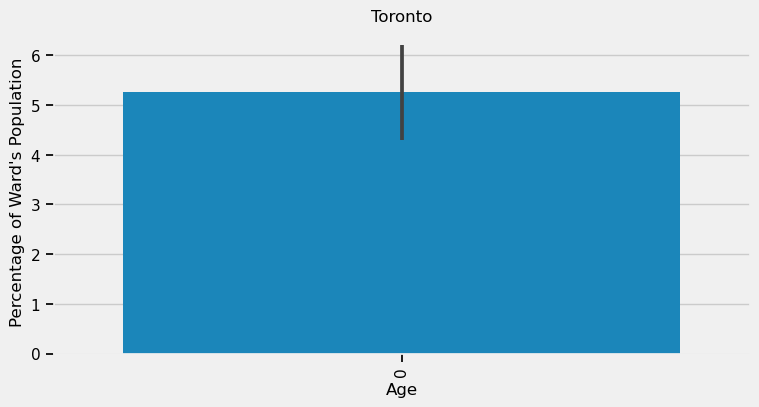

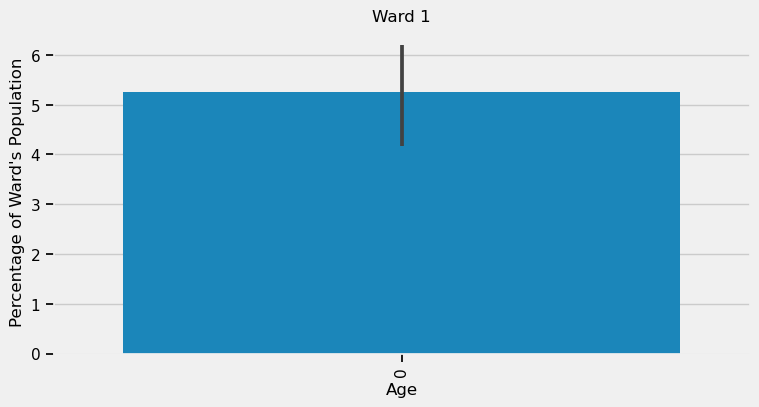

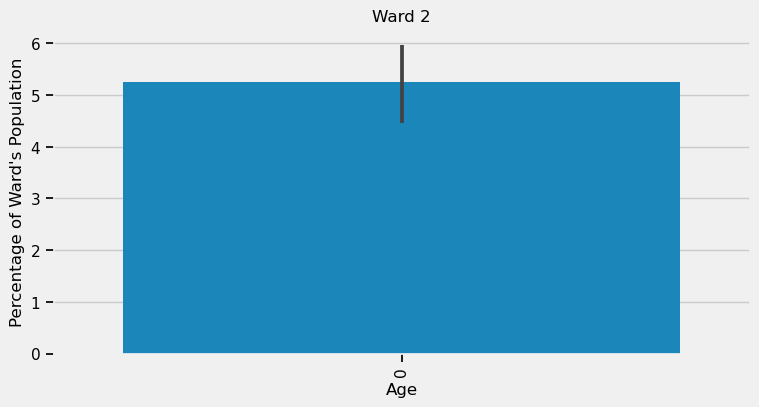

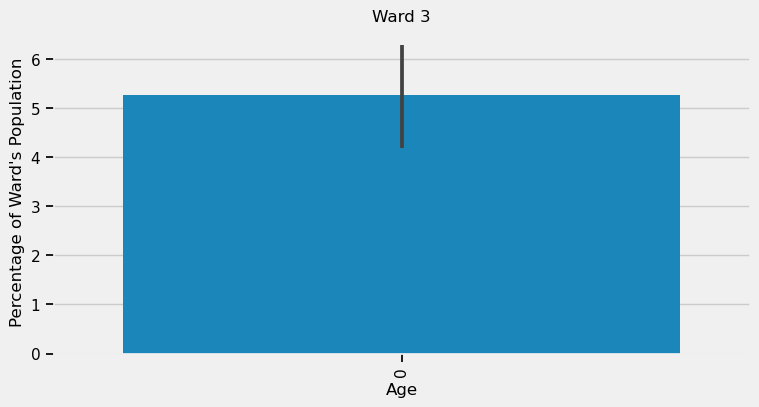

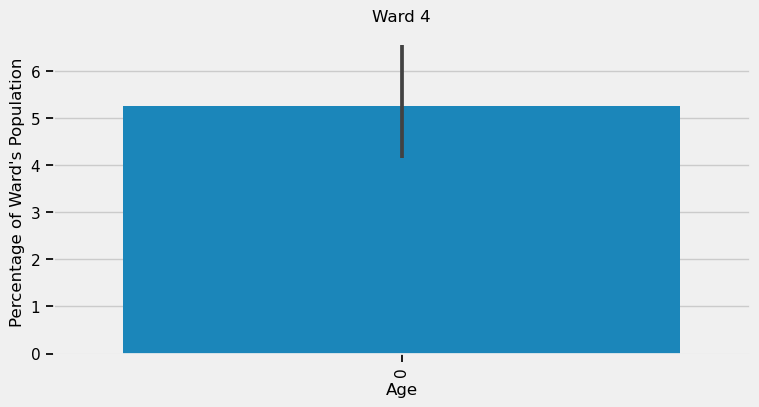

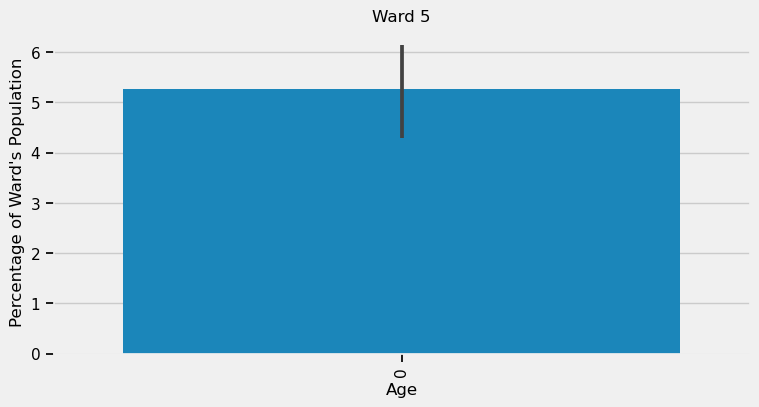

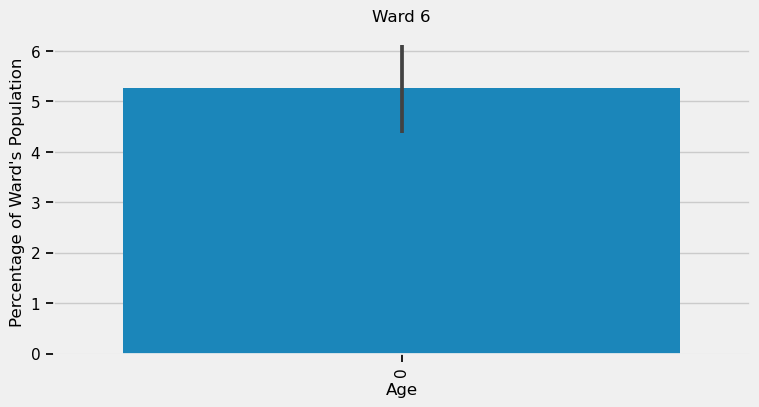

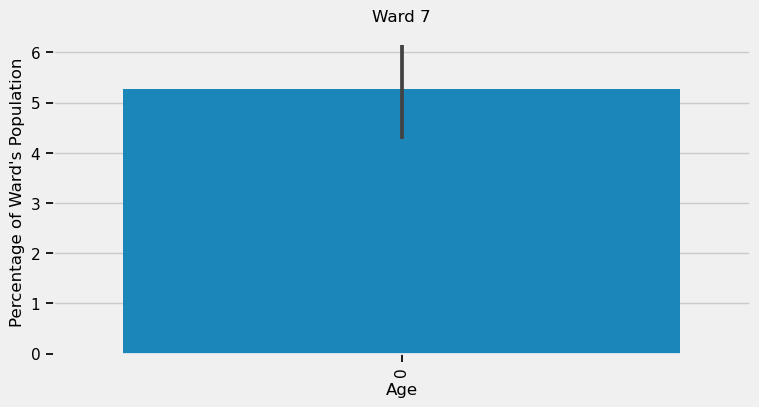

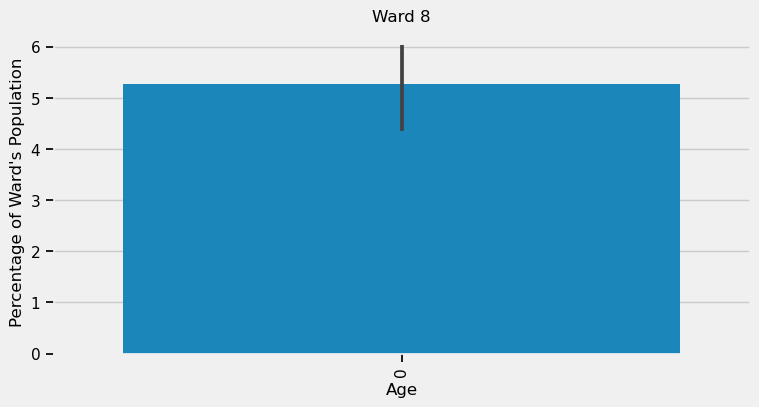

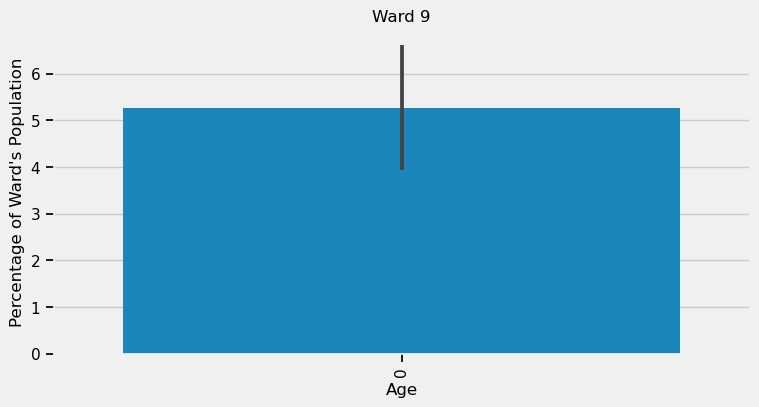

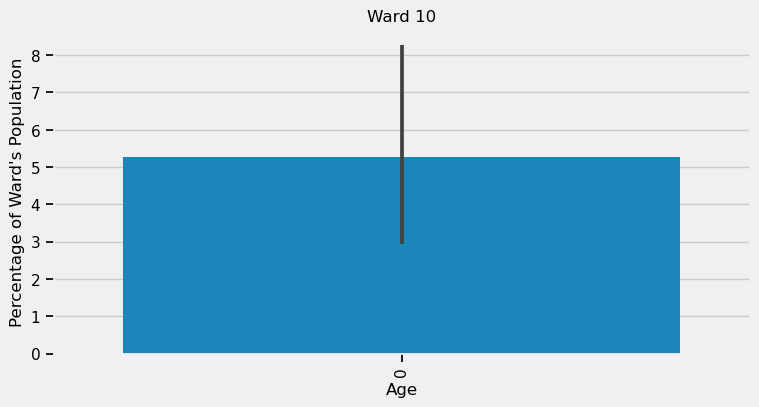

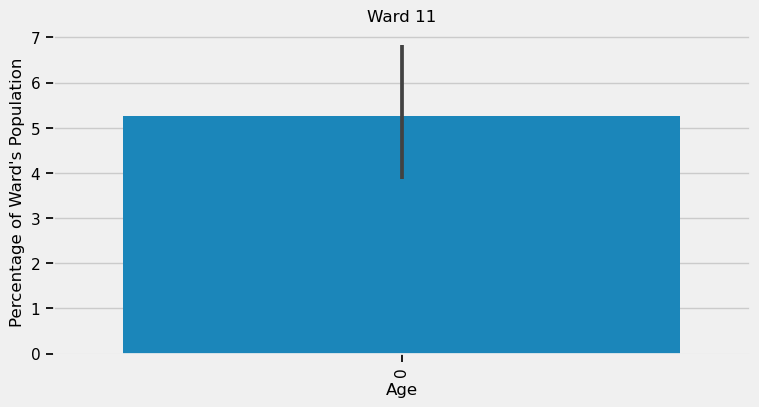

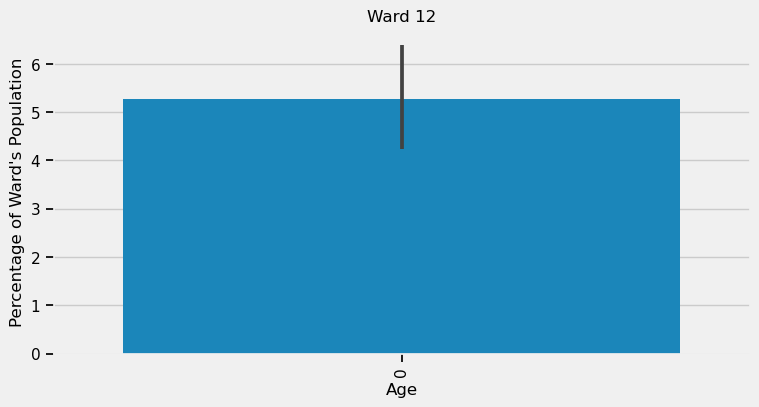

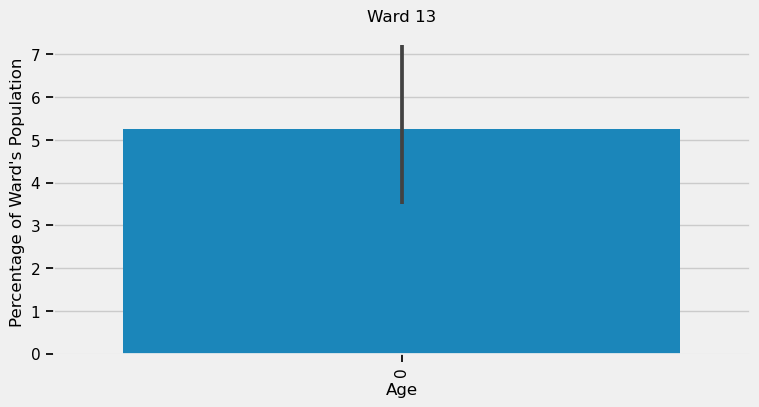

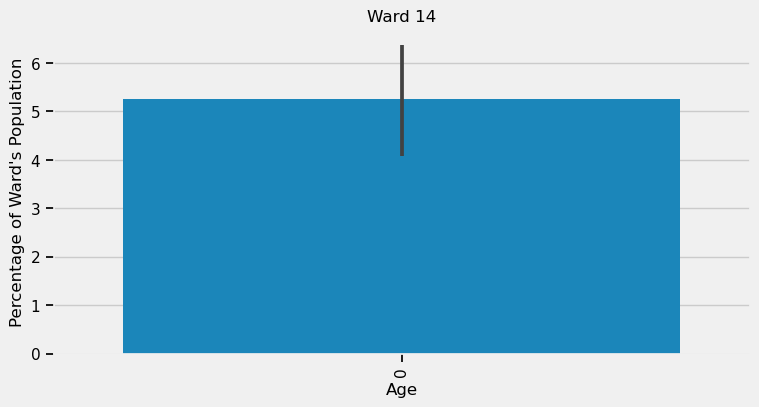

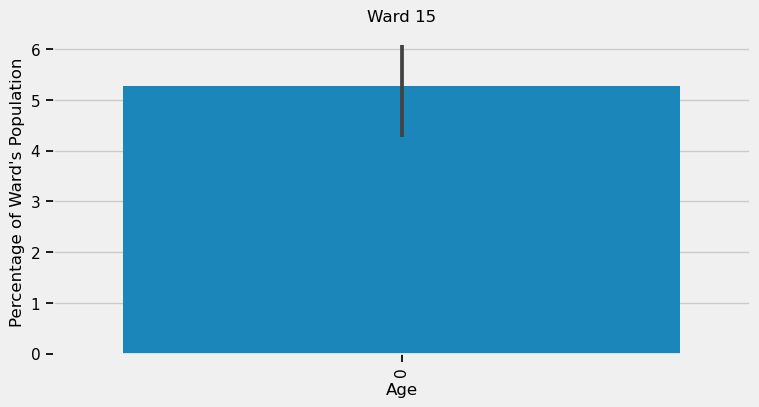

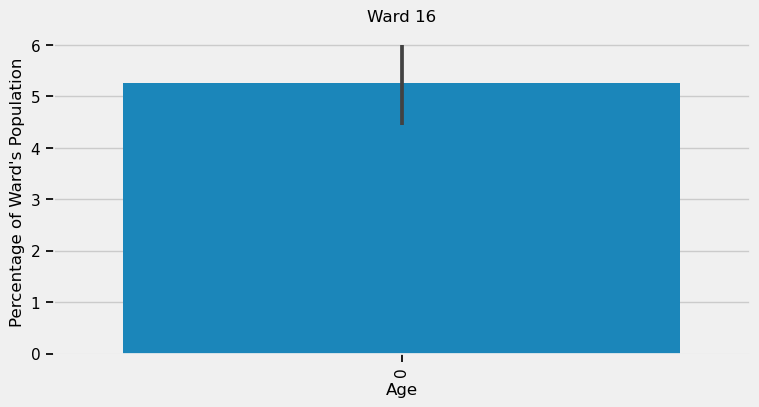

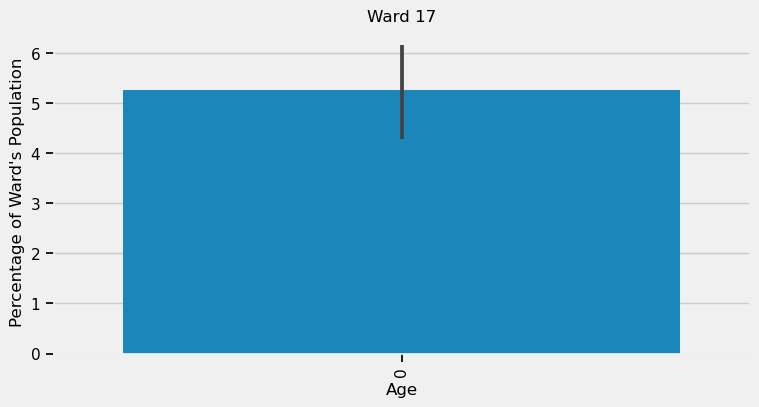

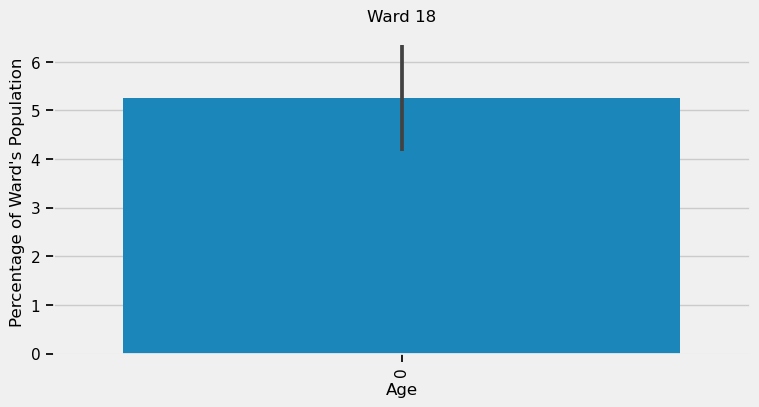

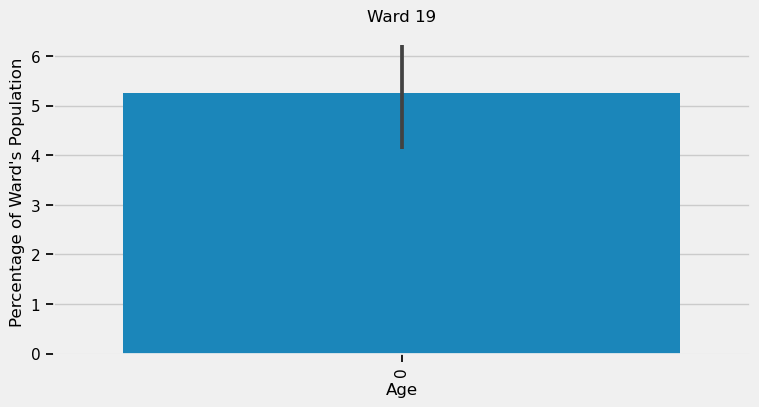

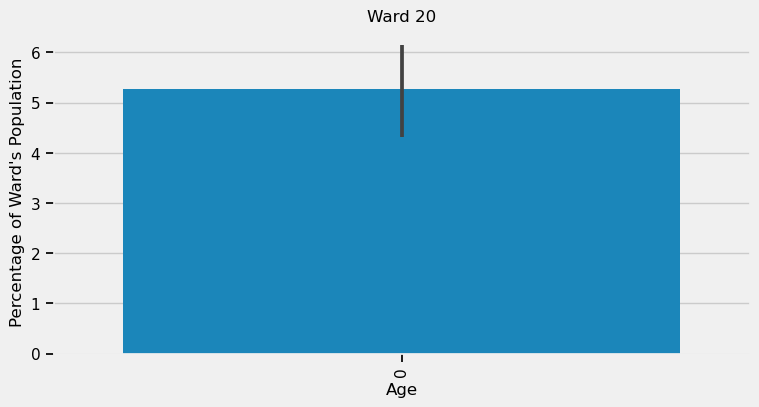

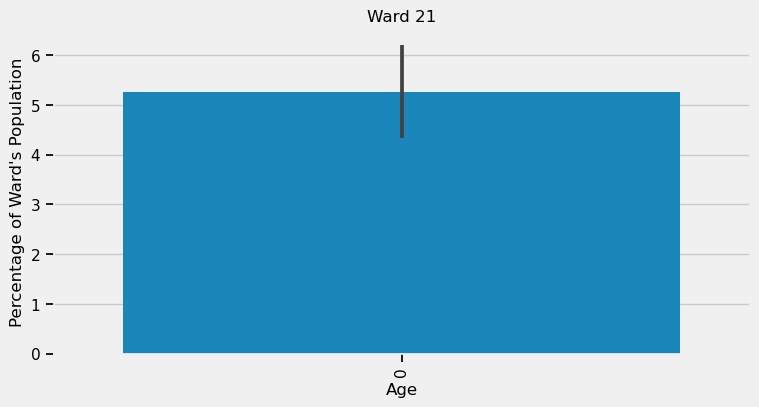

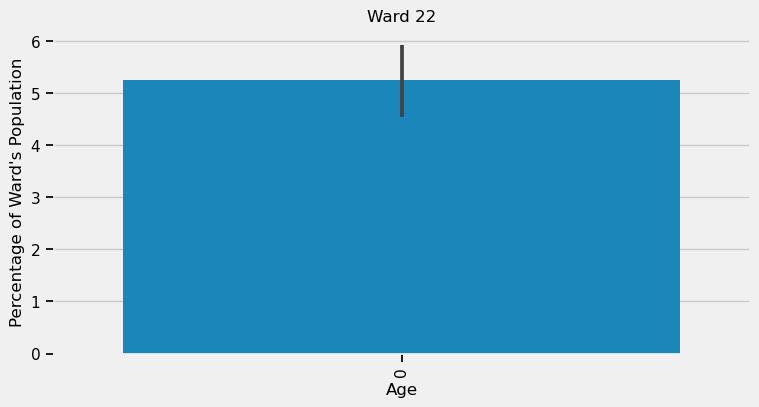

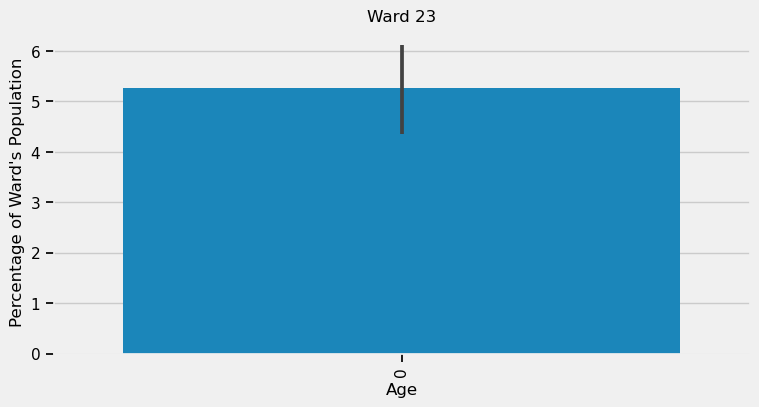

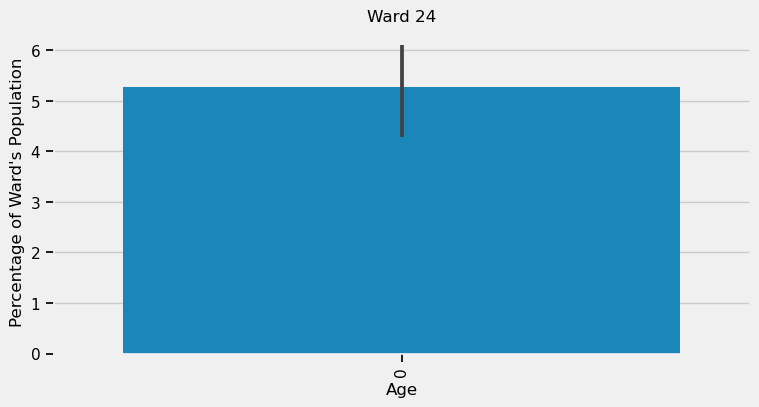

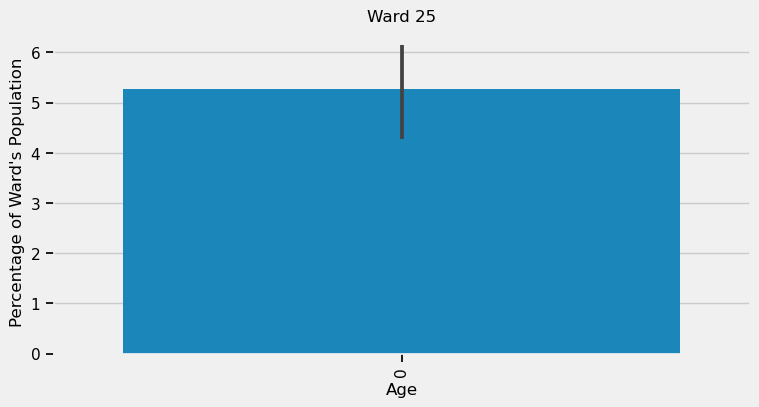

In [9]:
for ward in age_df.index:
    # Extract data from each row
    age_data = age_df.loc[ward]

    # Plot the age distribution
    plt.figure(figsize=(8, 4)) 
    sns.barplot(data = age_data)

    plt.title(ward)
    plt.xlabel('Age')
    plt.ylabel("Percentage of Ward's Population")
    plt.xticks(rotation=90)
    plt.show

### Dwelling Age in Ward

In [10]:
dwelling_df = combined_df[combined_df['Subcategory'] == 'Total - Occupied private dwellings by period of construction - 25% sample data']
dwelling_df = dwelling_df.transpose()
dwelling_df.columns = dwelling_df.loc['Grouping']
dwelling_df.drop(['Category', 'Subcategory', 'Grouping'], axis = 0, inplace = True)
dwelling_df = dwelling_df.apply(lambda row: (row / row[0])*100, axis=1)
dwelling_df = dwelling_df.drop(columns = ['Total - Occupied private dwellings by period of construction - 25% sample data'], axis = 1)
dwelling_df

Grouping    1960 or before    1961 to 1980    1981 to 1990    1991 to 2000  \
Toronto          29.303684       28.769613        9.456497        8.009338   
Ward 1           21.922119       41.929986       15.104235       11.655959   
Ward 2           29.683537       47.987650        6.671077        3.958540   
Ward 3           31.780404       18.330156        6.260008        7.678231   
Ward 4           54.257686       24.838188        5.380259        3.509304   
Ward 5           35.878371       33.980690        9.011209       10.931084   
Ward 6           25.093905       35.865746       11.183812        8.118260   
Ward 7           19.336430       50.975448       10.258792        6.489715   
Ward 8           38.995971       25.285854        7.971251        8.254383   
Ward 9           54.061747       16.619225        5.550690        4.740530   
Ward 10           6.627028        6.627028        7.203022        7.413601   
Ward 11          40.123341       17.174360        8.054569        5.933470   
Ward 12          36.795457       24.842957        7.193873        6.711987   
Ward 13          15.370115       21.242659       10.106576        9.649822   
Ward 14          60.473667       18.449227        5.536931        3.785011   
Ward 15          35.535848       29.377967        7.756682        8.481139   
Ward 16          24.069479       43.476557        9.990858        8.763223   
Ward 17           8.965818       48.356449        8.157694        5.089003   
Ward 18          12.601385       18.269041       10.098912       14.203759   
Ward 19          55.278416       23.531342        5.229187        5.841812   
Ward 20          40.198067       29.554946        8.280635        7.731774   
Ward 21          35.658819       32.811537        7.099717        8.837668   
Ward 22           8.788630       47.959317       18.190116        9.531882   
Ward 23           4.840074       39.346759       27.585040       11.389406   
Ward 24          26.431232       41.812664        9.835839       10.856670   
Ward 25           8.293362       30.558564       26.148847       15.828563   

Grouping    2001 to 2005    2006 to 2010    2011 to 2015    2016 to 2021  
Toronto         5.080132        5.512557        6.545381        7.321937  
Ward 1          2.766487        3.081159        1.953586        1.547135  
Ward 2          2.006836        2.260448        4.201125        3.208733  
Ward 3          6.115135        7.792604       10.735799       11.292413  
Ward 4          1.608010        3.246359        4.267799        2.892395  
Ward 5          4.350239        2.352680        1.420486        2.086339  
Ward 6          3.174603        4.701321        5.573731        6.312856  
Ward 7          2.733908        3.861977        3.118779        3.251493  
Ward 8          4.900359        3.299575        4.845911        6.446695  
Ward 9          3.076418        3.689512        6.941099        5.331728  
Ward 10        10.745696       16.437508       23.826335       21.119782  
Ward 11         4.933657        5.830686        8.372267        9.568305  
Ward 12         3.347388        4.732811        3.898115       12.477412  
Ward 13         5.278040        7.953310       10.548829       19.843399  
Ward 14         1.557262        3.060452        3.503839        3.622797  
Ward 15         4.683987        4.571571        4.571571        5.021234  
Ward 16         4.362022        3.526185        2.285490        3.500065  
Ward 17         4.499290        5.143606        9.227913       10.549307  
Ward 18        15.707221       12.680514       11.147379        5.291790  
Ward 19         2.899026        2.056668        2.100427        3.074062  
Ward 20         2.350555        4.892018        3.364754        3.627252  
Ward 21         5.571305        3.821028        3.217059        2.958215  
Ward 22         3.468510        2.686139        4.355196        5.033251  
Ward 23         8.749365        3.807751        2.267727        2.013877  
Ward 24         4.

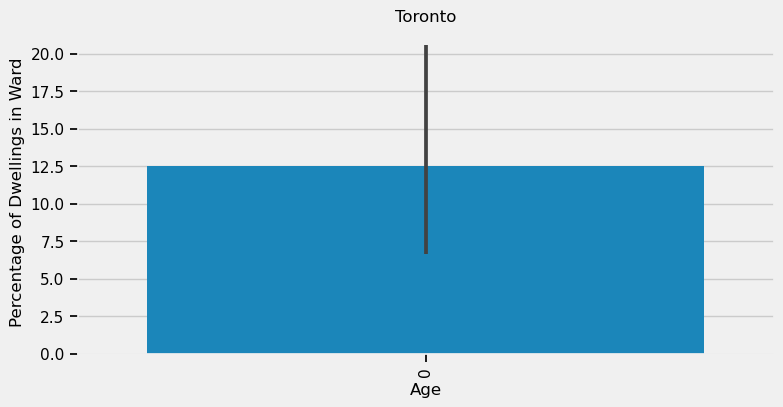

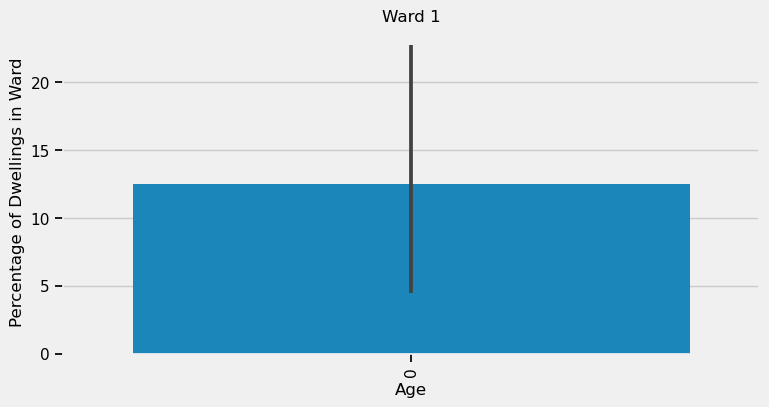

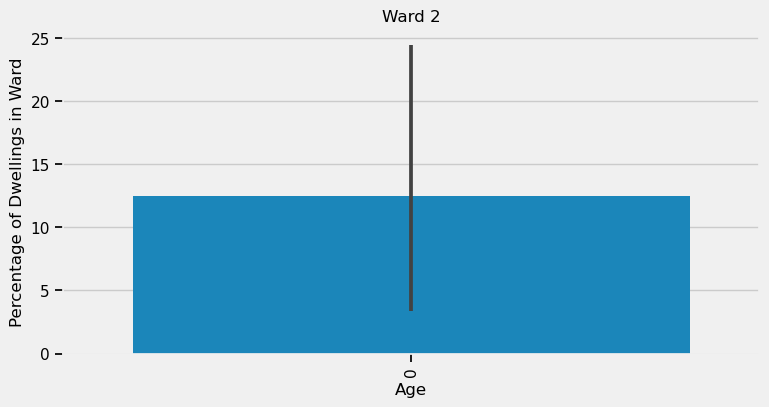

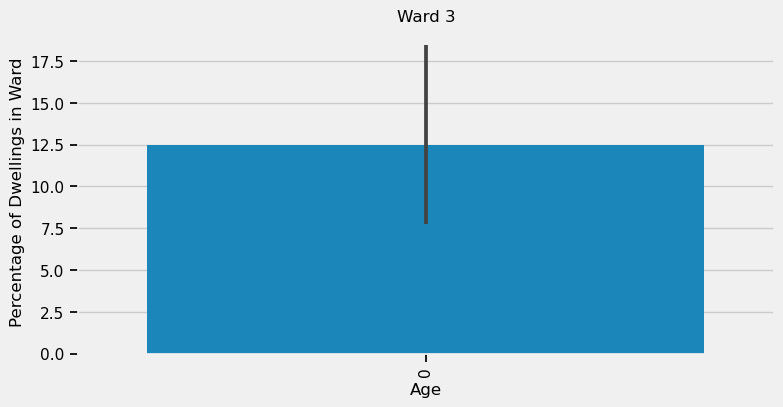

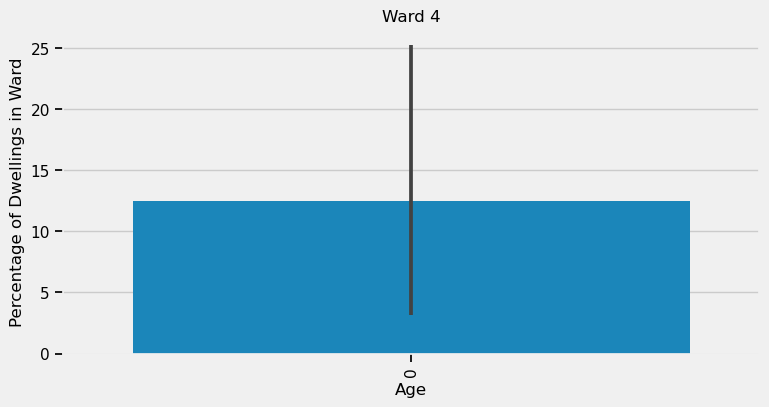

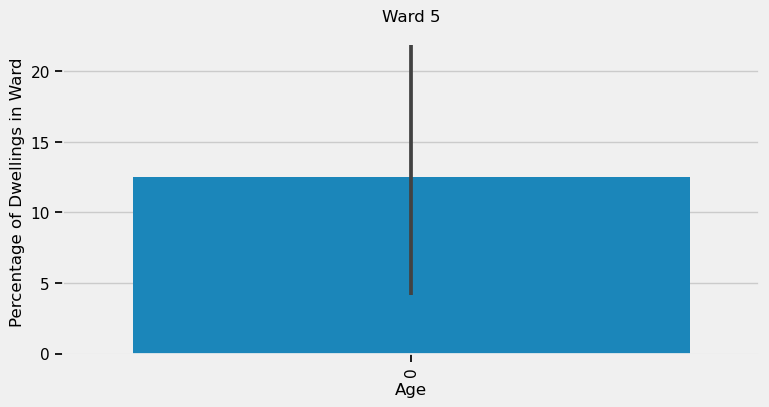

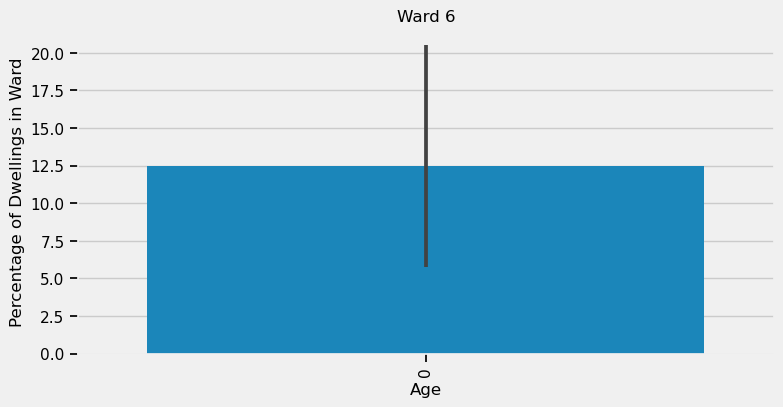

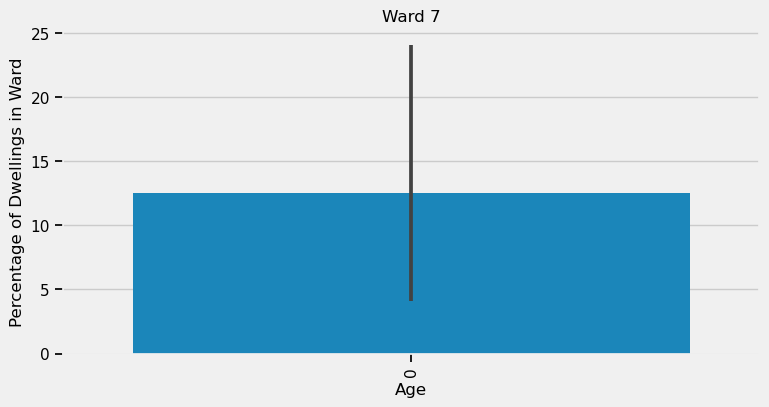

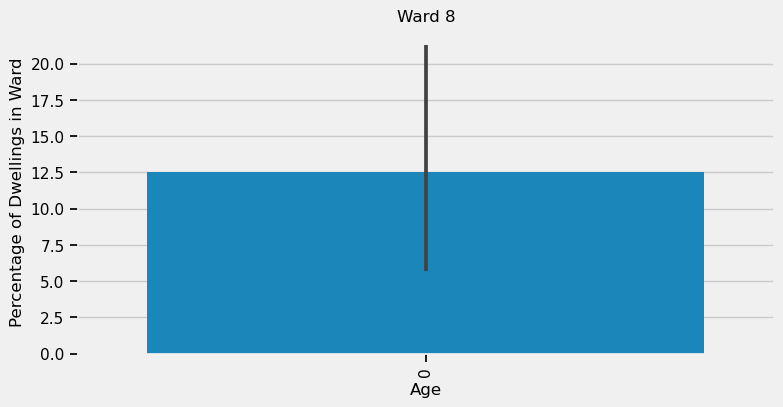

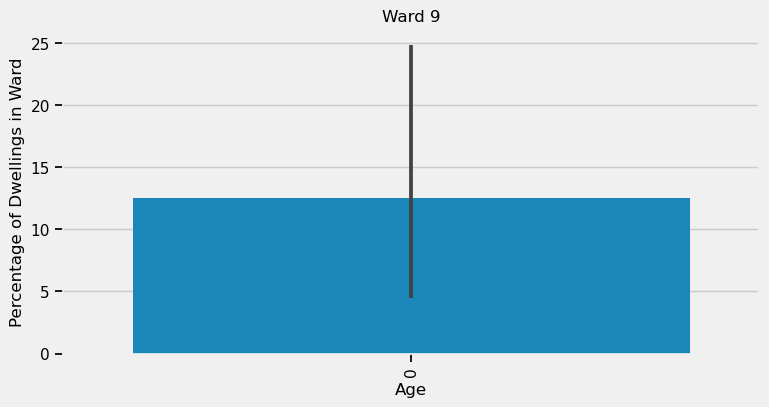

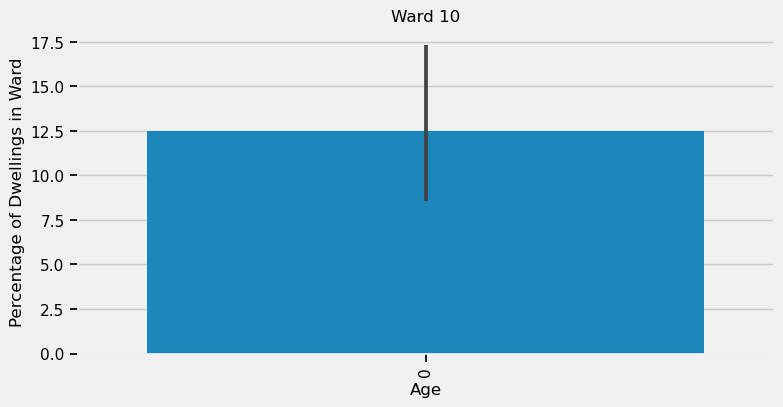

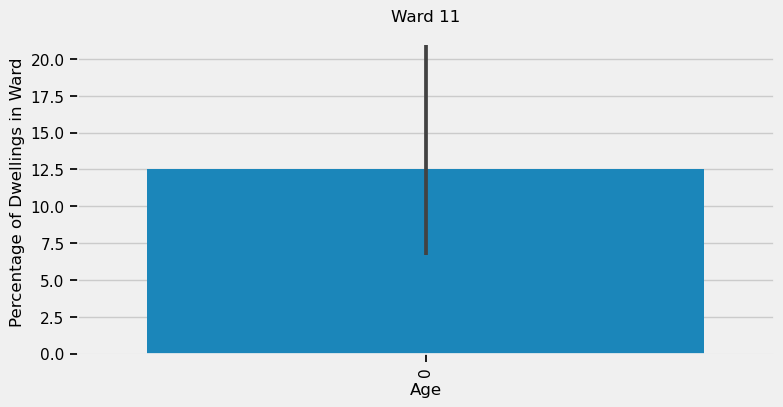

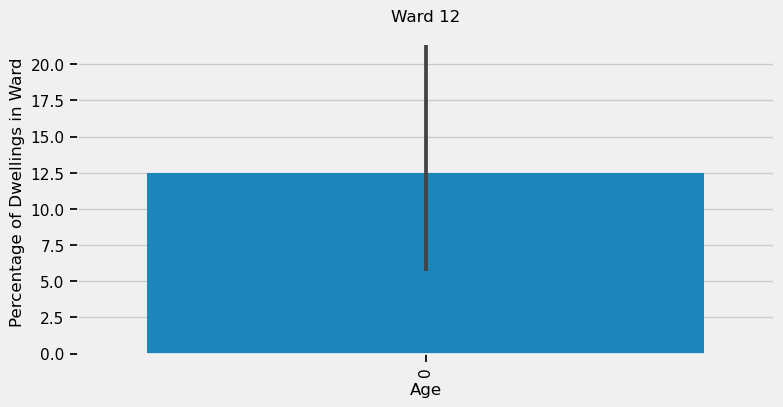

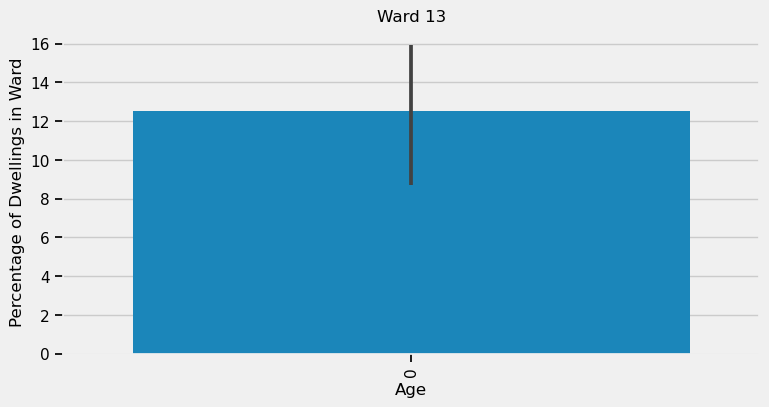

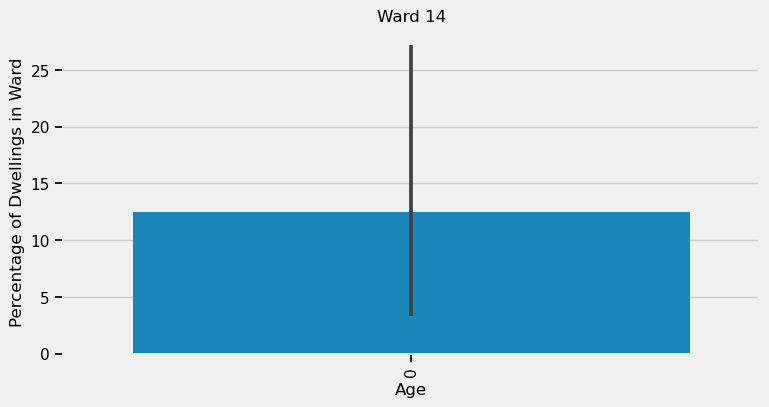

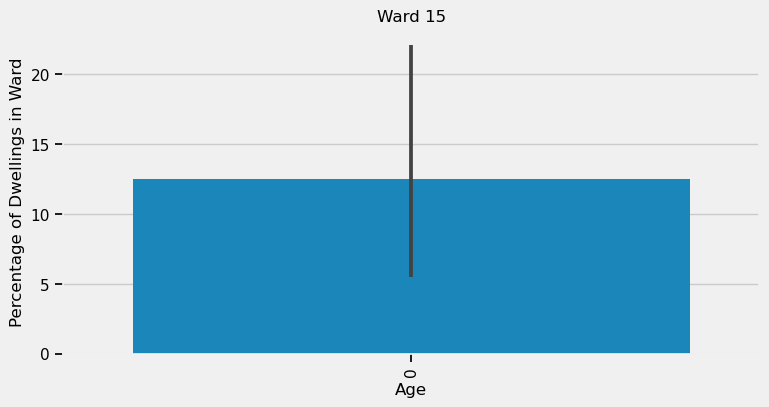

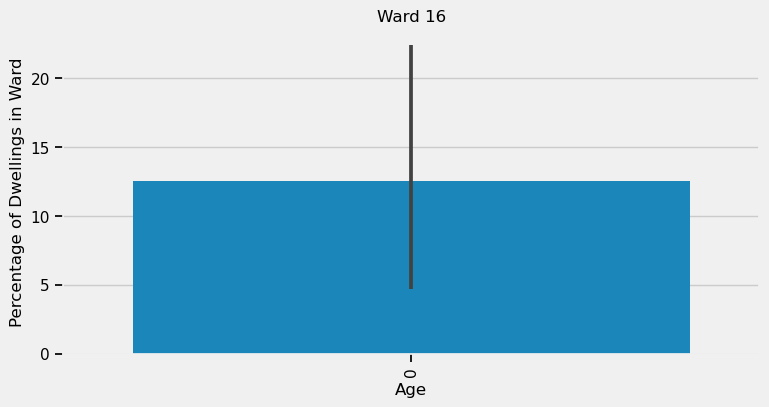

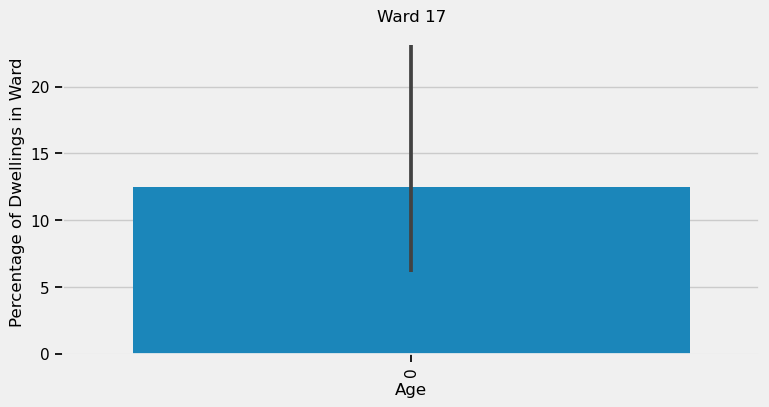

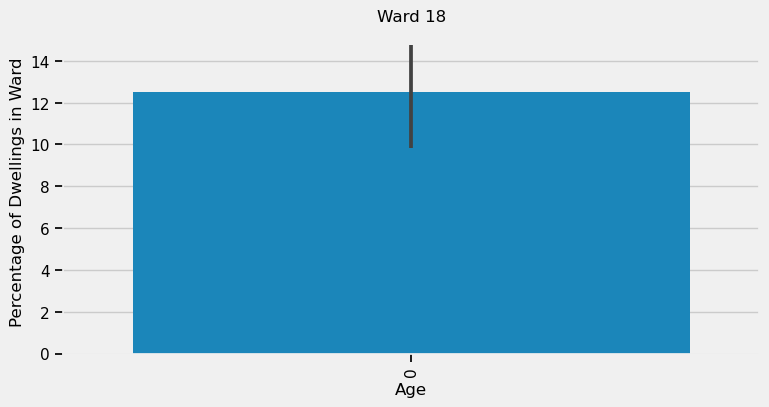

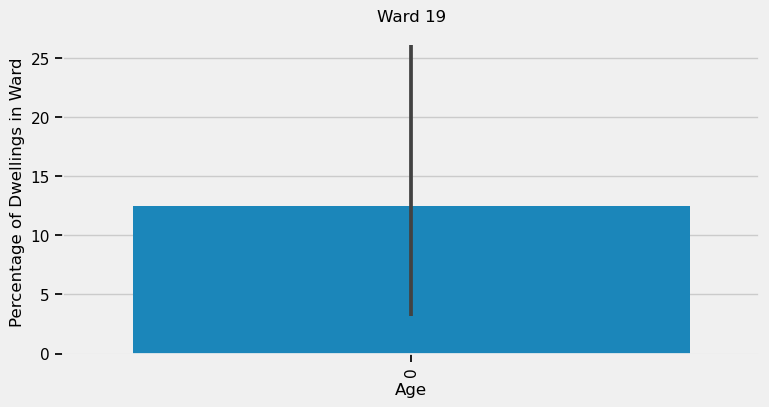

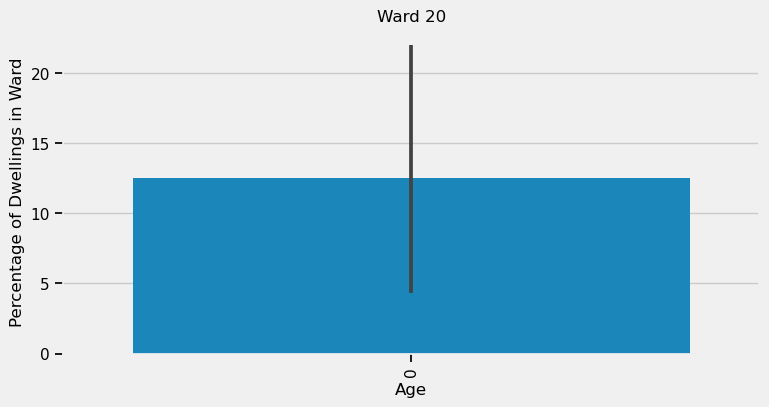

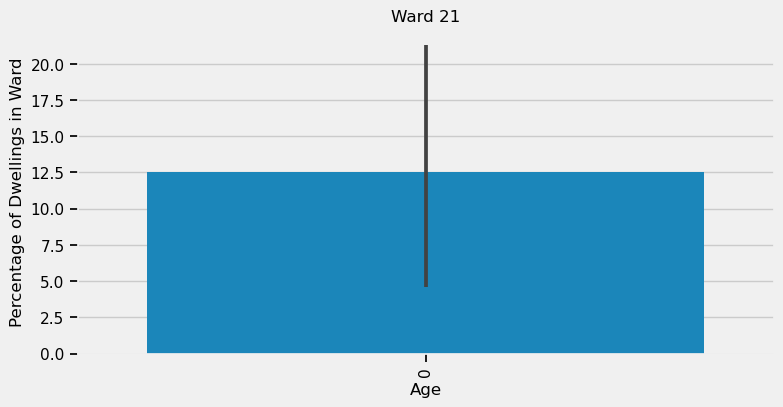

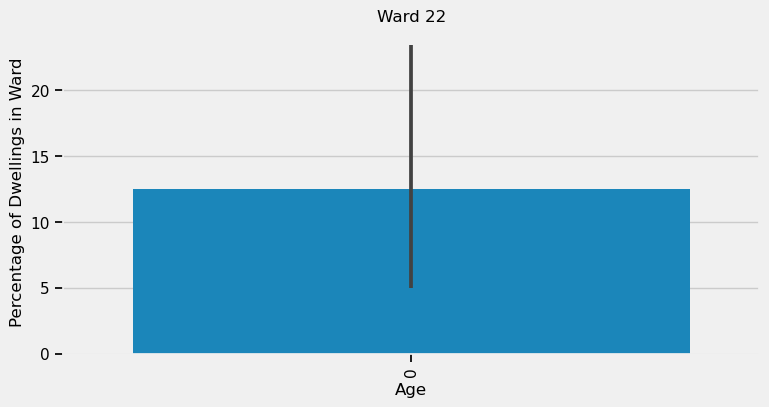

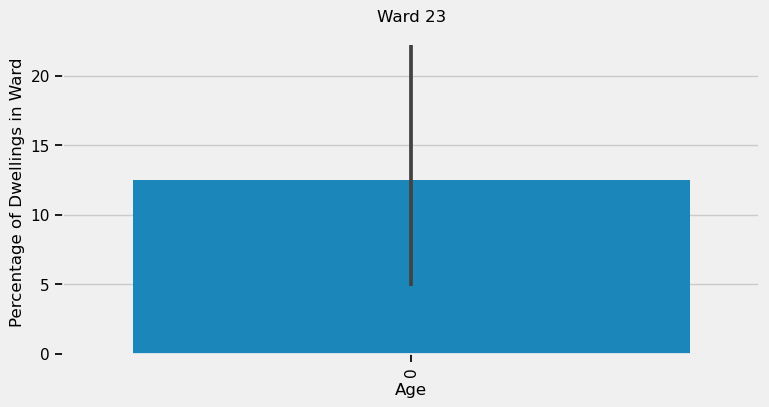

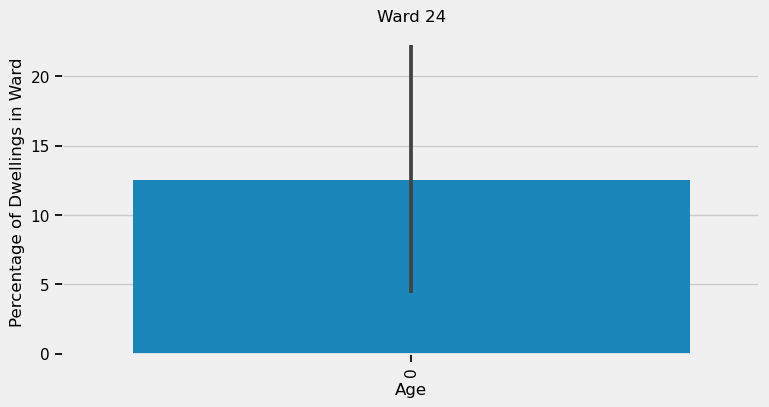

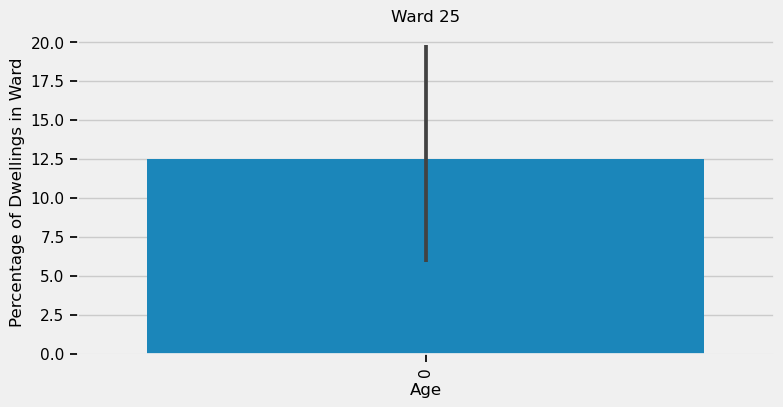

In [11]:
for ward in dwelling_df.index:
    # Extract data from each row
    dwelling_age_data = dwelling_df.loc[ward]

    # Plot the age distribution
    plt.figure(figsize=(8, 4)) 
    sns.barplot(data = dwelling_age_data)

    plt.title(ward)
    plt.xlabel('Age')
    plt.ylabel("Percentage of Dwellings in Ward")
    plt.xticks(rotation=90)
    plt.show

### Migration, Mobllity & Languages in Ward

In [12]:
mml_df = combined_df[combined_df['Category'] == 'Migration, Mobllity & Languages']
mml_df

Category  \
92   Migration, Mobllity & Languages   
93   Migration, Mobllity & Languages   
94   Migration, Mobllity & Languages   
95   Migration, Mobllity & Languages   
96   Migration, Mobllity & Languages   
..                               ...   
924  Migration, Mobllity & Languages   
925  Migration, Mobllity & Languages   
926  Migration, Mobllity & Languages   
927  Migration, Mobllity & Languages   
928  Migration, Mobllity & Languages   

                                           Subcategory  \
92   Total - Generation status for the population i...   
93   Total - Generation status for the population i...   
94   Total - Generation status for the population i...   
95   Total - Generation status for the population i...   
96   Total - Immigrant status and period of immigra...   
..                                                 ...   
924  Total - Knowledge of official languages for th...   
925  Total - Knowledge of official languages for th...   
926  Total - Knowledge of official languages for th...   
927  Total - Knowledge of official languages for th...   
928  Total - Knowledge of official languages for th...   

                                              Grouping  Toronto  Ward 1  \
92   Total - Generation status for the population i...  2761285  115115   
93                                    First generation  1462095   72235   
94                                   Second generation   741035   32930   
95                            Third generation or more   558155    9950   
96   Total - Immigrant status and period of immigra...  2761285  115115   
..                                                 ...      ...     ...   
924  Total - Knowledge of official languages for th...  2761285  115120   
925                                       English only  2399270  104770   
926                                        French only     2515      95   
927                                 English and French   235990    4660   
928                         Neither English nor French   123510    5595   

     Ward 2  Ward 3  Ward 4  Ward 5  Ward 6  ... Ward 16 Ward 17 Ward 18  \
92   117205  139920  104715  115675  107360  ...   94335  112590  117125   
93    51940   61175   36980   63850   64400  ...   55465   79540   83145   
94    36490   38925   30520   36700   28420  ...   24365   23855   23220   
95    28765   39815   37220   15125   14535  ...   14505    9195   10760   
96   117205  139920  104715  115675  107360  ...   94335  112590  117125   
..      ...     ...     ...     ...     ...  ...     ...     ...     ...   
924  117200  139915  104715  115675  107355  ...   94335  112590  117125   
925  104835  123335   86610  103980   96965  ...   83220   98520  102690   
926      75     110      90     150      55  ...     145      75      80   
927    9380   13065   16155    5335    5210  ...    7375    7490    7480   
928    2915    3410    1865    6210    5125  ...    3600    6510    6875   

    Ward 19 Ward 20 Ward 21 Ward 22 Ward 23 Ward 24 Ward 25  
92   108500  110095  111560  103690   94025  102755  101485  
93    38700   55430   68765   72950   65980   61325   56710  
94    29590   29210   28820   23930   23960   27390   29760  
95    40205   25460   13980    6810    4080   14035   15015  
96   108500  110095  111560  103690   94025  102755  101485  
..      ...     ...     ...     ...     ...     ...     ...  
924  108500  110095  111560  103690   94025  102755  101485  
925   93120   99885  101460   84805   75595   93670   93440  
926     115     115     155      85      65     205      75  
927   13495    7085    5445    4830    3455    5330    5340  
928    1765    3010    4500   13970   14910    3545    2630  

[837 rows x 29 columns]

Explore Generation Status

In [18]:
generation_status_df =  mml_df[mml_df['Subcategory'] == 'Total - Generation status for the population in private households - 25% sample data']
generation_status_df = generation_status_df.transpose()
generation_status_df.columns = generation_status_df.loc['Grouping']
generation_status_df.drop(['Category', 'Subcategory', 'Grouping'], axis = 0, inplace = True)
generation_status_df = generation_status_df.apply(lambda row: (row / row[0])*100, axis=1)
generation_status_df = generation_status_df.drop(columns = ['Total - Generation status for the population in private households - 25% sample data'], axis = 1)
generation_status_df

Grouping  First generation  Second generation  Third generation or more
Toronto          52.949804          26.836600                 20.213596
Ward 1           62.750293          28.606176                  8.643530
Ward 2           44.315516          31.133484                 24.542468
Ward 3           43.721412          27.819468                 28.455546
Ward 4           35.314902          29.145777                 35.544096
Ward 5           55.197752          31.726821                 13.075427
Ward 6           59.985097          26.471684                 13.538562
Ward 7           63.785971          29.658273                  6.555755
Ward 8           44.826685          28.496778                 26.676537
Ward 9           43.277953          30.273083                 26.453738
Ward 10          49.411026          25.863151                 24.725823
Ward 11          44.098257          25.125751                 30.775993
Ward 12          42.837109          25.803059                 31.359832
Ward 13          53.268910          23.799547                 22.931543
Ward 14          34.034719          29.089953                 36.880111
Ward 15          46.493442          26.849790                 26.651819
Ward 16          58.795781          25.828166                 15.376053
Ward 17          70.645706          21.187494                  8.166800
Ward 18          70.988260          19.824973                  9.186766
Ward 19          35.668203          27.271889                 37.055300
Ward 20          50.347427          26.531632                 23.125483
Ward 21          61.639477          25.833632                 12.531373
Ward 22          70.353940          23.078407                  6.567654
Ward 23          70.172826          25.482584                  4.339271
Ward 24          59.680794          26.655637                 13.658703
Ward 25          55.880179          29.324531                 14.795290

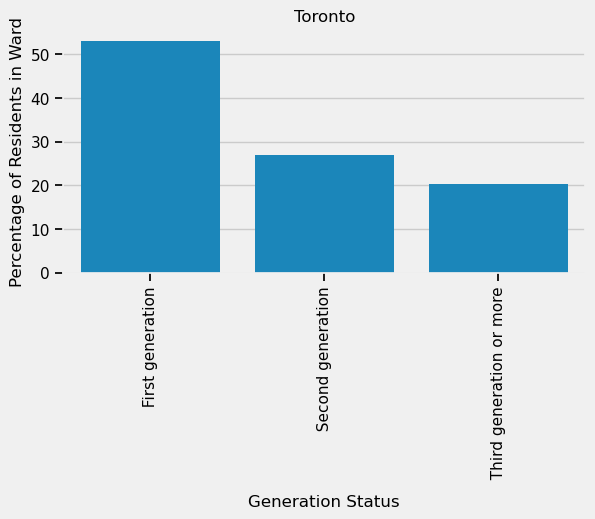

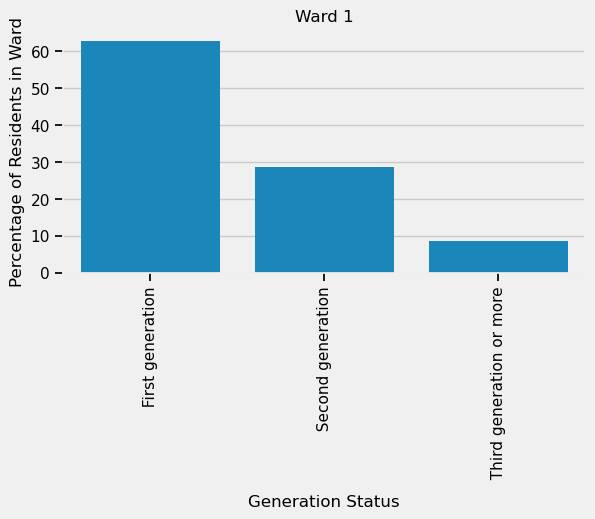

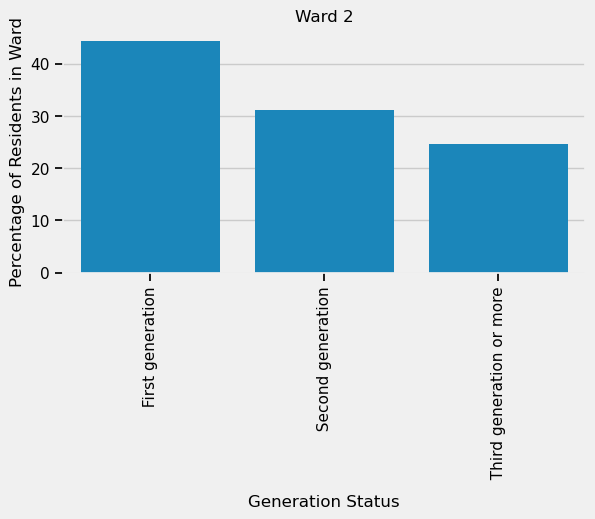

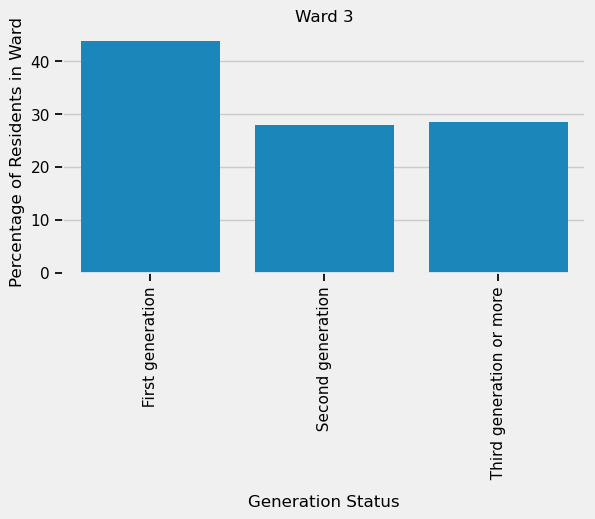

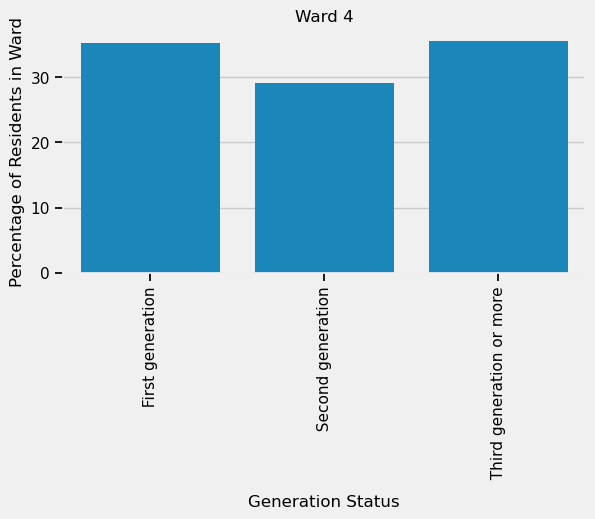

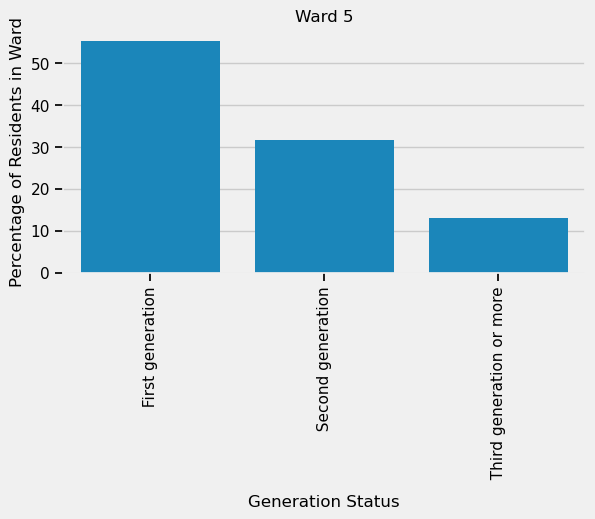

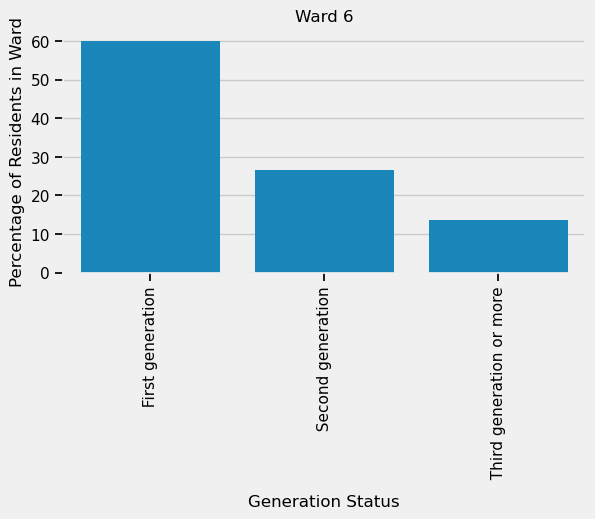

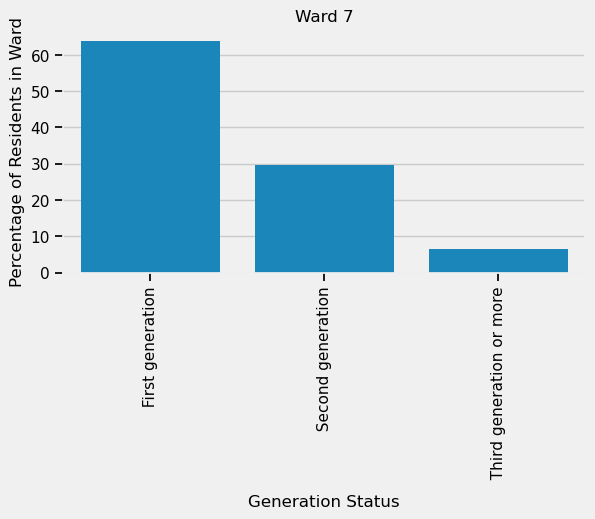

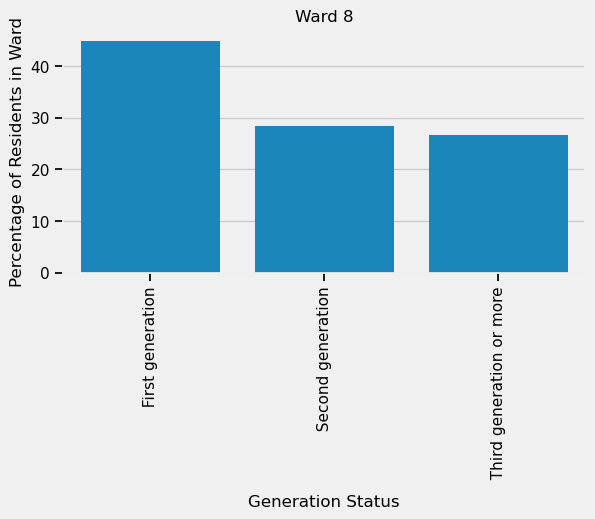

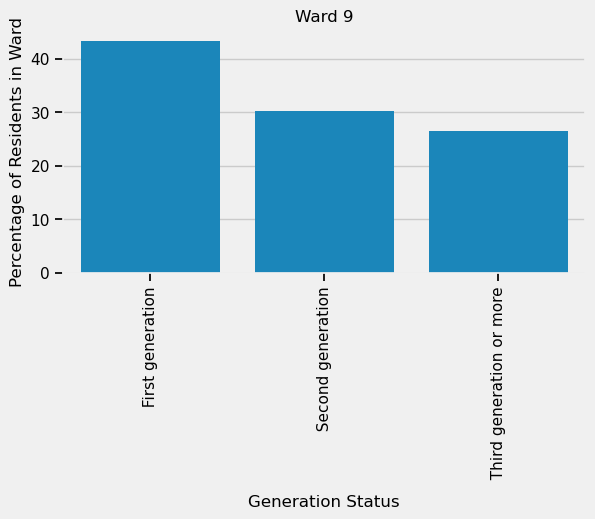

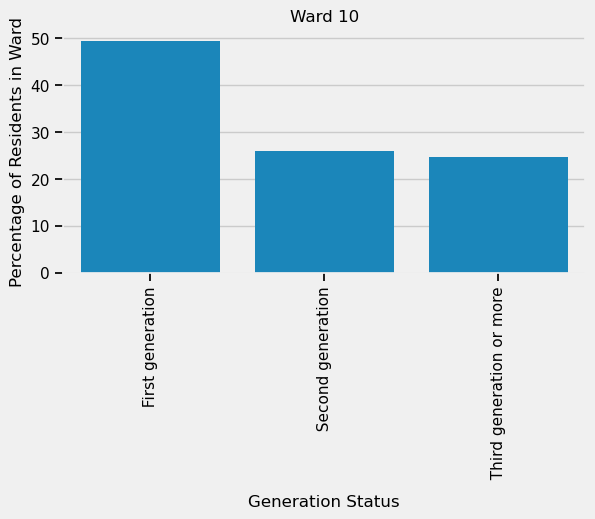

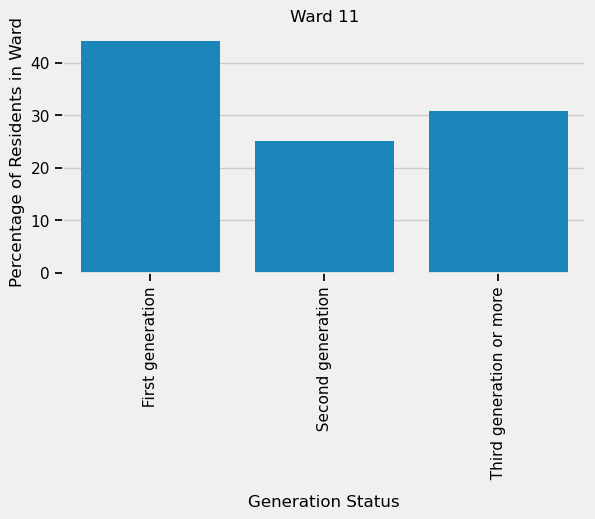

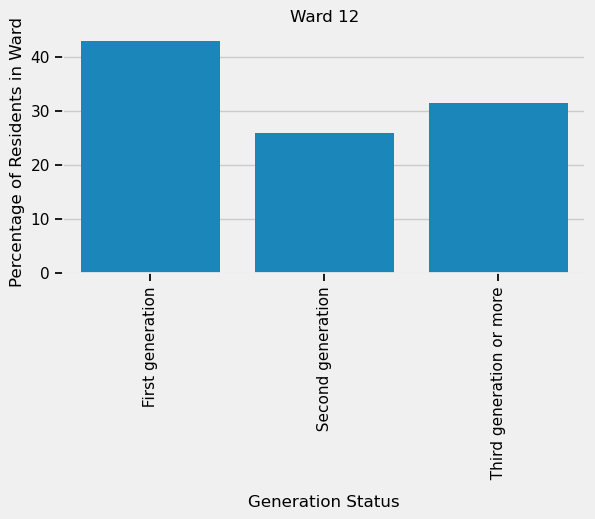

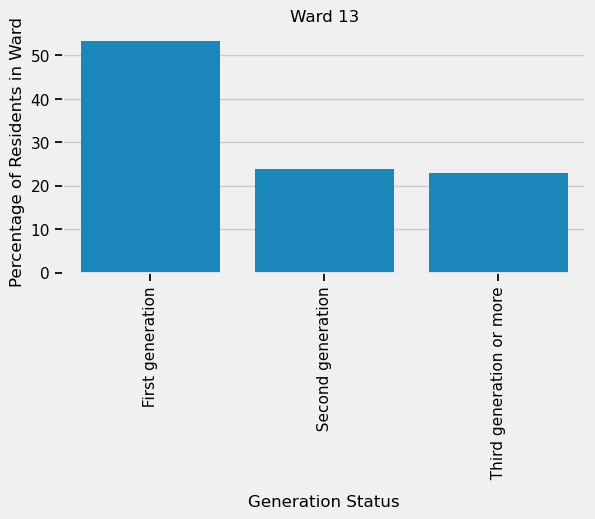

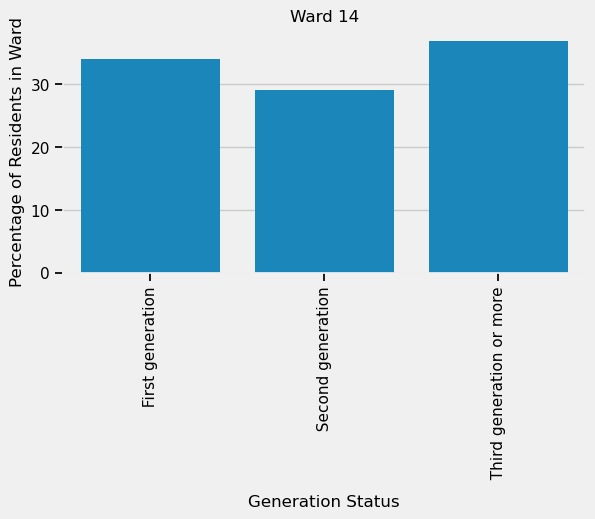

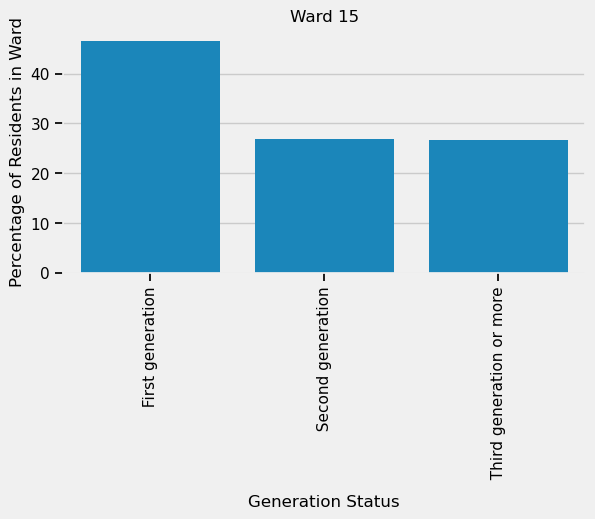

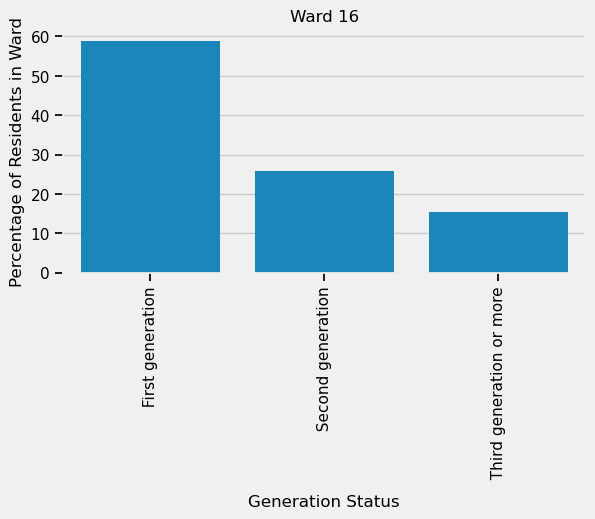

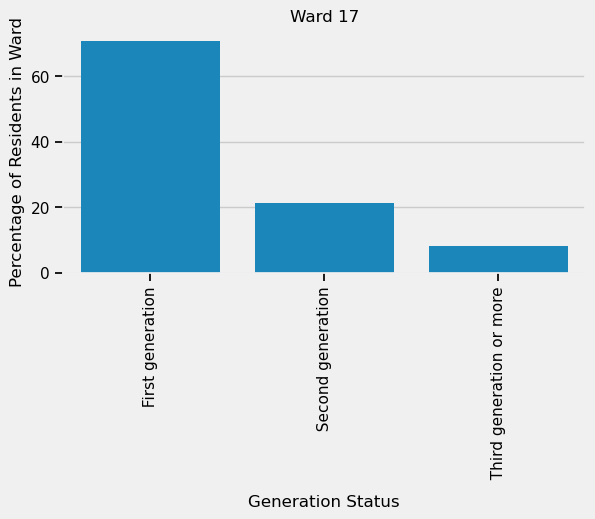

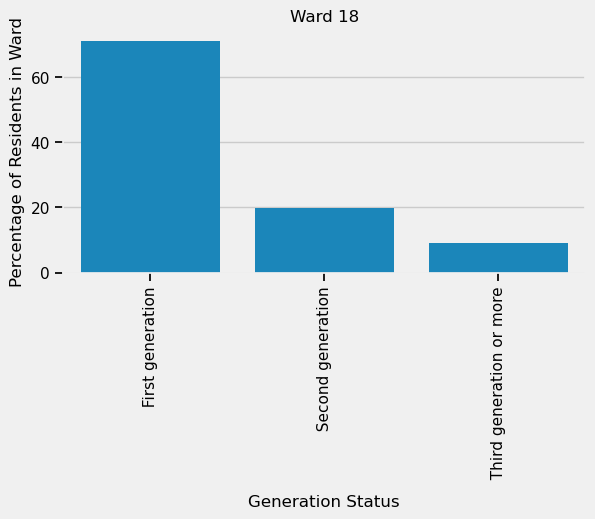

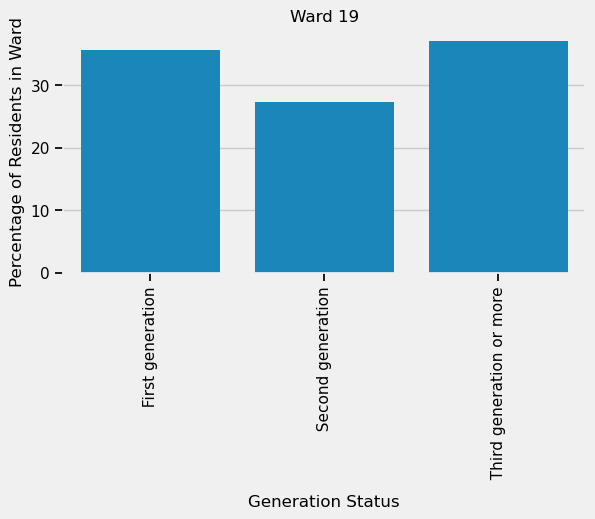

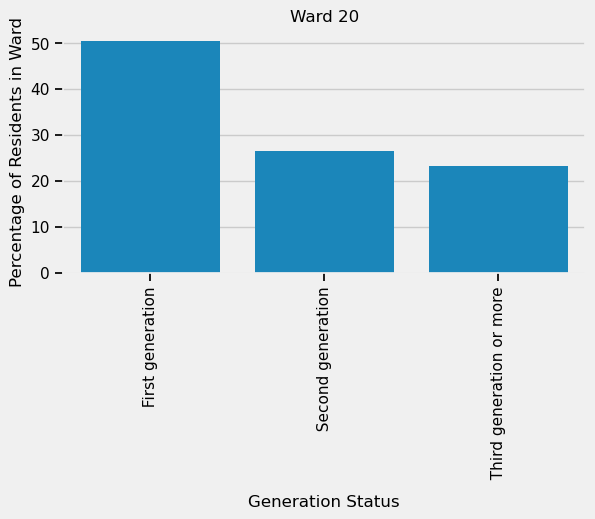

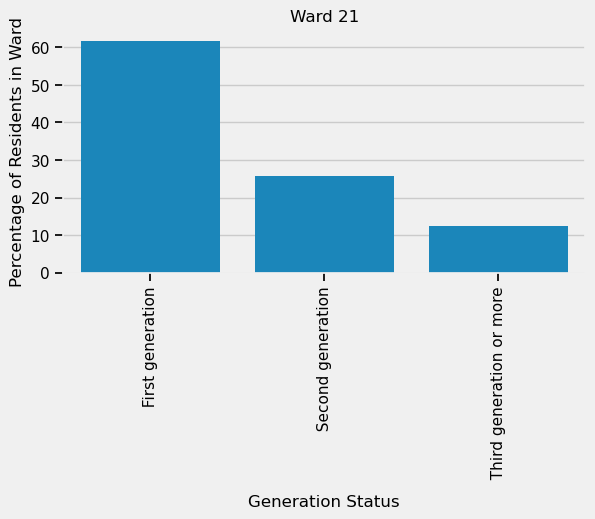

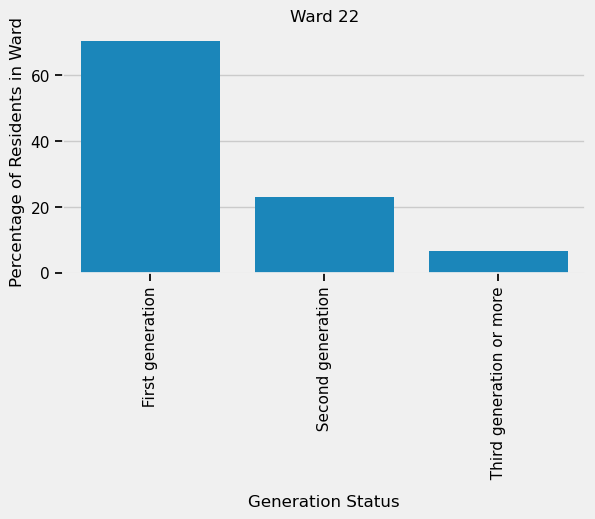

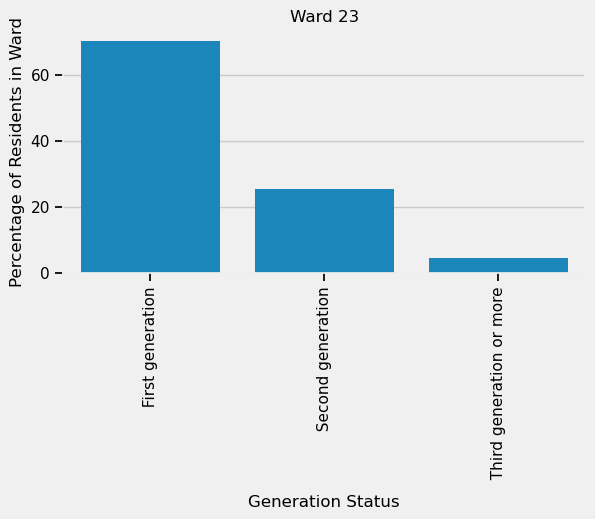

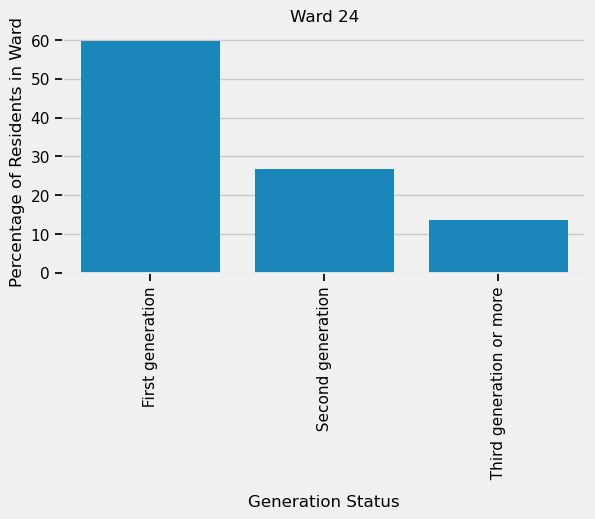

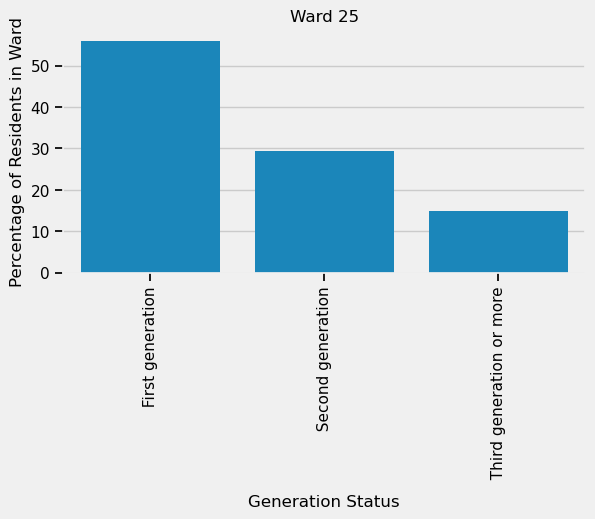

In [19]:
for ward in generation_status_df.index:
    # Extract data from each row
    generation_status_data = generation_status_df.loc[ward]

    # Plot the age distribution
    plt.figure(figsize=(6, 3)) 
    sns.barplot(data = generation_status_data)

    plt.title(ward)
    plt.xlabel('Generation Status')
    plt.ylabel("Percentage of Residents in Ward")
    plt.xticks(rotation=90)
    plt.show

Explore Places of Birth of Immigrant Population

In [21]:
birth_location_df = mml_df[mml_df['Subcategory'] == 'Total - Selected places of birth for the immigrant population in private households - 25% sample data']
birth_location_df['Grouping'] = birth_location_df['Grouping'].str.strip()
birth_location_df = birth_location_df.transpose()
birth_location_df.columns = birth_location_df.loc['Grouping']
birth_location_df.drop(['Category', 'Subcategory', 'Grouping'], axis = 0, inplace = True)
birth_location_df = birth_location_df.apply(lambda row: (row / row[0])*100, axis=1)
birth_location_df = birth_location_df[['Americas', 'Europe',  'Africa', 'Asia']]
birth_location_df

Grouping   Americas     Europe     Africa       Asia
Toronto   16.403735  20.698758   6.843734  55.739655
Ward 1    24.762273  11.704677  13.366834  49.918825
Ward 2    15.396514  48.489223   6.558730  29.246159
Ward 3    14.560088  41.421255   5.789281  37.826962
Ward 4    17.932099  41.296296   6.589506  33.364198
Ward 5    32.119234  27.531999  12.241216  27.892793
Ward 6    15.002100  26.862663   4.594708  53.439731
Ward 7    28.987241  14.338118  10.693780  45.861244
Ward 8    18.982672  29.938513   5.768586  45.041923
Ward 9    20.734014  46.147055   5.095220  27.443562
Ward 10   14.143944  19.449082   6.835467  59.052124
Ward 11   15.292764  30.038843   5.322975  48.611711
Ward 12   21.741281  29.433589   6.715310  41.491467
Ward 13   14.816335  15.626924  11.235379  57.808332
Ward 14   15.666614  33.526555   5.154316  44.869184
Ward 15   11.238532  19.929986   6.482376  61.842105
Ward 16   12.581861  18.088907   9.704306  59.436396
Ward 17    7.879320  12.009373   4.752490  75.248975
Ward 18    5.876515  14.042674   2.970157  76.940526
Ward 19   17.184776  27.643812   9.616502  44.901220
Ward 20   14.373635  13.748263   9.241612  62.428033
Ward 21   13.985731  11.350738   5.188909  69.312470
Ward 22    8.446227   6.652539   4.351775  80.420798
Ward 23   10.841291   3.144551   2.807046  83.100099
Ward 24   18.708972   9.345368   5.798687  65.919037
Ward 25   23.803646   9.409419   4.794911  61.697683

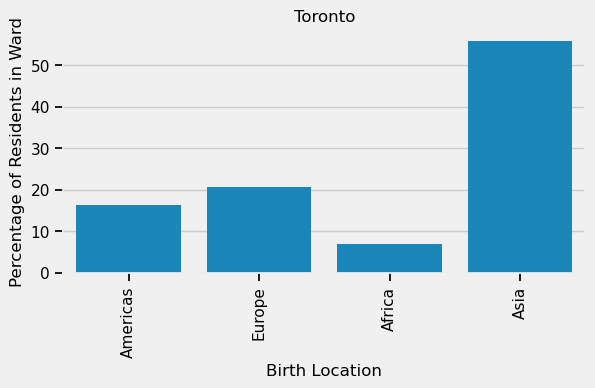

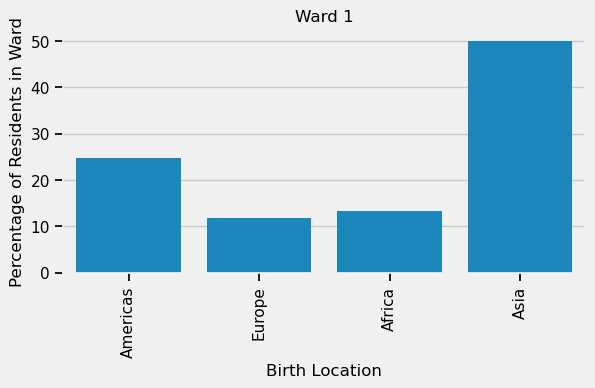

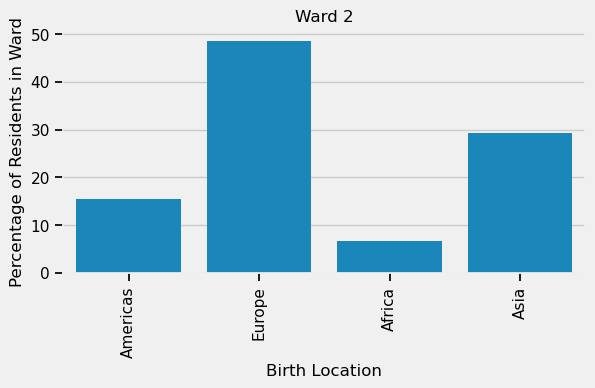

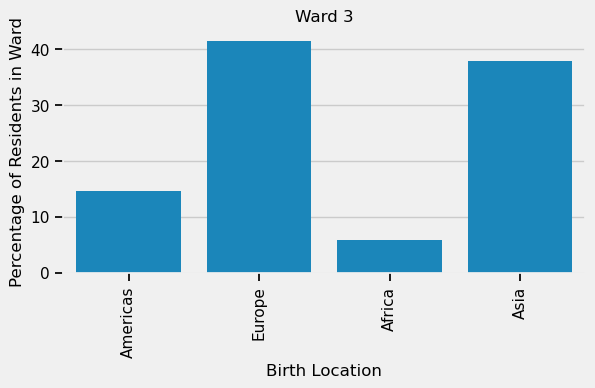

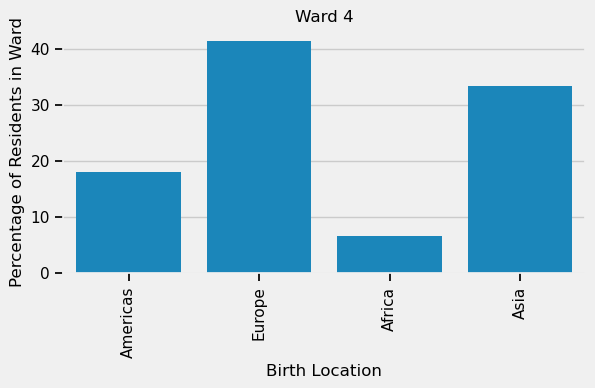

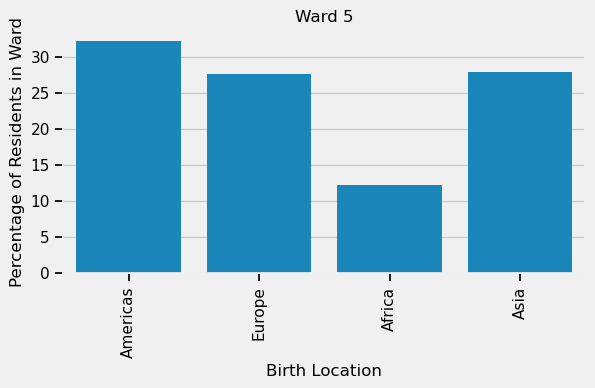

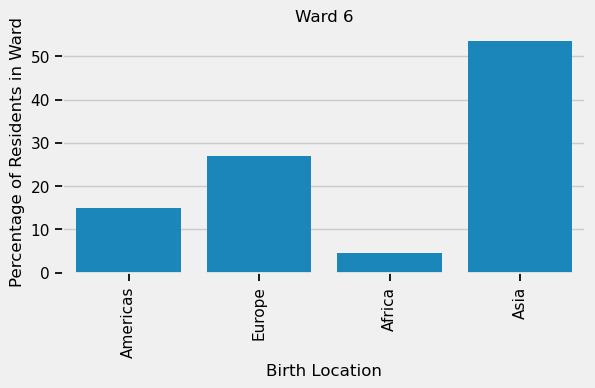

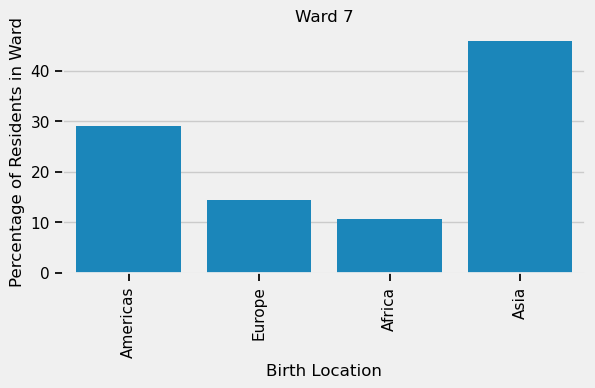

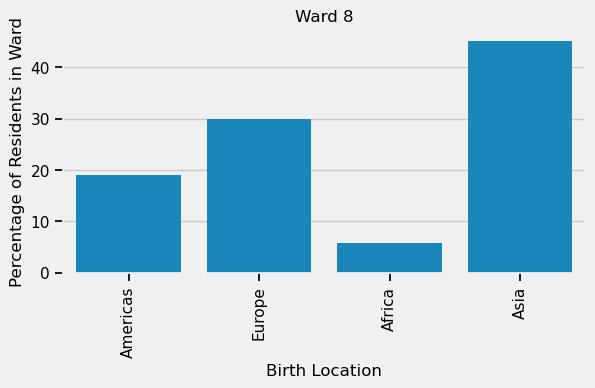

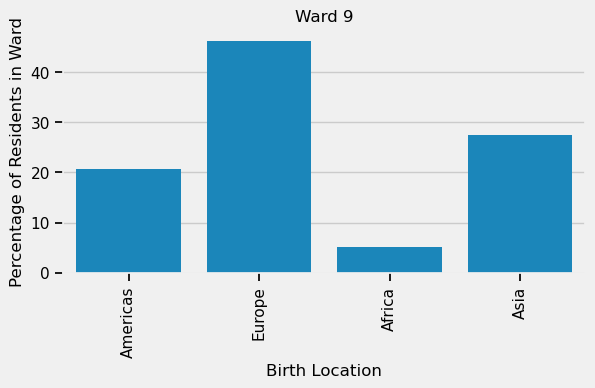

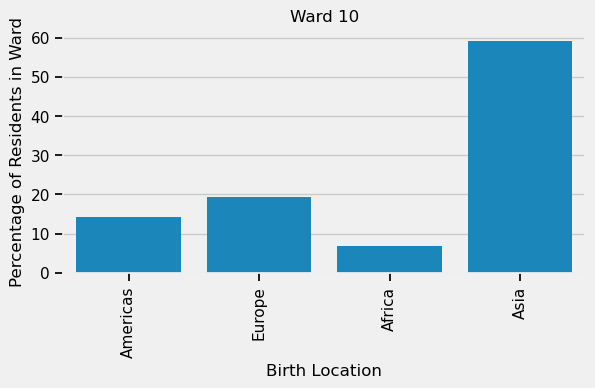

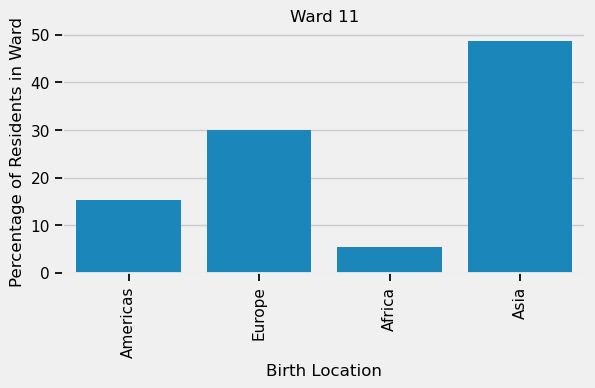

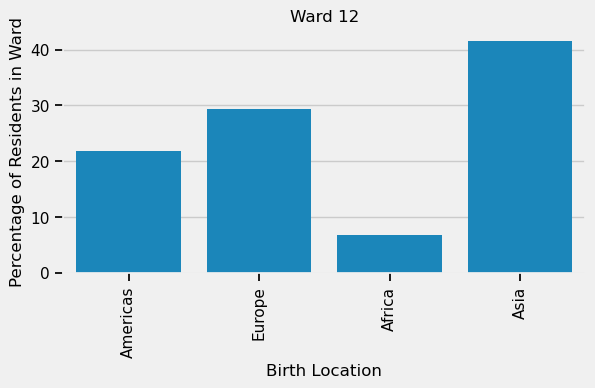

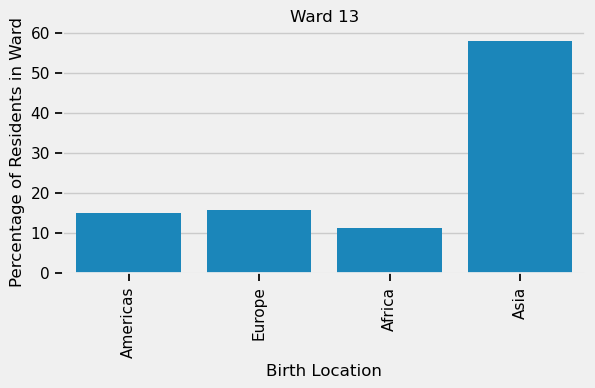

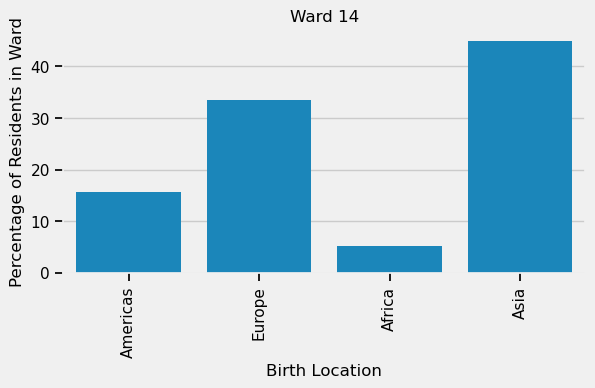

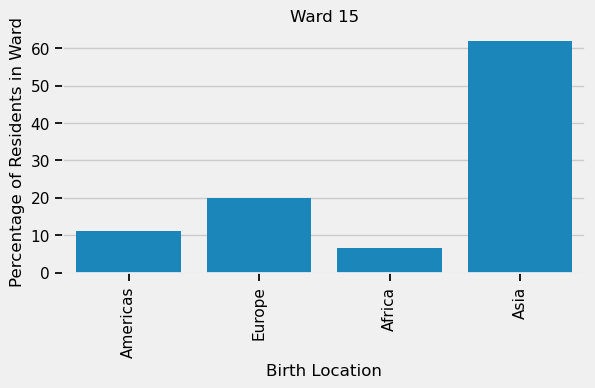

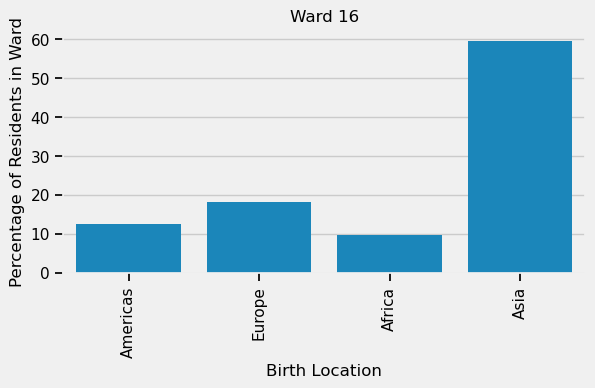

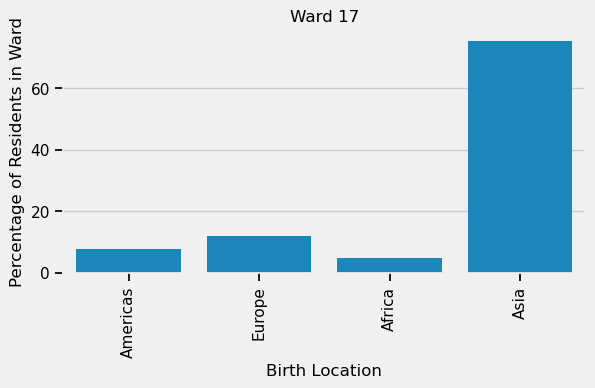

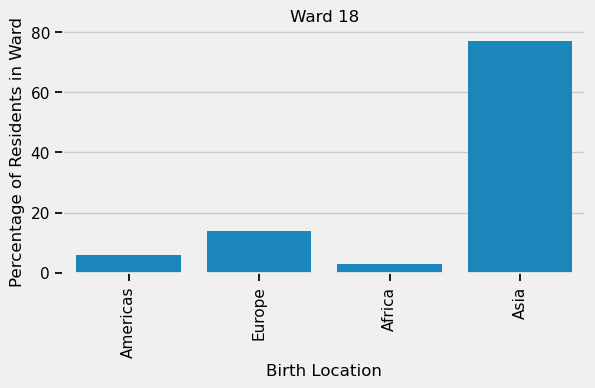

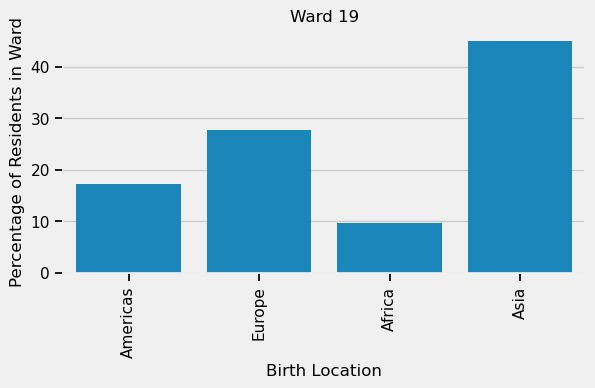

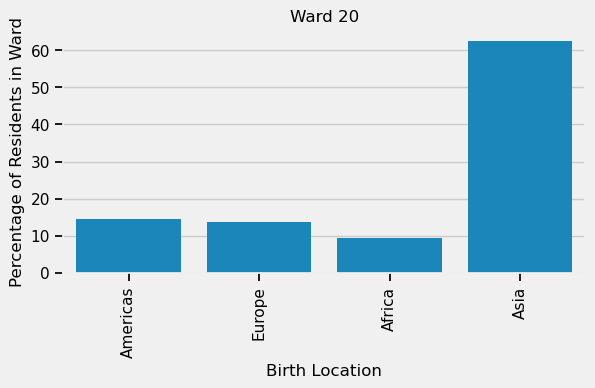

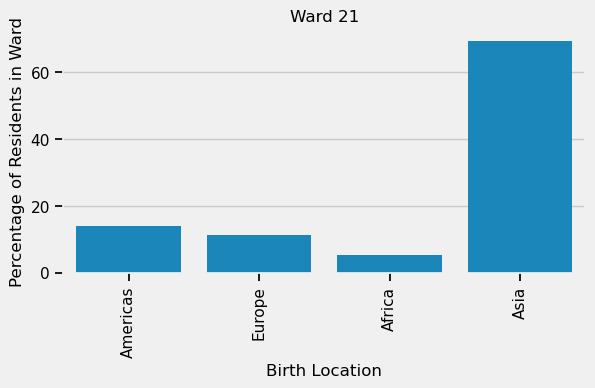

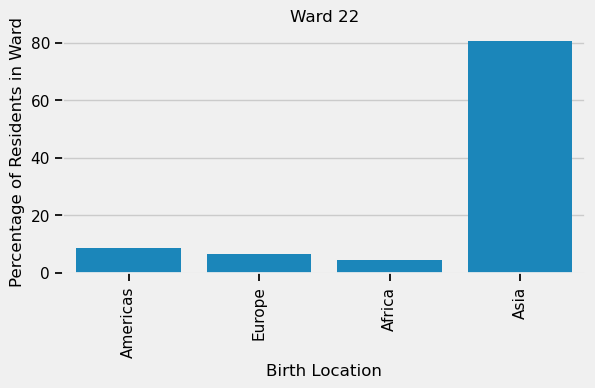

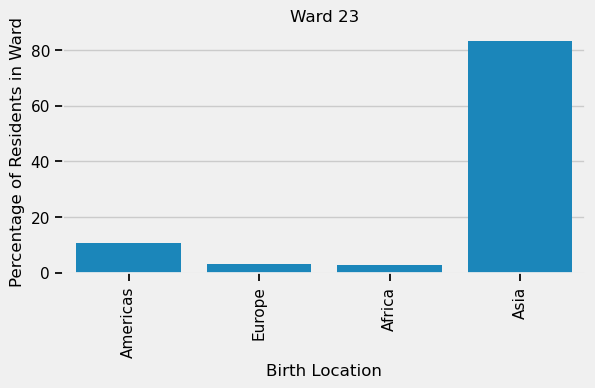

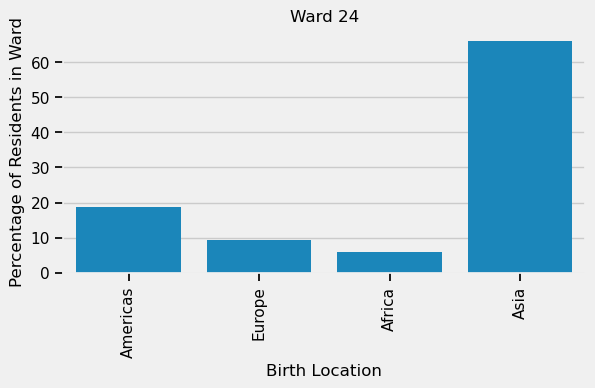

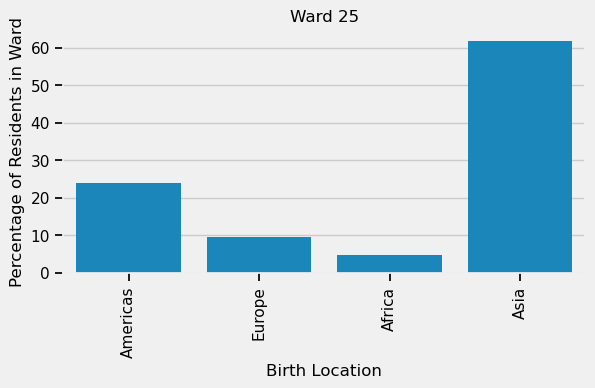

In [22]:
for ward in birth_location_df.index:
    # Extract data from each row
    birth_location_data = birth_location_df.loc[ward]

    # Plot the age distribution
    plt.figure(figsize=(6, 3)) 
    sns.barplot(data = birth_location_data)

    plt.title(ward)
    plt.xlabel('Birth Location')
    plt.ylabel("Percentage of Residents in Ward")
    plt.xticks(rotation=90)
    plt.show

### Education Level in Ward

In [24]:
education_df = combined_df[combined_df['Subcategory'] == 'Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data']
education_df['Grouping'] = education_df['Grouping'].str.strip()
education_df = education_df.transpose()
education_df.columns = education_df.loc['Grouping']
education_df.drop(['Category', 'Subcategory', 'Grouping'], axis = 0, inplace = True)
education_df = education_df.apply(lambda row: (row / row[0])*100, axis=1)
education_df["Bachelor’s degree or higher"] = education_df["Bachelor's degree"] + education_df["University certificate or diploma above bachelor level"]
education_df["Master's, Doctorate, Medical Degree"] = education_df['Degree in medicine, dentistry, veterinary medicine or optometry'] + education_df["Master's degree"] + education_df['Earned doctorate']
education_df = education_df[["No certificate, diploma or degree", "High (secondary) school diploma or equivalency certificate", 
                             "Postsecondary certificate, diploma or degree", "Bachelor’s degree or higher", "Master's, Doctorate, Medical Degree"]]
education_df

Grouping  No certificate, diploma or degree  \
Toronto                           14.277003   
Ward 1                            22.635065   
Ward 2                            12.967968   
Ward 3                            10.678413   
Ward 4                            10.590858   
Ward 5                            25.883442   
Ward 6                            16.013072   
Ward 7                            27.766959   
Ward 8                            12.584892   
Ward 9                            20.588235   
Ward 10                            5.197019   
Ward 11                            7.757375   
Ward 12                            8.178069   
Ward 13                            7.739837   
Ward 14                           14.139414   
Ward 15                            9.716333   
Ward 16                           14.633229   
Ward 17                            9.723139   
Ward 18                            7.584744   
Ward 19                           12.742860   
Ward 20                           16.831576   
Ward 21                           17.765210   
Ward 22                           18.580595   
Ward 23                           21.692926   
Ward 24                           17.264548   
Ward 25                           14.836023   

Grouping  High (secondary) school diploma or equivalency certificate  \
Toronto                                           23.364242            
Ward 1                                            29.786794            
Ward 2                                            25.055055            
Ward 3                                            20.924584            
Ward 4                                            19.353400            
Ward 5                                            29.833856            
Ward 6                                            25.876906            
Ward 7                                            31.137077            
Ward 8                                            21.805454            
Ward 9                                            21.690494            
Ward 10                                           13.561405            
Ward 11                                           17.179721            
Ward 12                                           17.474040            
Ward 13                                           19.484321            
Ward 14                                           20.510354            
Ward 15                                           19.349059            
Ward 16                                           25.272727            
Ward 17                                           20.370841            
Ward 18                                           19.706833            
Ward 19                                           22.429438            
Ward 20                                           27.682940            
Ward 21                                           29.066018            
Ward 22                                           26.767342            
Ward 23                                           29.175162            
Ward 24                                           28.149100            
Ward 25                                           28.989531            

Grouping  Postsecondary certificate, diploma or degree  \
Toronto                                      62.358754   
Ward 1                                       47.572966   
Ward 2                                       61.981982   
Ward 3                                       68.401120   
Ward 4                                       70.061315   
Ward 5                                       44.282702   
Ward 6                                       58.110022   
Ward 7                                       41.101374   
Ward 8                                       65.604430   
Ward 9                                       57.726727   
Ward 10                                      81.241576   
Ward 11                                      75.068258   
Ward 12                        

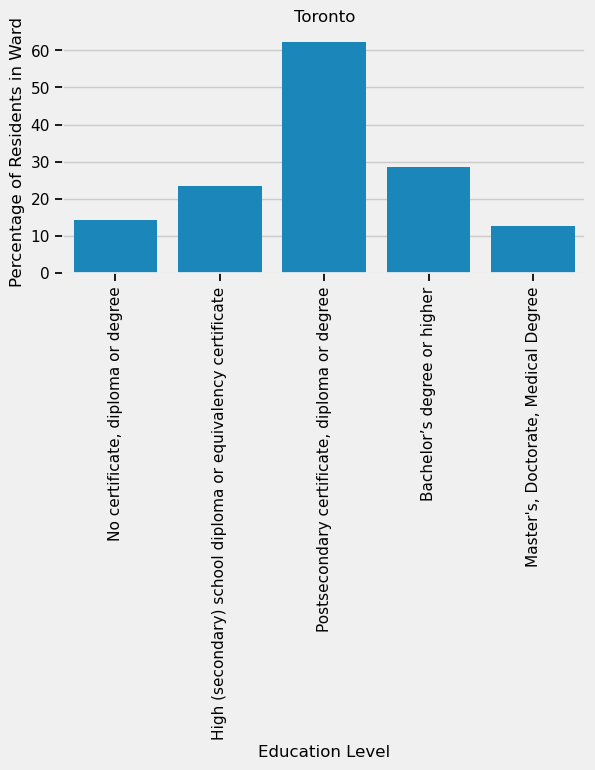

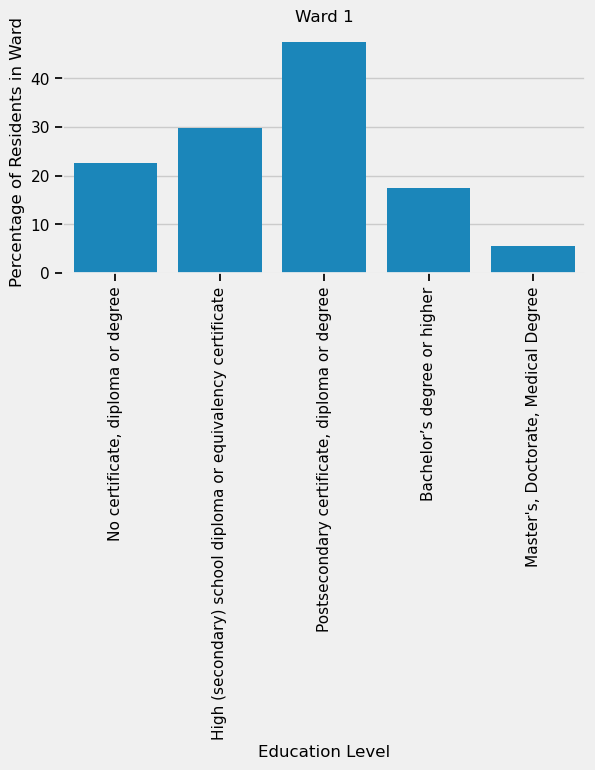

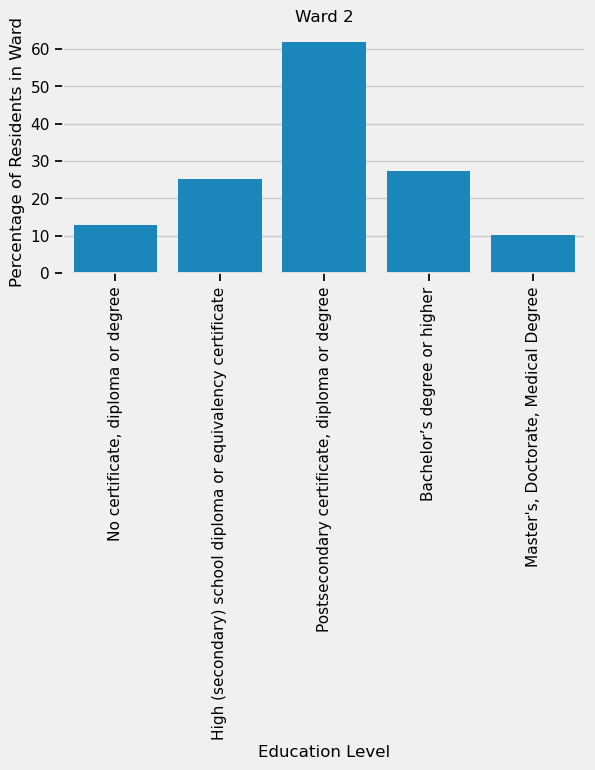

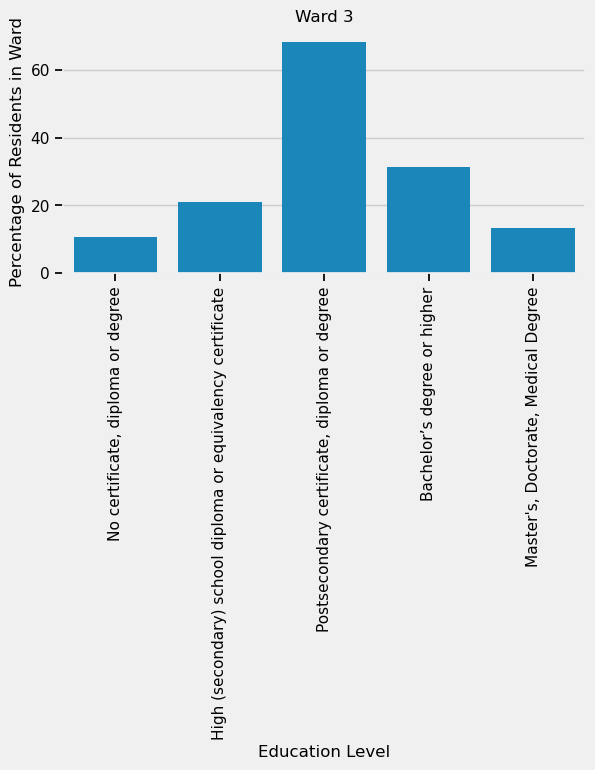

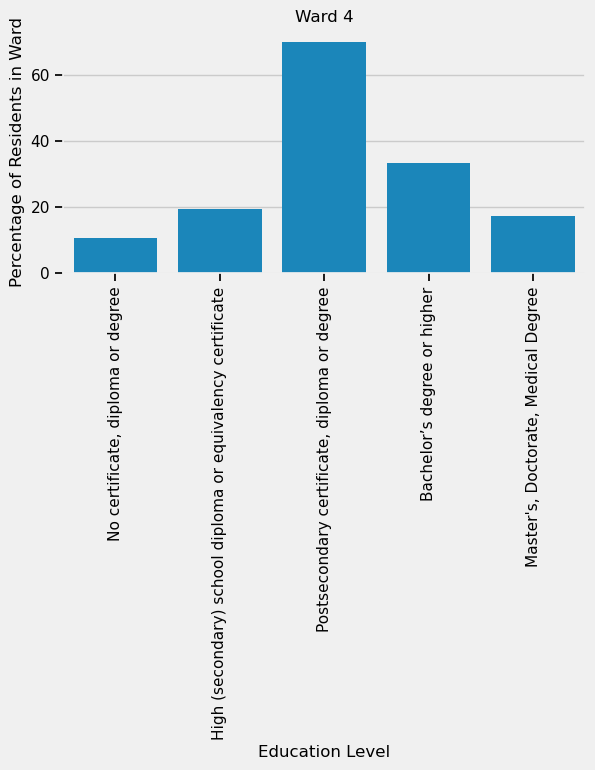

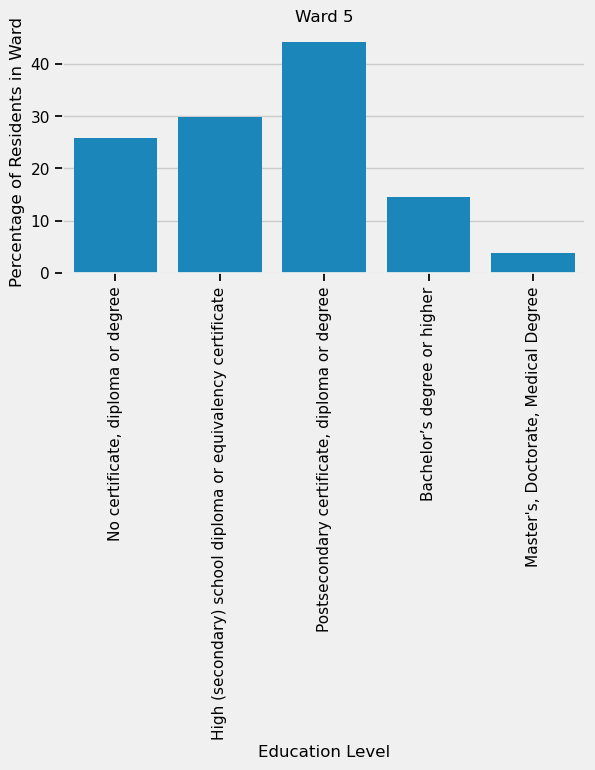

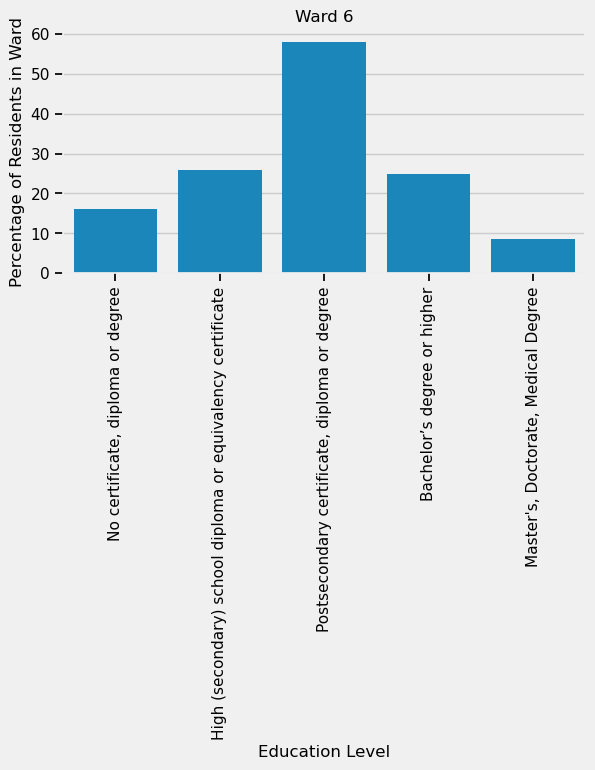

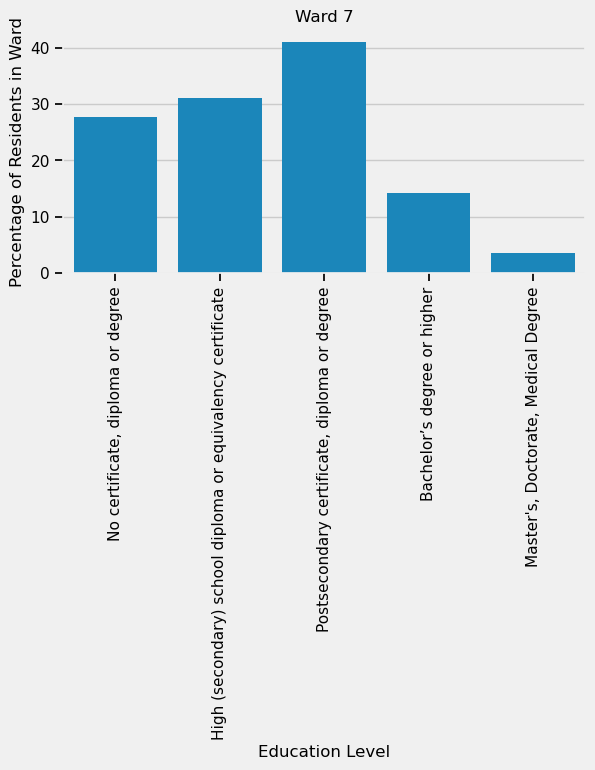

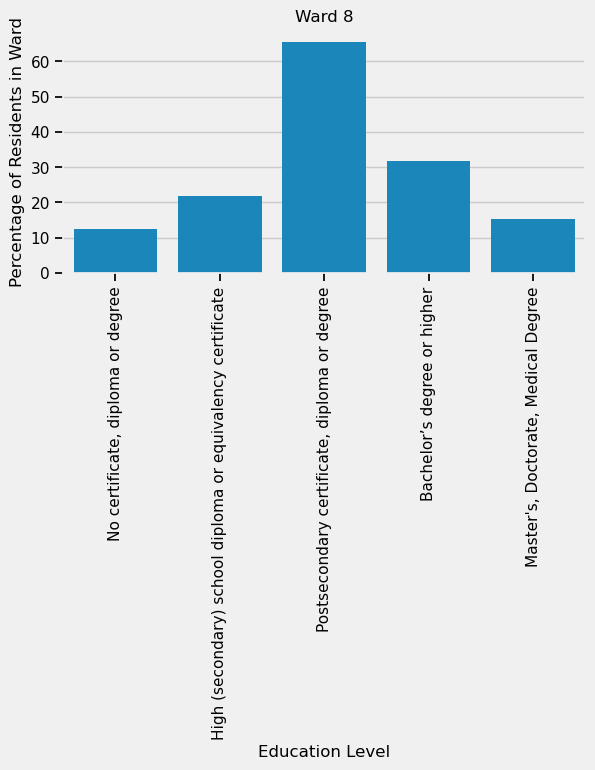

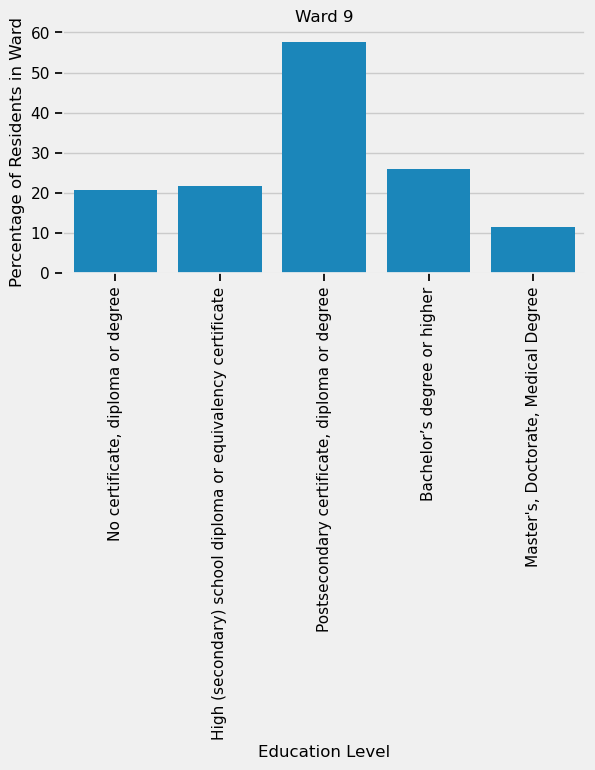

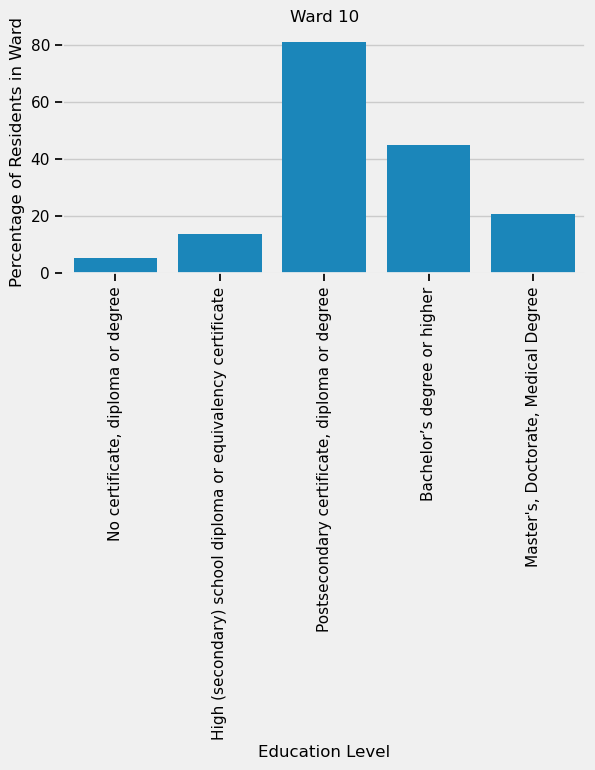

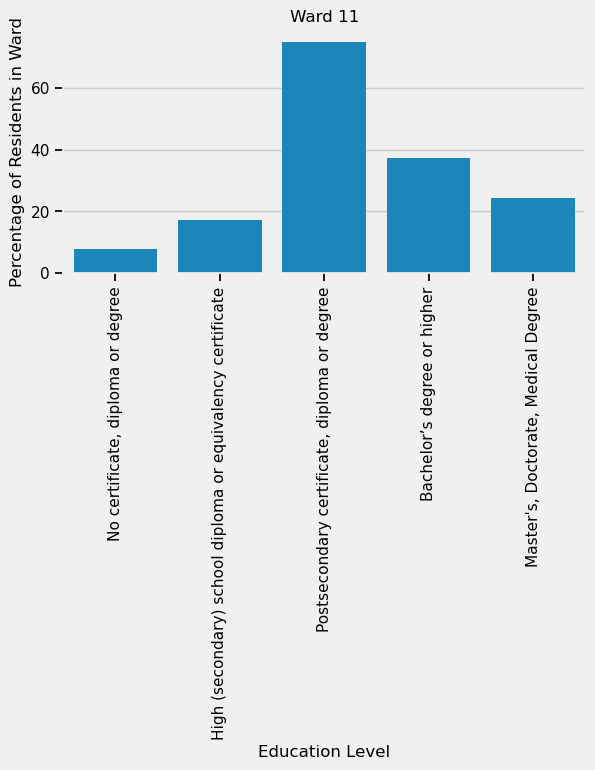

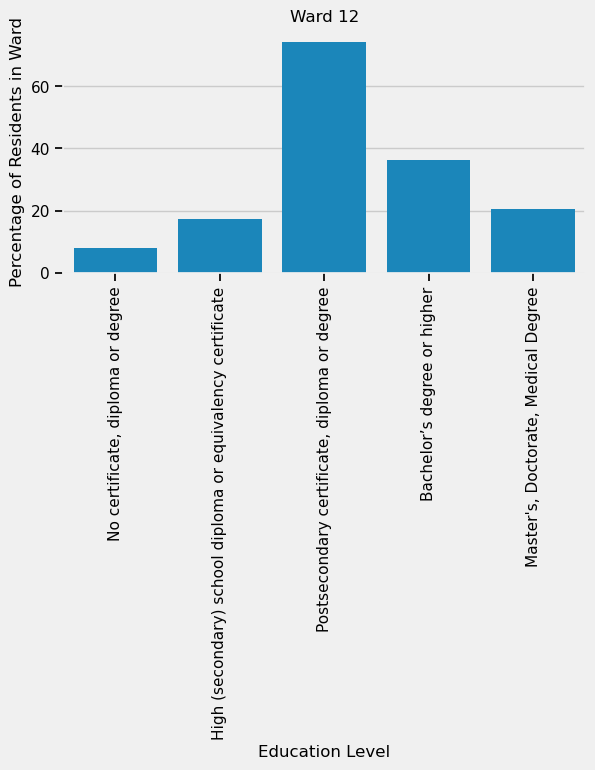

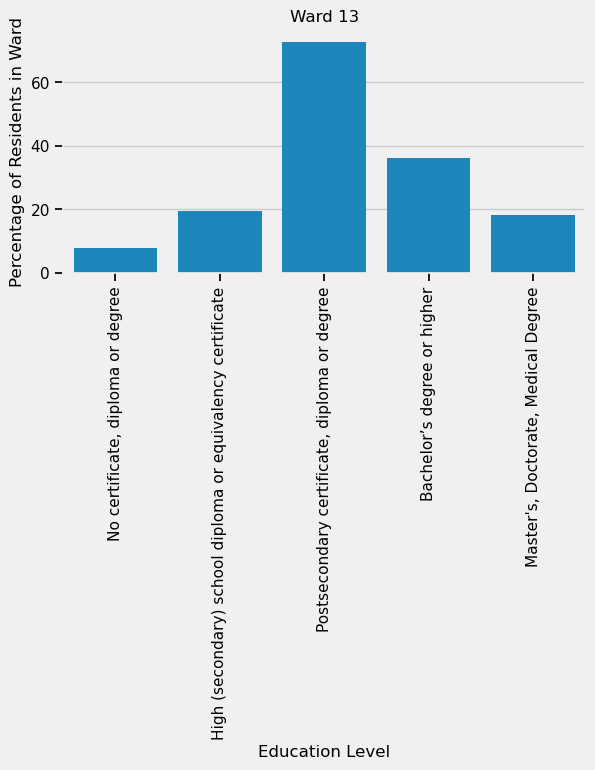

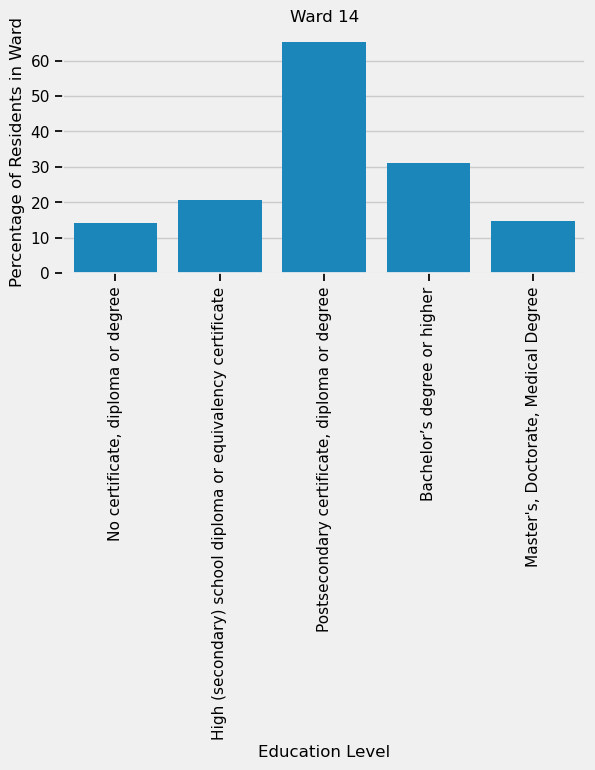

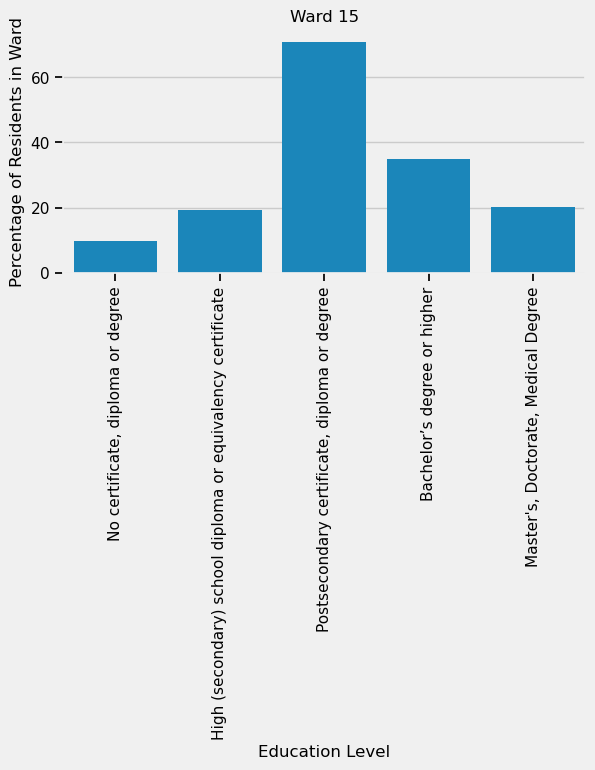

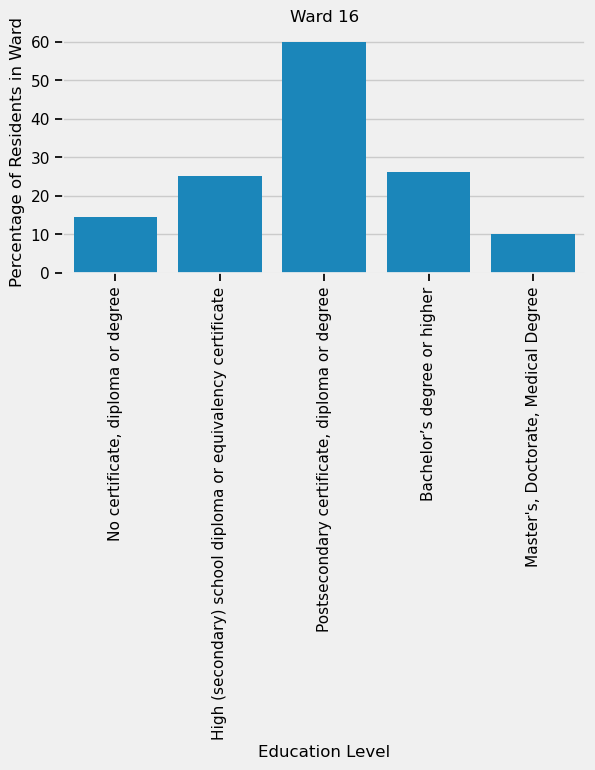

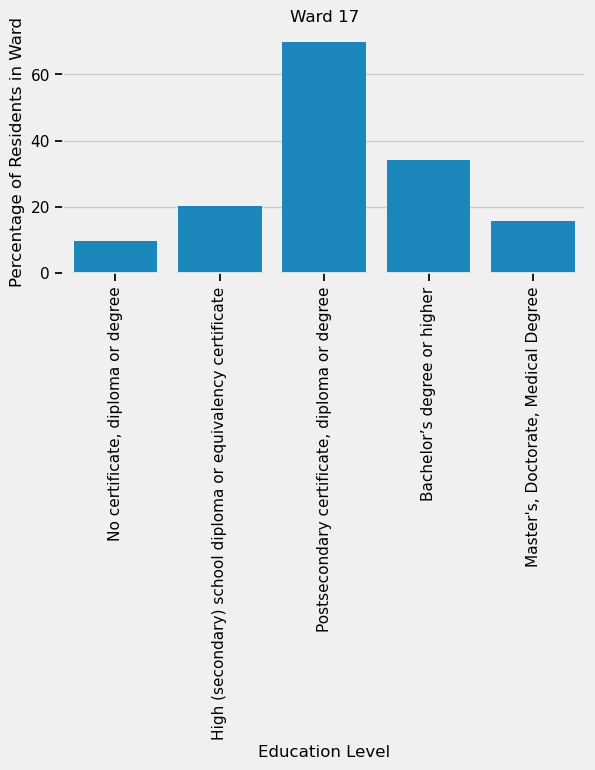

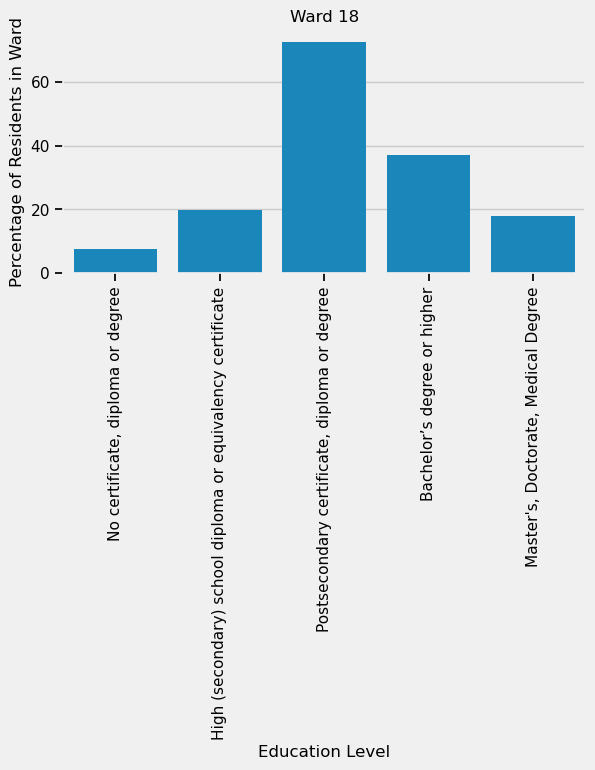

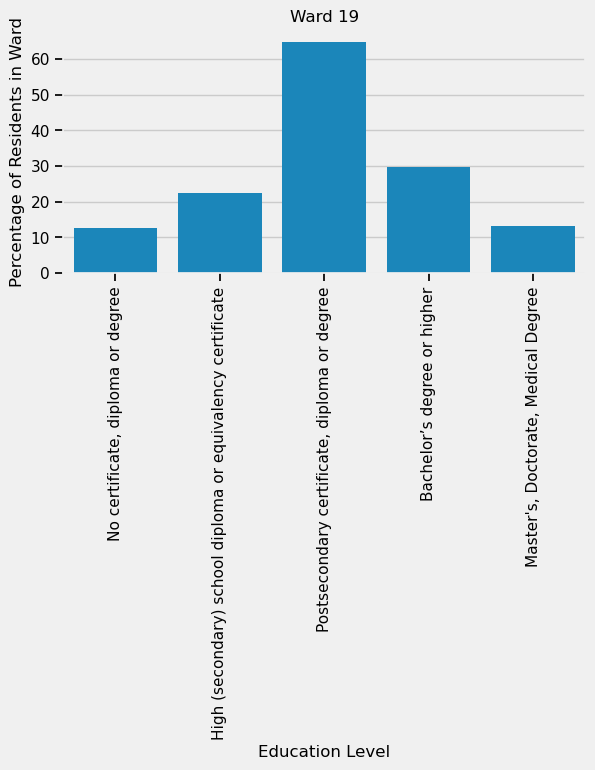

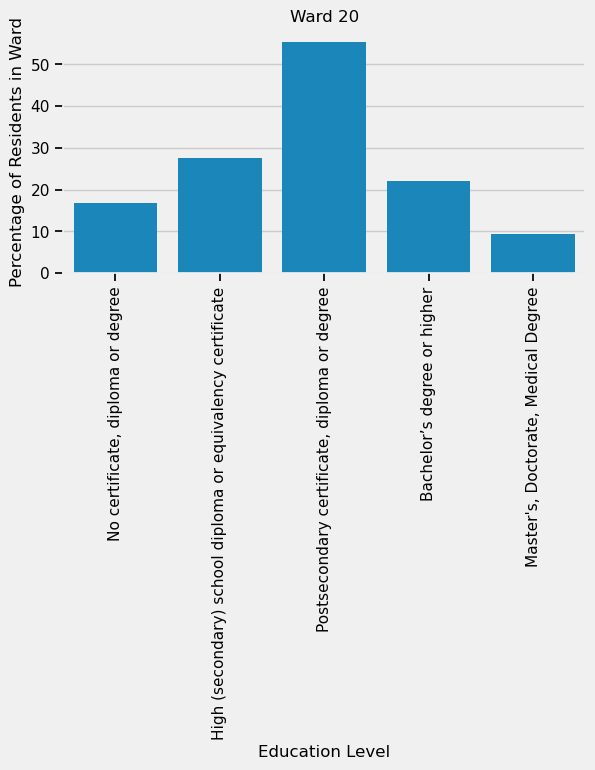

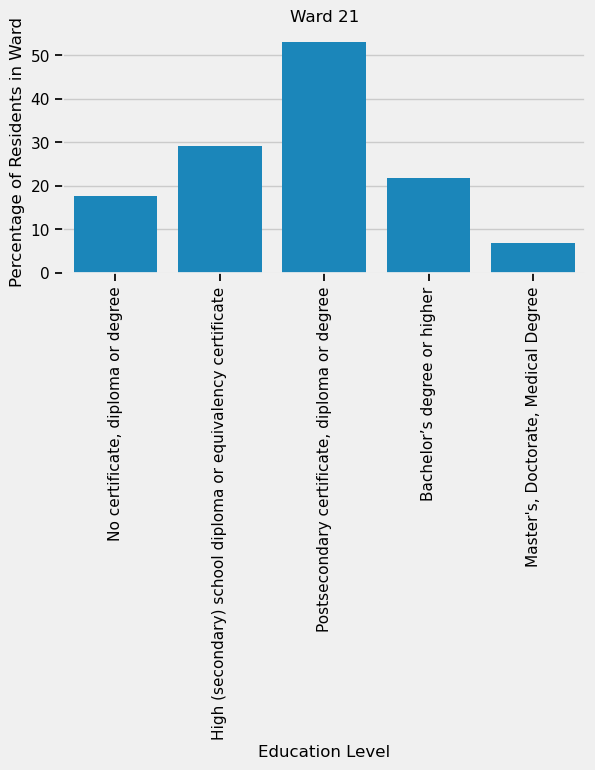

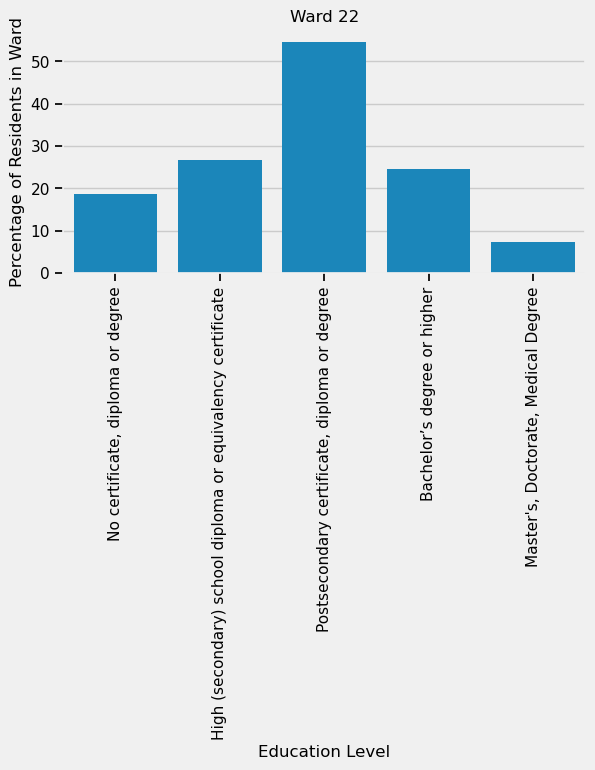

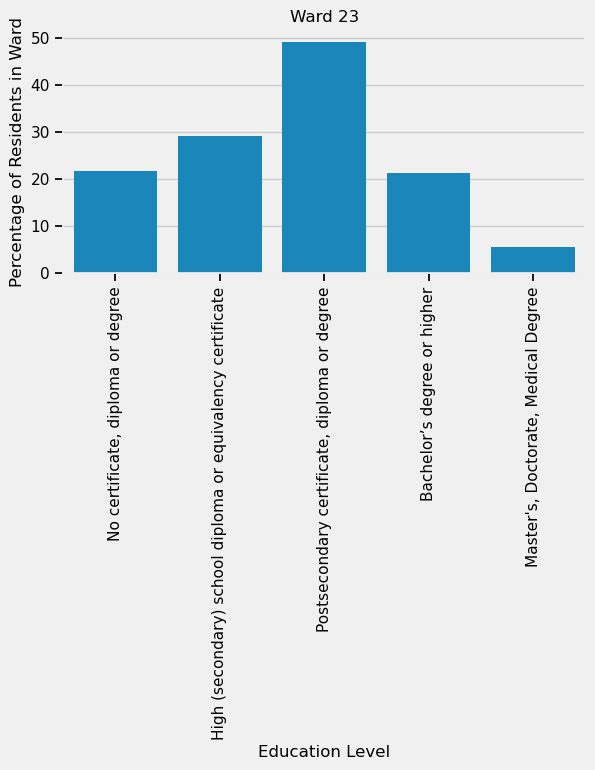

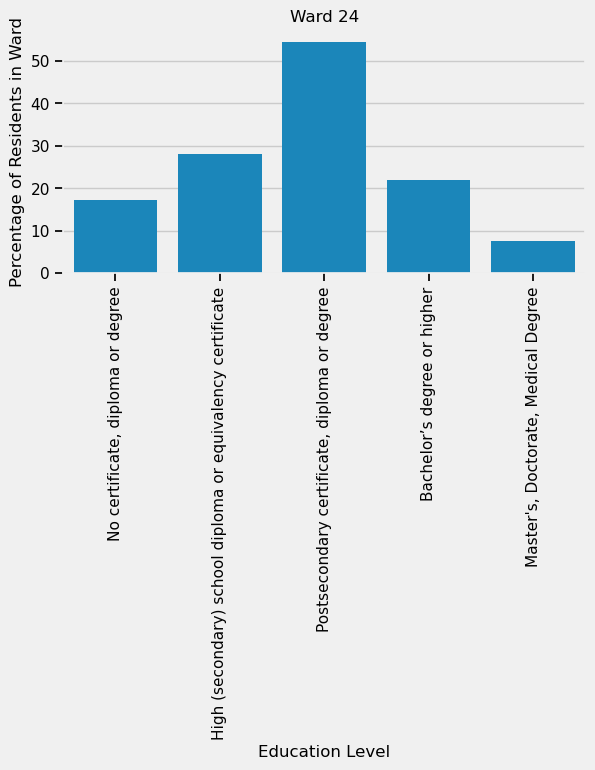

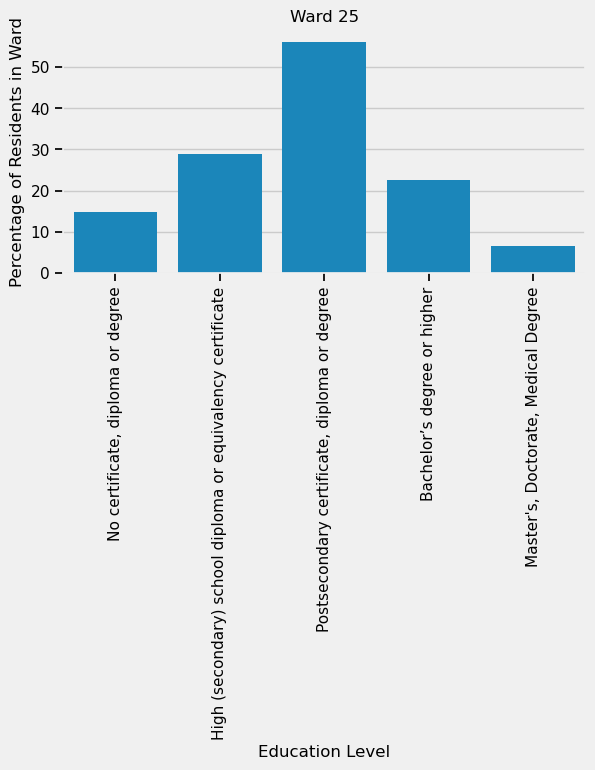

In [25]:
for ward in education_df.index:
    # Extract data from each row
    education_data = education_df.loc[ward]

    # Plot the age distribution
    plt.figure(figsize=(6, 3)) 
    sns.barplot(data = education_data)

    plt.title(ward)
    plt.xlabel('Education Level')
    plt.ylabel("Percentage of Residents in Ward")
    plt.xticks(rotation=90)
    plt.show

### Place of Work in Ward

Note: Can use unemployment percentatage in final model, already calculated in excel sheet

In [28]:
labour_df = combined_df[combined_df['Subcategory'] == 'Total - Place of work status for the employed labour force aged 15 years and over in private households - 25% sample data']
labour_df = labour_df.transpose()
labour_df.columns = labour_df.loc['Grouping']
labour_df.drop(['Category', 'Subcategory', 'Grouping'], axis = 0, inplace = True)
labour_df = labour_df.apply(lambda row: (row / row[0])*100, axis=1)
labour_df = labour_df.drop(columns = ['Total - Place of work status for the employed labour force aged 15 years and over in private households - 25% sample data', 
                                     '  Worked outside Canada'], axis = 1)
labour_df

Grouping  Worked at home  No fixed workplace address  Worked at usual place
Toronto        39.005894                   10.877526              49.627707
Ward 1         17.589883                   17.265886              64.799331
Ward 2         35.500468                   12.329280              51.618335
Ward 3         41.437748                   10.632773              47.437474
Ward 4         49.423605                    8.362306              41.957914
Ward 5         19.964591                   20.714434              59.112685
Ward 6         25.248369                   13.176116              61.214250
Ward 7         14.145001                   18.417134              67.151529
Ward 8         40.087288                    8.914477              50.506082
Ward 9         42.465503                   13.743946              43.543818
Ward 10        62.536761                    5.397016              31.423592
Ward 11        55.037144                    5.979344              38.276862
Ward 12        51.157294                    6.797066              41.597392
Ward 13        51.585872                    6.758556              41.107369
Ward 14        51.120435                    8.028988              40.526366
Ward 15        47.976190                    7.824675              43.268398
Ward 16        33.394902                   12.646226              53.367812
Ward 17        41.020904                    9.820126              48.245017
Ward 18        43.687605                    8.834703              46.426363
Ward 19        45.812133                    9.481409              44.432485
Ward 20        28.639722                   13.950456              57.073012
Ward 21        24.549883                   13.556450              61.533573
Ward 22        29.154060                   12.295776              58.029771
Ward 23        24.228375                   13.101073              62.100941
Ward 24        24.224714                   13.299141              62.106393
Ward 25        27.986425                   11.708145              60.022624

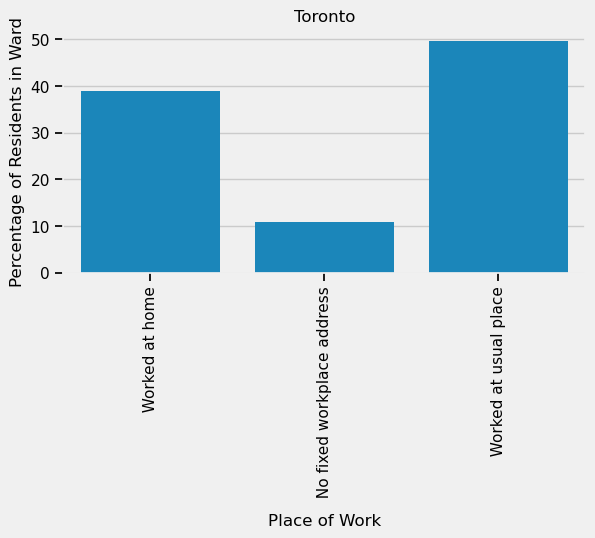

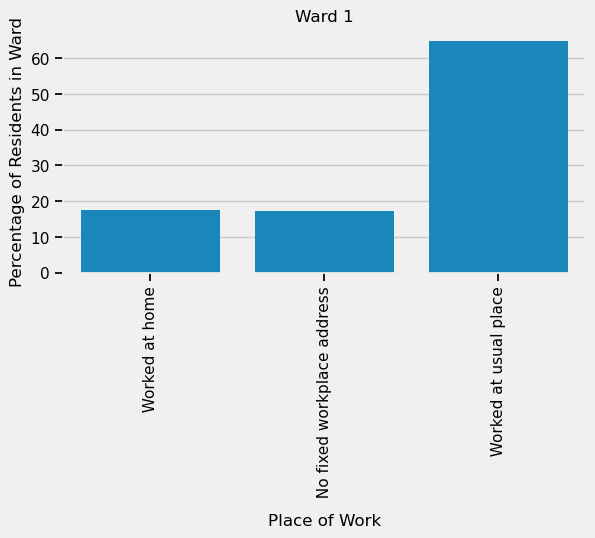

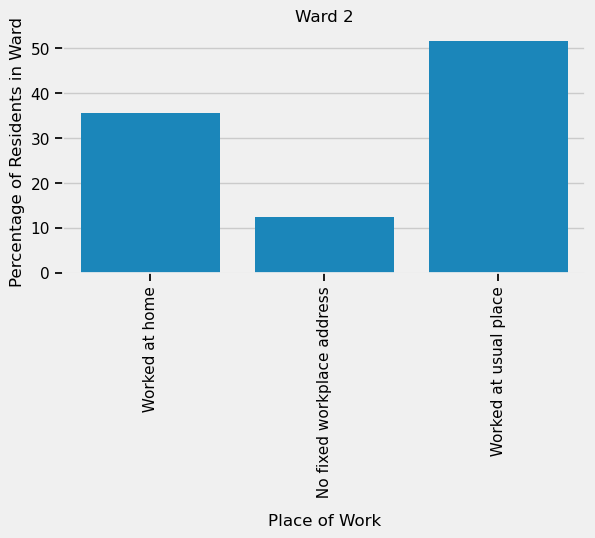

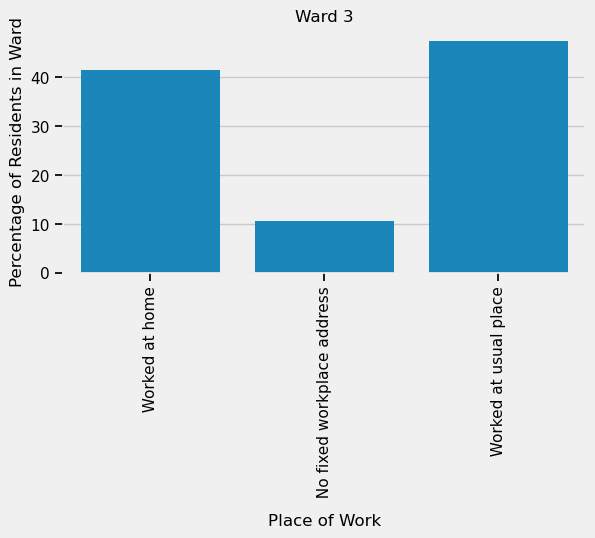

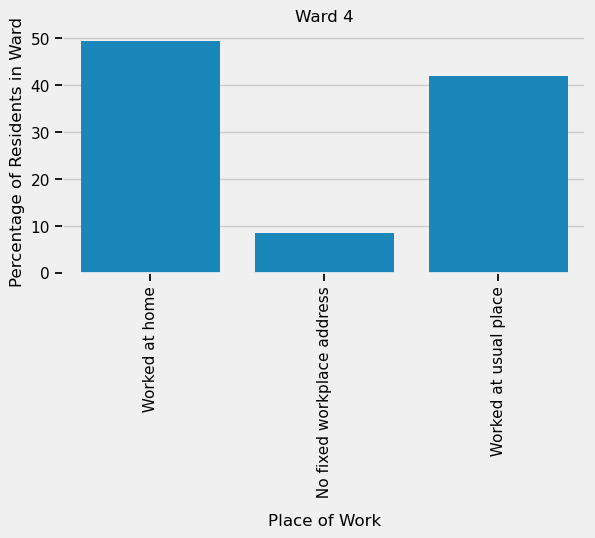

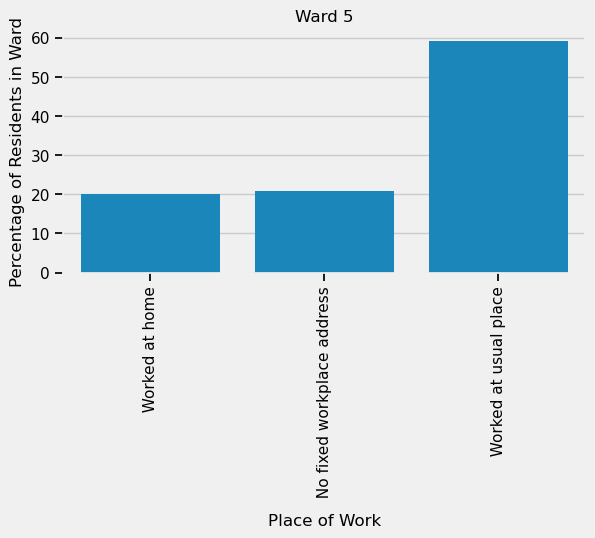

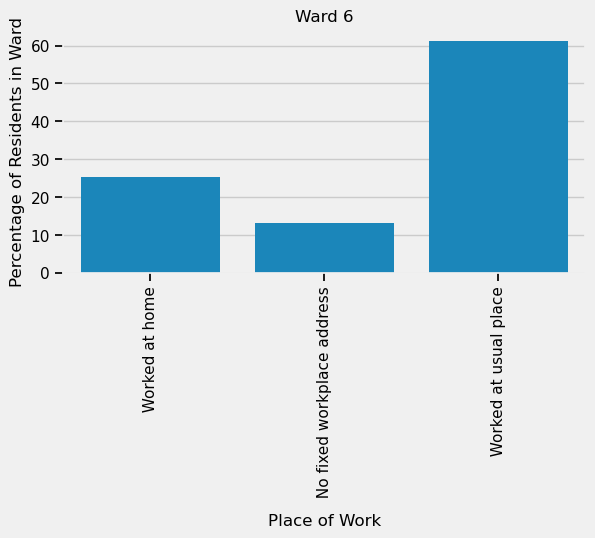

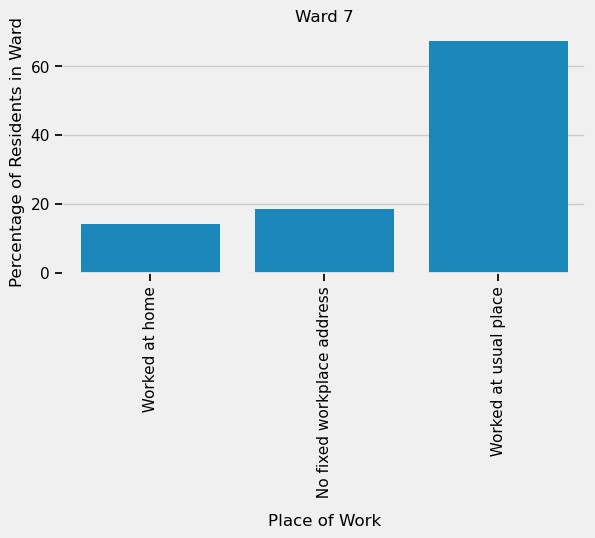

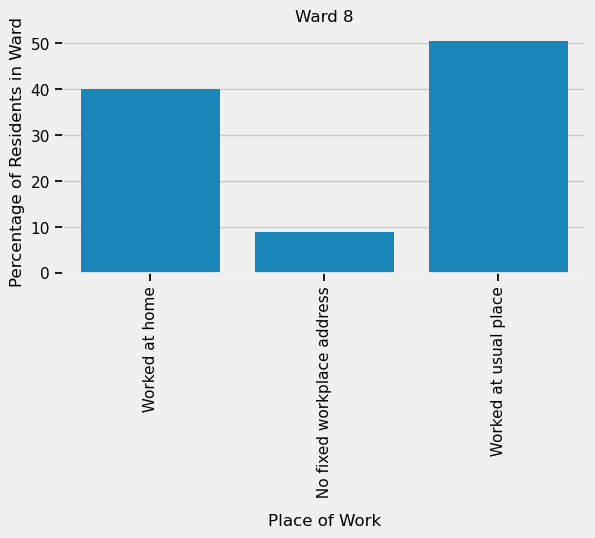

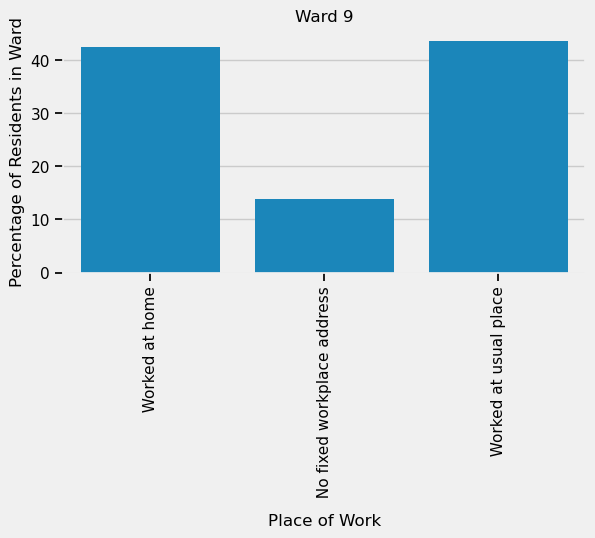

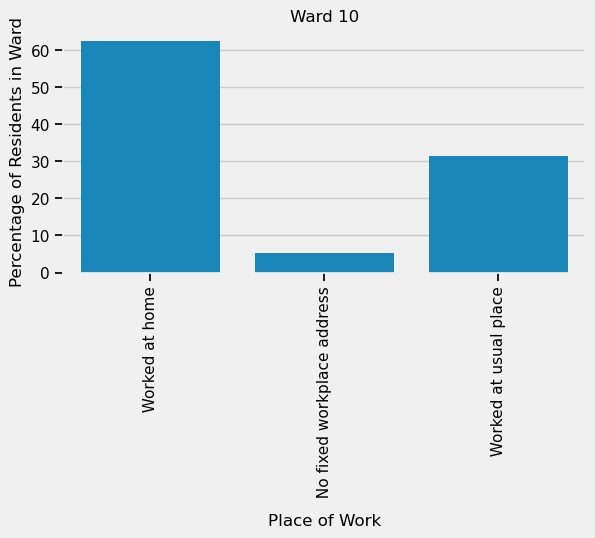

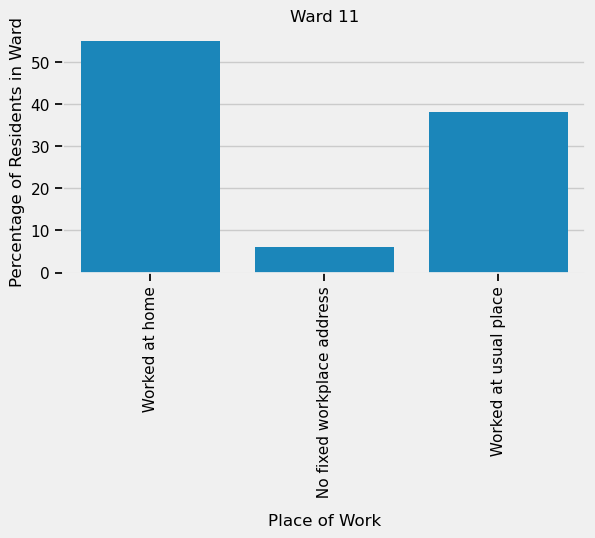

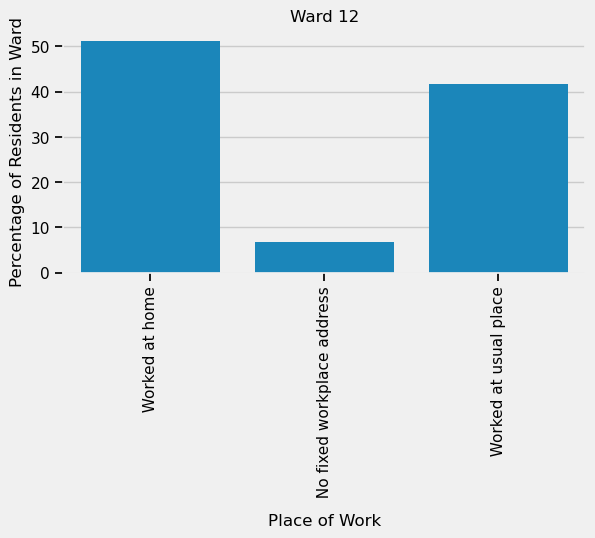

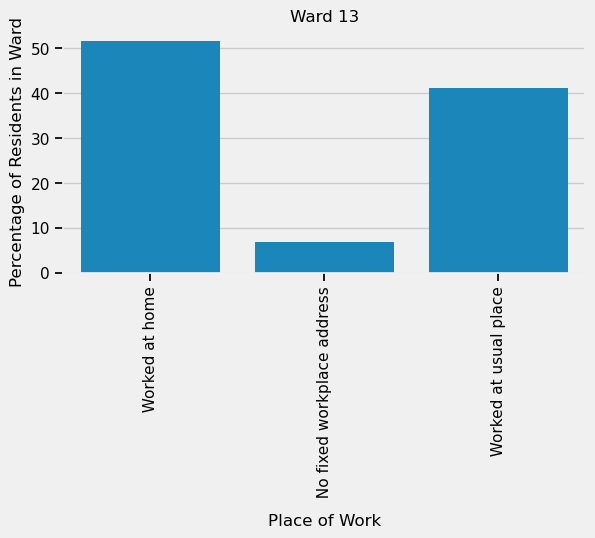

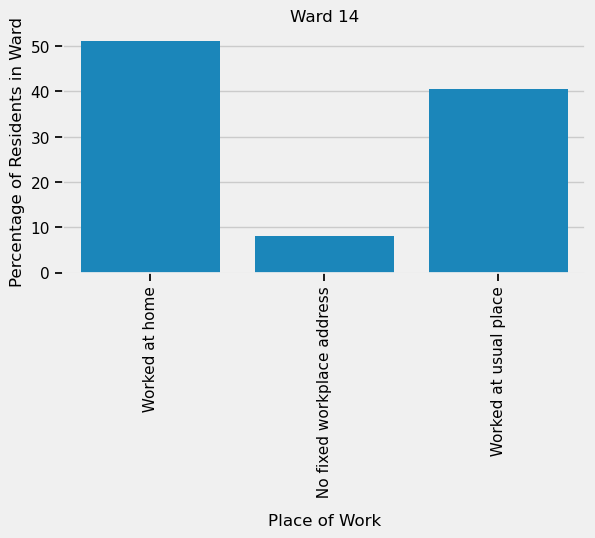

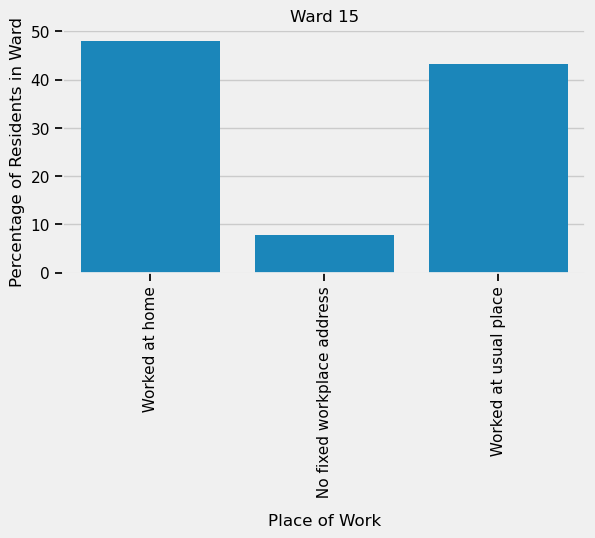

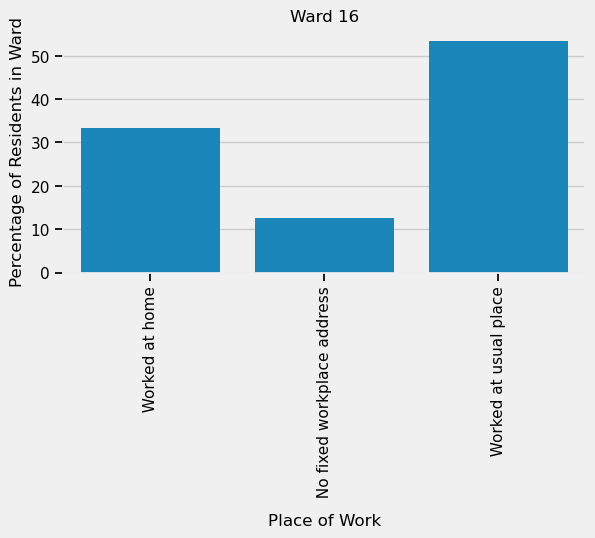

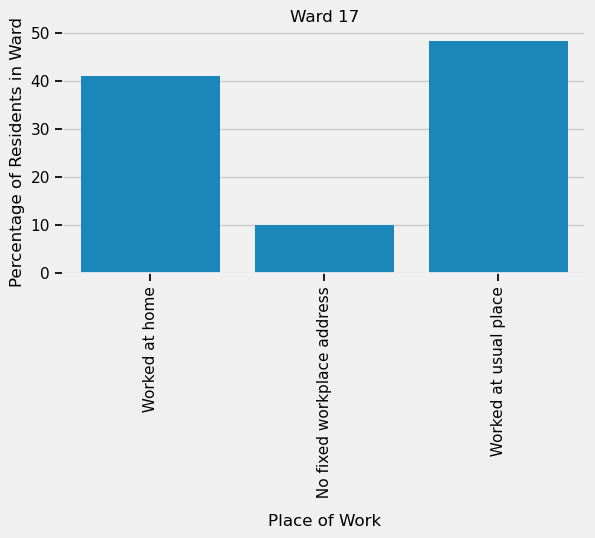

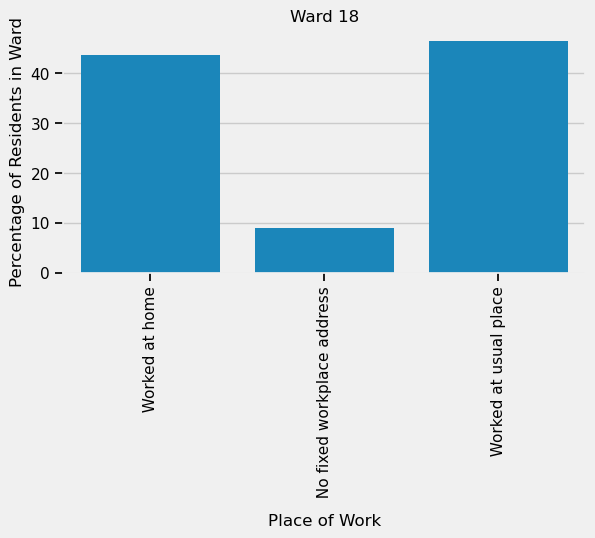

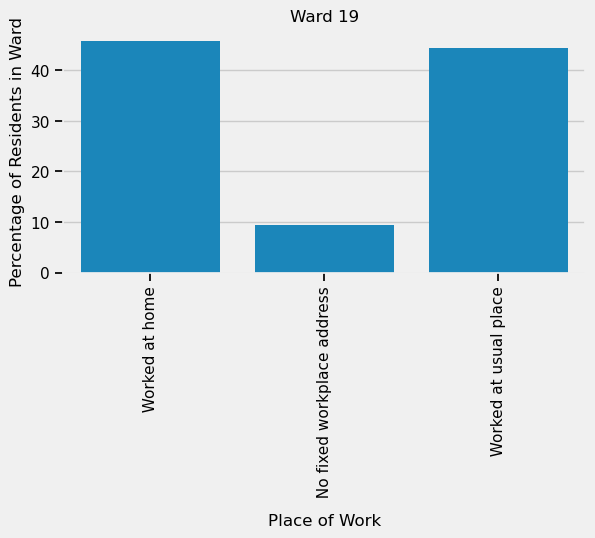

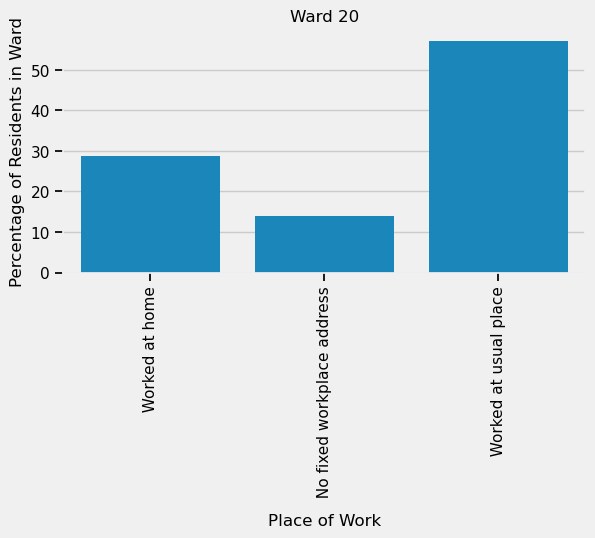

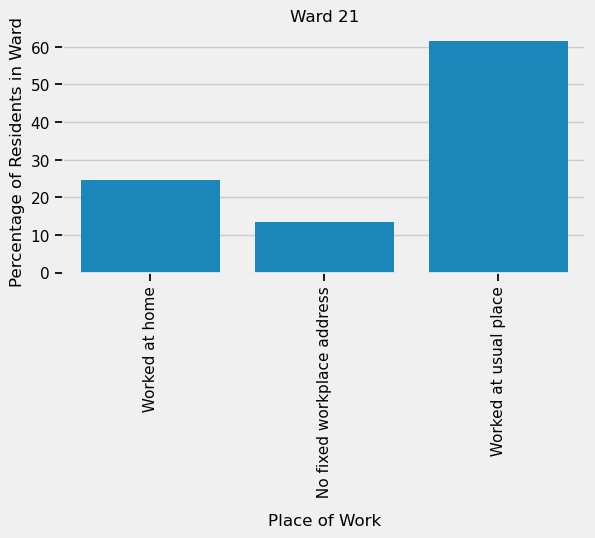

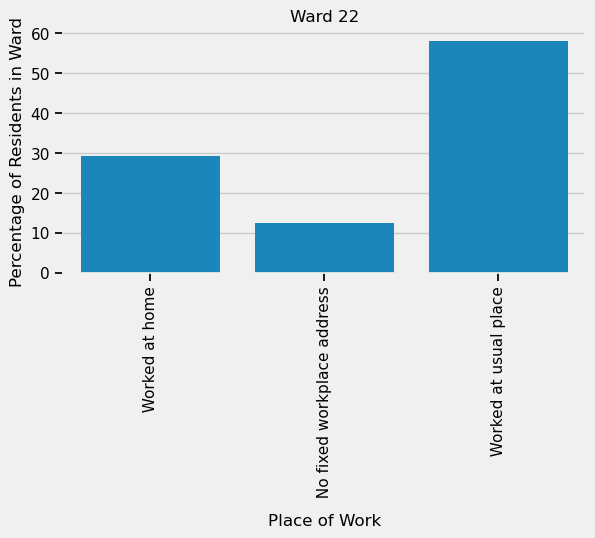

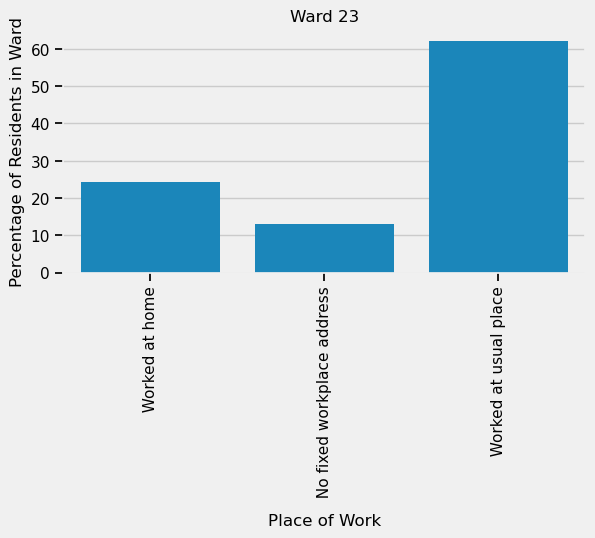

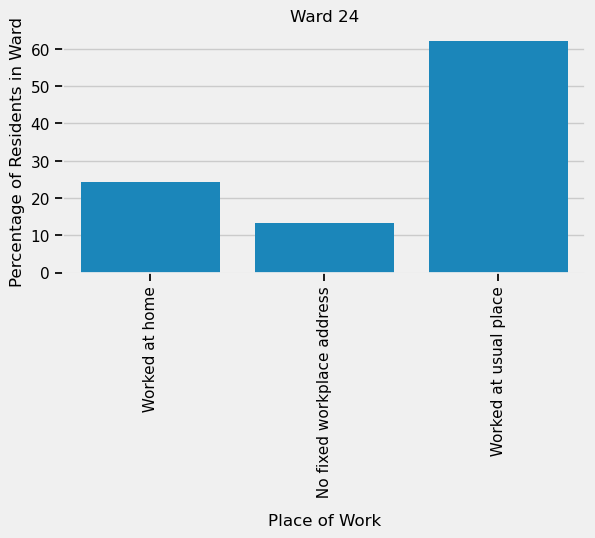

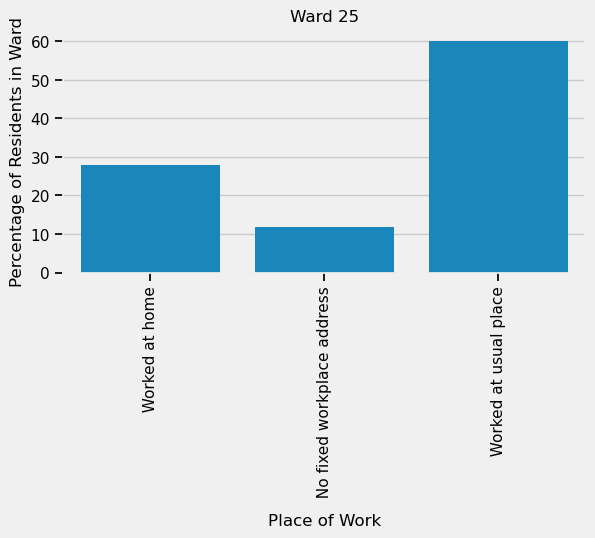

In [29]:
for ward in labour_df.index:
    # Extract data from each row
    labour_data = labour_df.loc[ward]

    # Plot the age distribution
    plt.figure(figsize=(6, 3)) 
    sns.barplot(data = labour_data)

    plt.title(ward)
    plt.xlabel('Place of Work')
    plt.ylabel("Percentage of Residents in Ward")
    plt.xticks(rotation=90)
    plt.show

### Income Breakdown in Ward

In [31]:
average_income_df = combined_df[((combined_df['Grouping'] == '  Average total income of households in 2020 ($)') &
                                (combined_df['Subcategory'] == 'Total - Income statistics in 2020 for private households by household size - 25% sample data'))]
average_income_df = average_income_df.transpose()
average_income_df.columns = average_income_df.loc['Grouping']
average_income_df.drop(['Category', 'Subcategory', 'Grouping'], axis = 0, inplace = True)
average_income_df = average_income_df.sort_values(by = '  Average total income of households in 2020 ($)', ascending = True)
average_income_df

Grouping Average total income of households in 2020 ($)
Ward 7                                            85700
Ward 5                                            88700
Ward 13                                           89400
Ward 21                                           91500
Ward 24                                           92700
Ward 22                                           93000
Ward 1                                            95200
Ward 23                                          100000
Ward 16                                          100300
Ward 20                                          102200
Ward 17                                          103800
Ward 18                                          106300
Ward 9                                           107300
Ward 6                                           107500
Ward 10                                          118200
Toronto                                          121200
Ward 25                                          121800
Ward 4                                           127200
Ward 3                                           127200
Ward 19                                          130600
Ward 14                                          130800
Ward 2                                           146600
Ward 12                                          160400
Ward 11                                          174800
Ward 8                                           176400
Ward 15                                          224800

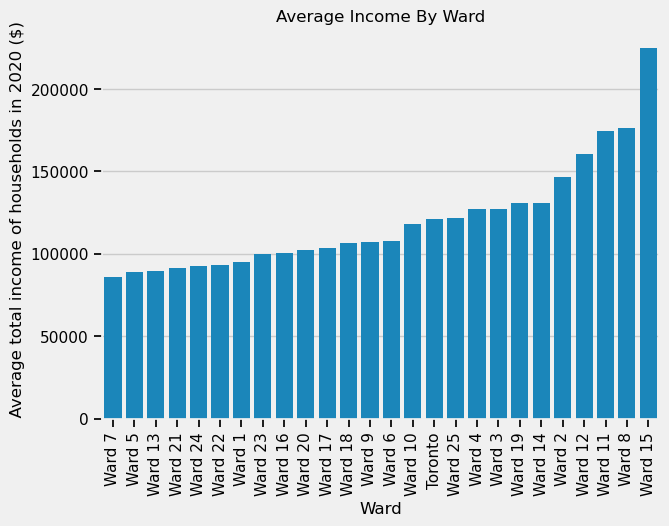

In [32]:
sns.barplot(x = average_income_df.index, y = average_income_df['  Average total income of households in 2020 ($)'])

plt.title("Average Income By Ward")
plt.xlabel("Ward")
plt.xticks(rotation=90)
plt.show()

In [33]:
#https://www.springfinancial.ca/blog/lifestyle/middle-class-income-in-canada-by-province

class_df = combined_df[combined_df['Subcategory'] == 'Total - Total income groups in 2020 for the population aged 15 years and over in private households - 25% sample data']
class_df['Grouping'] = class_df['Grouping'].str.strip()
class_df = class_df.transpose()
class_df.columns = class_df.loc['Grouping']
class_df.drop(['Category', 'Subcategory', 'Grouping'], axis = 0, inplace = True)

class_df['Lower Class'] = (class_df['Under $10,000 (including loss)'] + class_df['$10,000 to $19,999'] + class_df['$20,000 to $29,999'] +
                          class_df['$30,000 to $39,999'] + class_df['$40,000 to $49,999'])

class_df['Middle Class'] = (class_df['$50,000 to $59,999'] + class_df['$60,000 to $69,999'] + class_df['$70,000 to $79,999'] + 
                           class_df['$80,000 to $89,999'] + class_df['$90,000 to $99,999'])

class_df['Upper Class'] = class_df['$100,000 and over']

class_df = class_df.apply(lambda row: (row / row[0])*100, axis=1)
class_df = class_df[['Lower Class', 'Middle Class', 'Upper Class']]
class_df

Grouping  Lower Class  Middle Class  Upper Class
Toronto     57.885906     24.747629    12.773214
Ward 1      68.822768     21.836999     3.870634
Ward 2      52.737738     27.407407    16.061061
Ward 3      50.370492     28.960151    17.223777
Ward 4      51.067507     25.943475    19.287586
Ward 5      65.469883     23.733347     5.611851
Ward 6      63.213508     24.357298     8.202614
Ward 7      70.947152     20.252069     2.591010
Ward 8      52.648626     23.132379    19.898652
Ward 9      57.336171     26.932940    12.080537
Ward 10     42.234203     32.014588    22.322207
Ward 11     50.318540     24.540928    21.505434
Ward 12     48.102146     27.548688    20.777027
Ward 13     55.995354     25.867596    14.044135
Ward 14     51.886846     24.837341    19.898161
Ward 15     49.202747     21.815467    23.648850
Ward 16     61.316614     24.445141     9.253918
Ward 17     59.422940     25.109215    10.362694
Ward 18     58.353826     23.009788    12.782680
Ward 19     52.641541     25.045928    17.864499
Ward 20     62.453107     23.965639     8.312945
Ward 21     66.444656     23.416852     4.593509
Ward 22     68.206206     21.046518     5.697218
Ward 23     70.801928     19.906092     3.978747
Ward 24     66.586819     22.242346     5.188128
Ward 25     61.081550     26.090226     7.993060

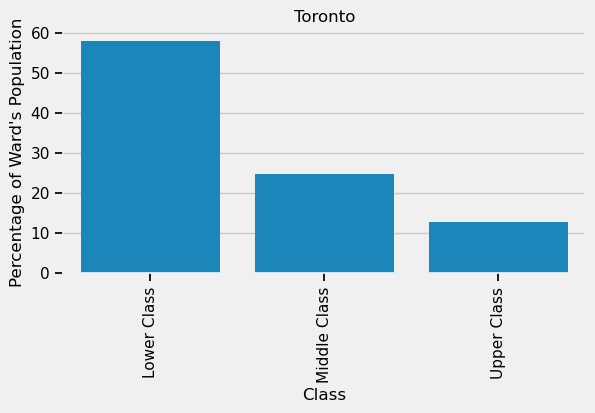

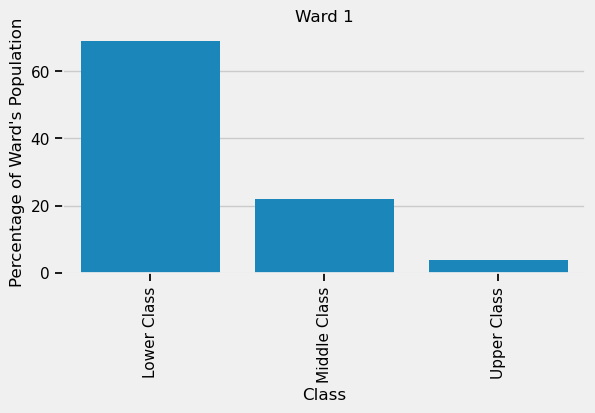

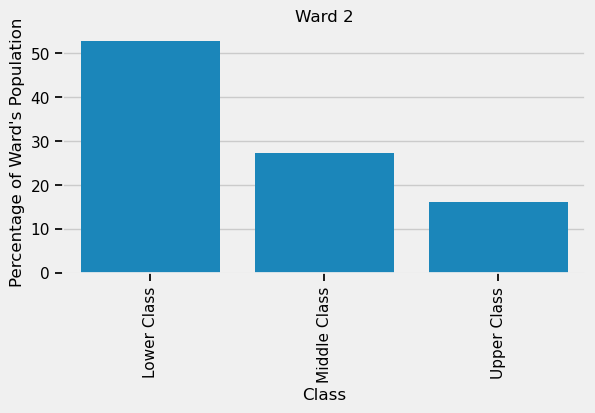

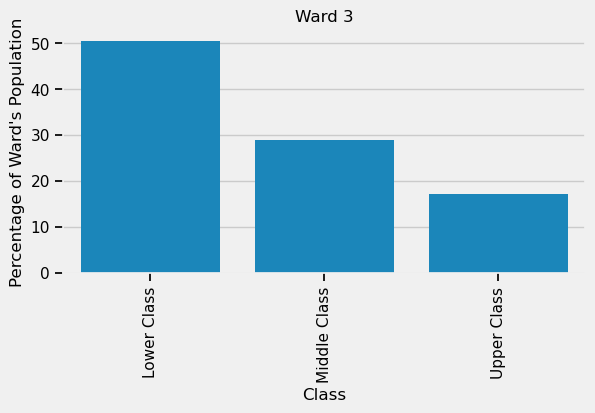

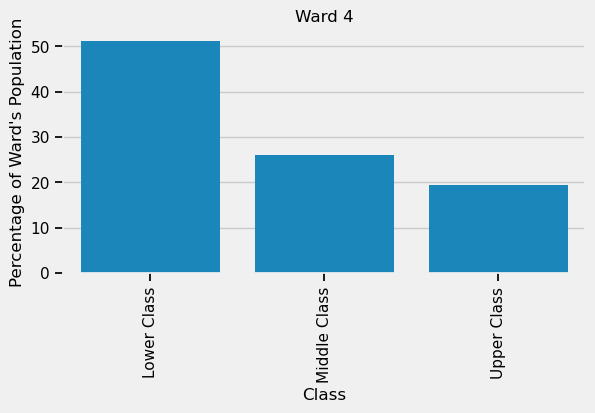

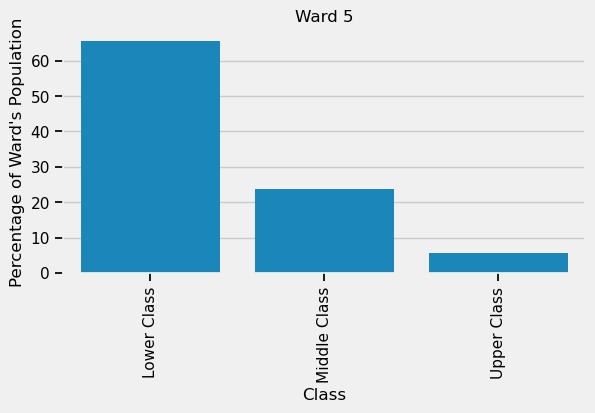

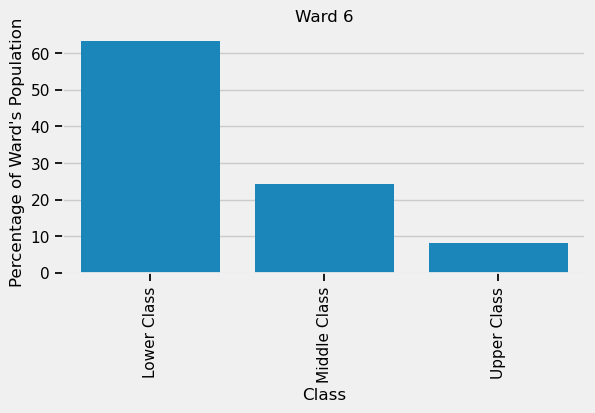

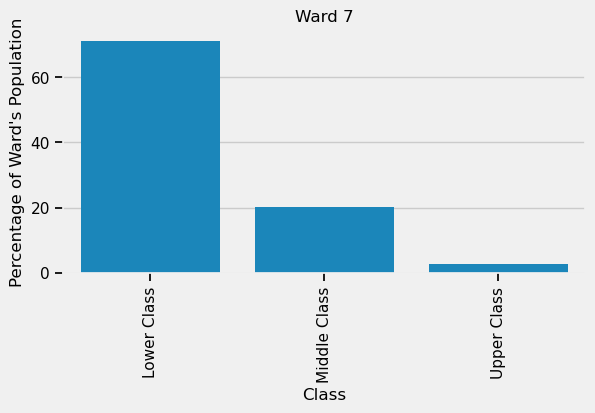

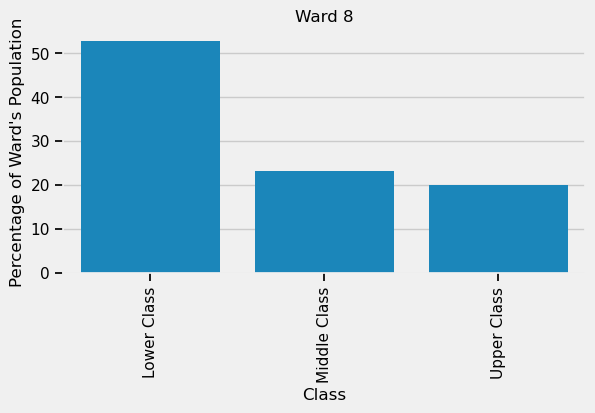

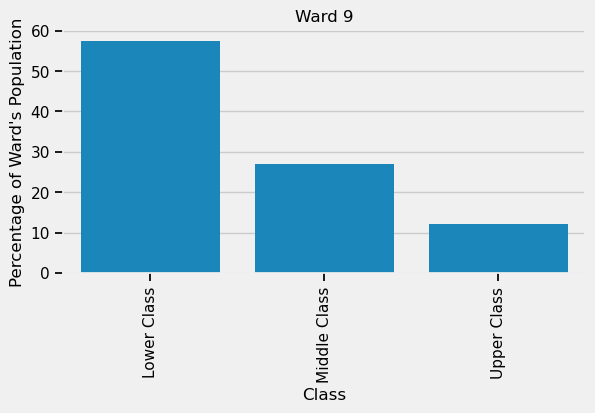

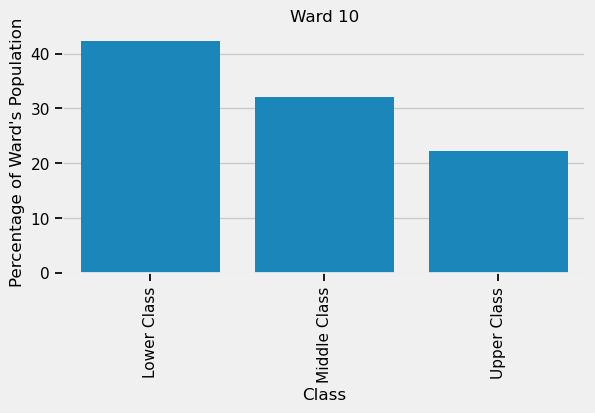

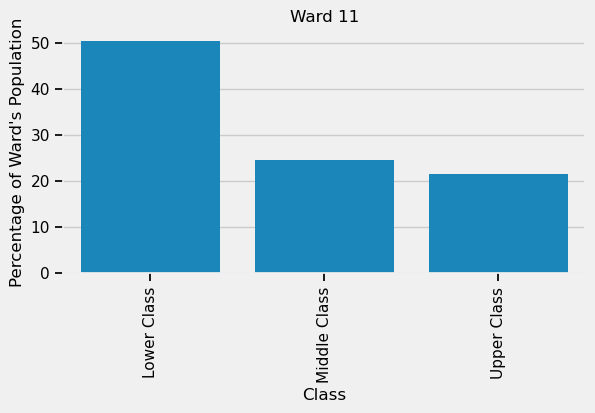

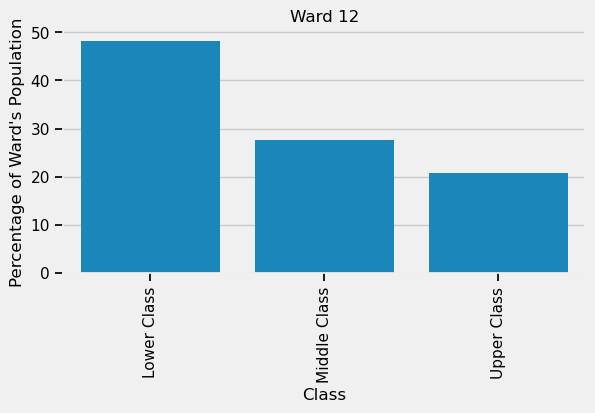

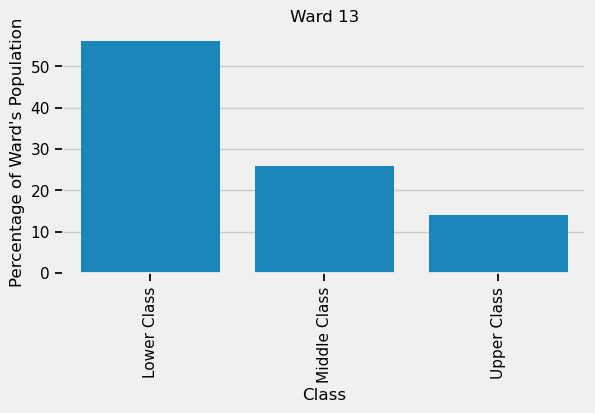

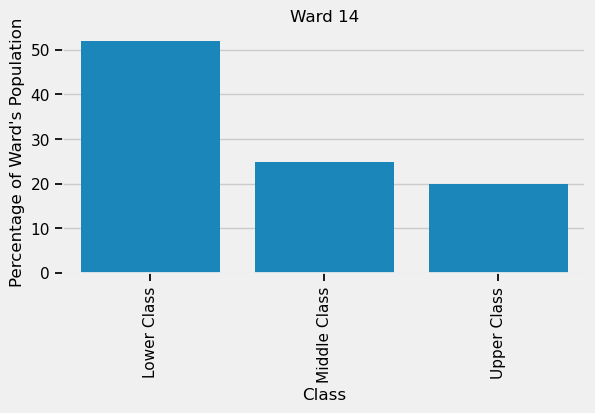

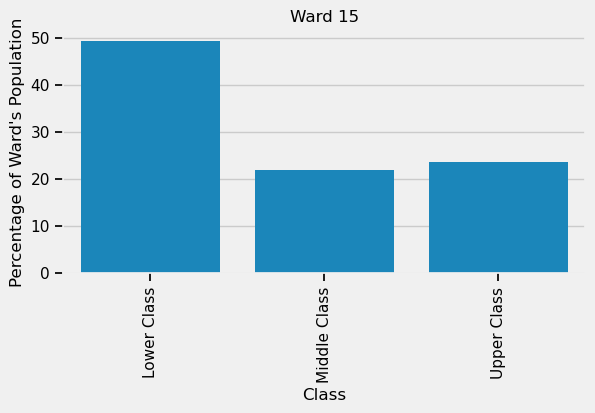

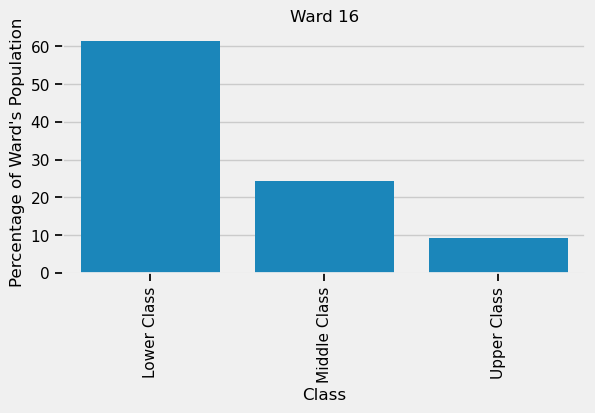

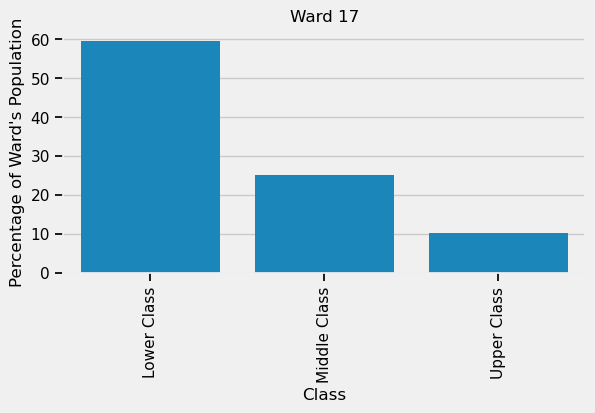

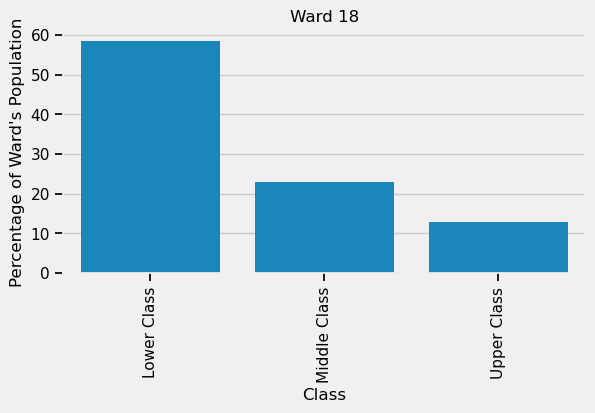

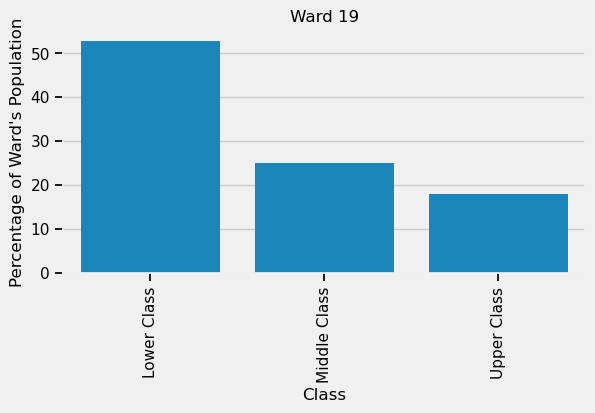

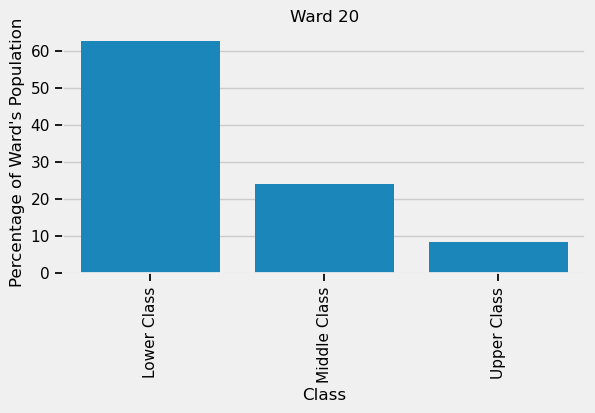

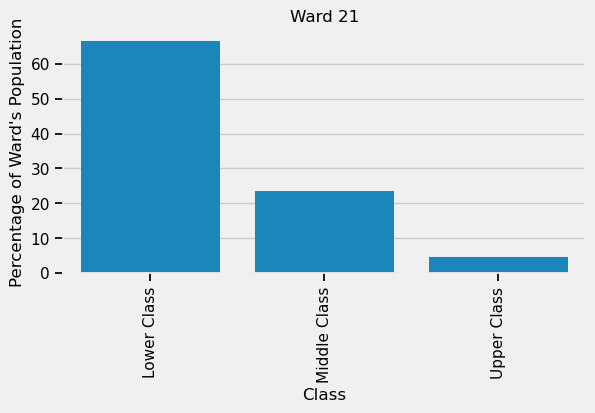

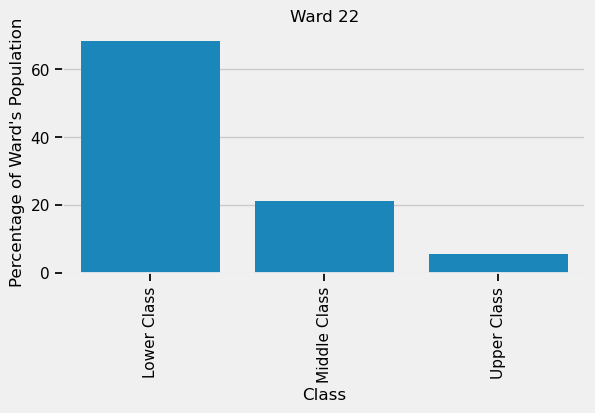

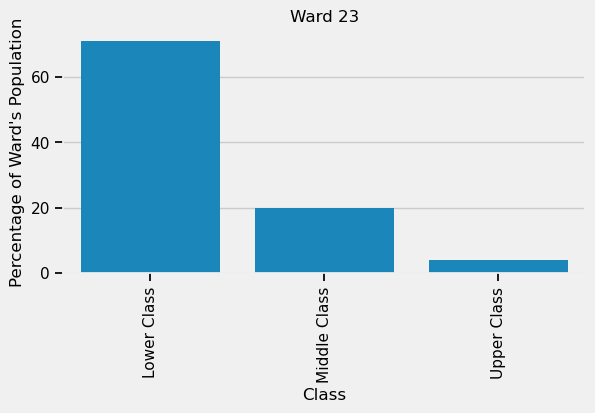

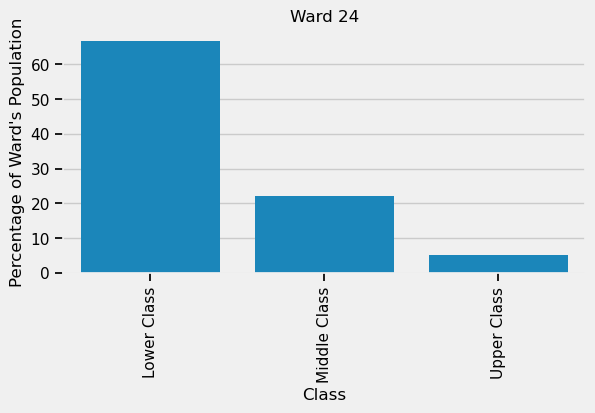

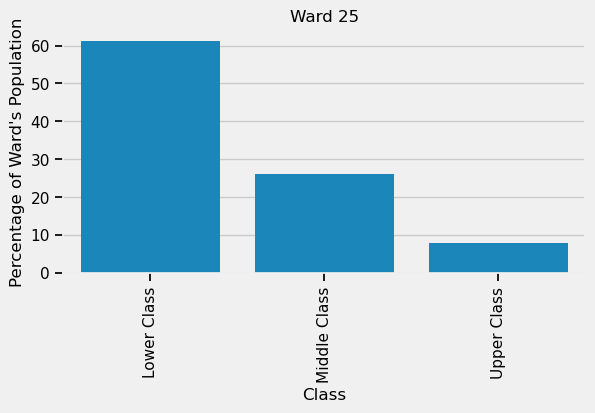

In [34]:
for ward in class_df.index:
    # Extract data from each row
    class_data = class_df.loc[ward]

    # Plot the age distribution
    plt.figure(figsize=(6, 3)) 
    sns.barplot(data = class_data)

    plt.title(ward)
    plt.xlabel('Class')
    plt.ylabel("Percentage of Ward's Population")
    plt.xticks(rotation=90)
    plt.show